# SARSA + Q-learning sur Mountain-car v0 

In [1]:
import numpy as np
import gym

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import matplotlib.pyplot as plt
from QLEARNING import qlearning
from  SARSA import  sarsa
import utils

# **Modélisation**
J'ai choisi pour ce TP d'utiliser l'environnement 'MountainCar-v0'. Un problème uni-dimensionnel, où la voiture est  placée entre deux "montagnes". L'objectif est d'arriver au sommet de la montagne de droite.

Pour y arriver, la seule façon de réussir est de faire des allers-retours pour prendre de l'élan, afin d'arriver à la cible.

Chaque état consiste à un tuple (position,vitesse)

In [4]:
env = gym.make('MountainCar-v0') 
env._max_episode_steps = 10000 #1000 episodes


Valeurs limites des états disponible:

In [5]:
print("vitesse maximale : " , env.observation_space.high[0])
print("position maximale : " , env.observation_space.high[1])
print("vitesse minimale : " , env.observation_space.low[0])
print("position minimale : " , env.observation_space.low[1])


vitesse maximale :  0.6
position maximale :  0.07
vitesse minimale :  -1.2
position minimale :  -0.07


#### Actions à mener : 

-Accelération à droite

-Ne rien faire

-Accélération à gauche

#### Rewards
Une récompense de 0 est reçue si l'agent atteint le drapeau qui est en position = 0.5 et -1 est récompensé si la position de l'agent est inférieure à 0.5

Le probleme doit passer en mode discrétisé :

In [6]:
# Discretisation
num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_states = np.round(num_states) + 1 # eviter les effets de bord
num_states = num_states.astype(int)
print(num_states)

[19 15]


In [26]:
print("nombre de positions",num_states[0],"vitesse\n","nombre de vitesses",num_states[1],"vitesses")

nombre de positions 19 vitesse
 nombre de vitesses 15 vitesses


In [7]:
# Mapping function to associate à continuous state to a specific noeud
def Mapping(state):
    state = (state - env.observation_space.low)*np.array([10, 100])
    state = np.round(state).astype(int)
    return state #retourne couple(i,j) sur la map discretisée

## Learning


J'ai utilisée les deux algorithmes cités dans le cours à savoir : 

-Qlearning + epsilon greedy algorithm 

-Sarsa +  epsilon greedy algorithm 

## Q-learning algorithm with epsilon greedy strategy:

In [8]:
episodes=30000
steps = 500

lr = 0.1  # alpha
gamma = 0.99 
epsilon = 0.3


In [9]:
actions = np.arange(0,env.action_space.n,1)


qlearn_algorithm = qlearning(num_states,actions = actions,alpha=lr,gamma = gamma,epsilon=epsilon)

In [10]:
# fonction de train : loop d'entrainement classique, chaque algo est décrit dans un fichier py

def train(algorithm,num_episodes,max_steps_per_episode):
    reward_history = []
    for i in range(num_episodes):
        state = env.reset()
        state = Mapping(state)
        reward_total = 0
        for j in range(max_steps_per_episode): 
            # choisir l'action par un algo (eps-greedy)
            action = algorithm.choose_action(state)
            # agir dans l'env
            state_temp, reward, finished, info = env.step(action)
            reward_total+=reward
            state2 = Mapping(state_temp)
            # update q 
            algorithm.learn(state,action,state2,reward)
            state = state2
            if finished: 
                reward_history.append(reward_total)
                if j < (max_steps_per_episode-1):
                    print("Episode {} finished  , position {}, velocity {} ".format(i,str(round(state_temp[0],3)),str(round(state_temp[1],3))))
                break
    return reward_history
  


In [16]:
#plot semi log des rewards cumulatives a travers les episodes
def plot_cum_rewards(cum_rewards,title):
    plt.semilogx(cum_rewards / np.arange(0, len(cum_rewards)), label= str(title)+' + $\epsilon$-greedy with fixed epsilon')
    plt.xlabel('Episodes')
    plt.ylabel('Cumulated Rewards per episode')
    plt.grid()
    plt.legend()

In [12]:
env = gym.make('MountainCar-v0') 
actions = np.arange(0,env.action_space.n,1)

qlearn_algorithm = qlearning(num_states,actions = actions,alpha=lr,gamma = gamma,epsilon=0.1)


In [13]:
rewards_qlearn = train(qlearn_algorithm,episodes,steps)
env.close()


Episode 0 finished  , position -0.482, velocity 0.012 
Episode 1 finished  , position -0.493, velocity 0.007 
Episode 2 finished  , position -0.714, velocity 0.013 
Episode 3 finished  , position -0.341, velocity 0.016 
Episode 4 finished  , position -0.386, velocity 0.004 
Episode 5 finished  , position -0.295, velocity -0.003 
Episode 6 finished  , position -0.367, velocity 0.006 
Episode 7 finished  , position -0.364, velocity 0.003 
Episode 8 finished  , position -0.512, velocity 0.024 
Episode 9 finished  , position -0.694, velocity 0.018 
Episode 10 finished  , position -0.401, velocity -0.021 
Episode 11 finished  , position -0.286, velocity 0.008 
Episode 12 finished  , position -0.611, velocity 0.022 
Episode 13 finished  , position -0.603, velocity 0.02 
Episode 14 finished  , position -0.62, velocity 0.008 
Episode 15 finished  , position -0.439, velocity 0.0 
Episode 16 finished  , position -0.54, velocity 0.013 
Episode 17 finished  , position -0.616, velocity -0.006 
Epis

Episode 146 finished  , position -0.533, velocity -0.001 
Episode 147 finished  , position -0.823, velocity -0.014 
Episode 148 finished  , position -0.007, velocity -0.008 
Episode 149 finished  , position -0.141, velocity 0.013 
Episode 150 finished  , position -0.135, velocity 0.013 
Episode 151 finished  , position -0.895, velocity -0.009 
Episode 152 finished  , position -1.154, velocity -0.004 
Episode 153 finished  , position -0.98, velocity -0.032 
Episode 154 finished  , position -1.123, velocity -0.005 
Episode 155 finished  , position -0.97, velocity -0.037 
Episode 156 finished  , position -0.021, velocity -0.022 
Episode 157 finished  , position -0.99, velocity 0.014 
Episode 158 finished  , position 0.008, velocity 0.029 
Episode 159 finished  , position -0.876, velocity -0.029 
Episode 160 finished  , position -0.99, velocity 0.033 
Episode 161 finished  , position -0.65, velocity 0.05 
Episode 162 finished  , position -0.121, velocity 0.042 
Episode 163 finished  , posi

Episode 297 finished  , position -0.906, velocity -0.013 
Episode 298 finished  , position -1.169, velocity -0.025 
Episode 299 finished  , position -0.537, velocity -0.027 
Episode 300 finished  , position 0.231, velocity 0.027 
Episode 301 finished  , position -0.867, velocity -0.045 
Episode 302 finished  , position -1.009, velocity 0.032 
Episode 303 finished  , position 0.292, velocity 0.009 
Episode 304 finished  , position -1.122, velocity 0.02 
Episode 305 finished  , position -0.836, velocity 0.019 
Episode 306 finished  , position -0.923, velocity 0.036 
Episode 307 finished  , position -0.772, velocity -0.053 
Episode 308 finished  , position -0.866, velocity 0.018 
Episode 309 finished  , position -0.752, velocity 0.044 
Episode 310 finished  , position -0.321, velocity -0.009 
Episode 311 finished  , position -1.181, velocity 0.008 
Episode 312 finished  , position -0.527, velocity -0.051 
Episode 313 finished  , position 0.353, velocity 0.012 
Episode 314 finished  , posi

Episode 454 finished  , position 0.518, velocity 0.021 
Episode 455 finished  , position -1.17, velocity -0.003 
Episode 456 finished  , position -0.342, velocity 0.049 
Episode 457 finished  , position -0.6, velocity 0.051 
Episode 458 finished  , position -0.905, velocity 0.034 
Episode 459 finished  , position -0.508, velocity 0.04 
Episode 460 finished  , position -1.084, velocity 0.026 
Episode 461 finished  , position -0.785, velocity 0.047 
Episode 462 finished  , position -0.384, velocity -0.02 
Episode 463 finished  , position -0.121, velocity -0.013 
Episode 464 finished  , position -0.894, velocity 0.032 
Episode 465 finished  , position 0.169, velocity -0.007 
Episode 466 finished  , position -0.238, velocity 0.044 
Episode 467 finished  , position -0.519, velocity -0.0 
Episode 468 finished  , position -0.564, velocity -0.002 
Episode 469 finished  , position -0.8, velocity 0.046 
Episode 470 finished  , position -0.186, velocity 0.042 
Episode 471 finished  , position -1.

Episode 597 finished  , position -0.465, velocity 0.053 
Episode 598 finished  , position -0.149, velocity 0.052 
Episode 599 finished  , position -0.401, velocity 0.056 
Episode 600 finished  , position -0.118, velocity -0.027 
Episode 601 finished  , position 0.519, velocity 0.021 
Episode 602 finished  , position 0.501, velocity 0.001 
Episode 603 finished  , position 0.518, velocity 0.022 
Episode 604 finished  , position -0.844, velocity 0.032 
Episode 605 finished  , position 0.51, velocity 0.018 
Episode 606 finished  , position -0.431, velocity 0.057 
Episode 607 finished  , position -0.82, velocity 0.045 
Episode 608 finished  , position -0.469, velocity 0.056 
Episode 609 finished  , position -0.136, velocity 0.049 
Episode 610 finished  , position -1.041, velocity 0.029 
Episode 611 finished  , position 0.526, velocity 0.029 
Episode 612 finished  , position 0.524, velocity 0.029 
Episode 613 finished  , position 0.1, velocity 0.041 
Episode 614 finished  , position 0.504, v

Episode 752 finished  , position -1.024, velocity 0.03 
Episode 753 finished  , position -1.198, velocity 0.002 
Episode 754 finished  , position 0.053, velocity -0.033 
Episode 755 finished  , position -0.92, velocity -0.052 
Episode 756 finished  , position -1.044, velocity 0.03 
Episode 757 finished  , position -1.178, velocity 0.009 
Episode 758 finished  , position -1.152, velocity 0.013 
Episode 759 finished  , position -0.938, velocity 0.036 
Episode 760 finished  , position -1.101, velocity -0.042 
Episode 761 finished  , position -1.081, velocity 0.025 
Episode 762 finished  , position -1.188, velocity 0.007 
Episode 763 finished  , position -0.921, velocity 0.035 
Episode 764 finished  , position -0.675, velocity 0.047 
Episode 765 finished  , position -1.035, velocity 0.031 
Episode 766 finished  , position -0.758, velocity 0.046 
Episode 767 finished  , position -1.182, velocity 0.009 
Episode 768 finished  , position -0.453, velocity 0.045 
Episode 769 finished  , position

Episode 913 finished  , position -0.377, velocity 0.054 
Episode 914 finished  , position -0.927, velocity 0.039 
Episode 915 finished  , position 0.501, velocity 0.006 
Episode 916 finished  , position -1.14, velocity 0.017 
Episode 917 finished  , position -0.988, velocity 0.035 
Episode 918 finished  , position 0.524, velocity 0.025 
Episode 919 finished  , position 0.506, velocity 0.025 
Episode 920 finished  , position -0.166, velocity 0.053 
Episode 921 finished  , position 0.519, velocity 0.032 
Episode 922 finished  , position 0.21, velocity 0.005 
Episode 923 finished  , position -1.142, velocity 0.015 
Episode 924 finished  , position 0.52, velocity 0.023 
Episode 925 finished  , position 0.5, velocity 0.021 
Episode 926 finished  , position -1.189, velocity 0.006 
Episode 927 finished  , position 0.463, velocity 0.027 
Episode 928 finished  , position 0.504, velocity 0.009 
Episode 929 finished  , position 0.5, velocity 0.015 
Episode 930 finished  , position 0.455, velocity

Episode 1061 finished  , position -0.77, velocity 0.05 
Episode 1062 finished  , position -0.447, velocity 0.05 
Episode 1063 finished  , position -0.507, velocity 0.054 
Episode 1064 finished  , position -1.04, velocity 0.03 
Episode 1065 finished  , position -0.085, velocity -0.026 
Episode 1066 finished  , position 0.505, velocity 0.019 
Episode 1067 finished  , position -1.021, velocity 0.027 
Episode 1068 finished  , position -0.943, velocity 0.033 
Episode 1069 finished  , position -0.71, velocity 0.049 
Episode 1070 finished  , position -0.25, velocity 0.046 
Episode 1071 finished  , position -0.497, velocity 0.03 
Episode 1072 finished  , position -0.224, velocity 0.046 
Episode 1073 finished  , position -0.852, velocity 0.043 
Episode 1074 finished  , position -0.558, velocity 0.005 
Episode 1075 finished  , position -1.132, velocity 0.003 
Episode 1076 finished  , position -0.926, velocity 0.037 
Episode 1077 finished  , position -0.826, velocity 0.043 
Episode 1078 finished 

Episode 1225 finished  , position -0.751, velocity 0.046 
Episode 1226 finished  , position -1.024, velocity 0.027 
Episode 1227 finished  , position -1.148, velocity 0.003 
Episode 1228 finished  , position -0.929, velocity 0.038 
Episode 1229 finished  , position 0.502, velocity 0.006 
Episode 1230 finished  , position -0.986, velocity -0.057 
Episode 1231 finished  , position -1.18, velocity 0.01 
Episode 1232 finished  , position -1.191, velocity 0.005 
Episode 1233 finished  , position -0.977, velocity 0.035 
Episode 1234 finished  , position -0.331, velocity 0.056 
Episode 1235 finished  , position -1.066, velocity 0.024 
Episode 1236 finished  , position -0.827, velocity -0.057 
Episode 1237 finished  , position -1.192, velocity 0.004 
Episode 1238 finished  , position 0.429, velocity -0.005 
Episode 1239 finished  , position 0.501, velocity 0.033 
Episode 1240 finished  , position -1.14, velocity -0.023 
Episode 1241 finished  , position 0.513, velocity 0.015 
Episode 1242 fini

Episode 1370 finished  , position 0.257, velocity 0.001 
Episode 1371 finished  , position 0.301, velocity 0.02 
Episode 1372 finished  , position -0.751, velocity -0.011 
Episode 1373 finished  , position 0.242, velocity -0.025 
Episode 1374 finished  , position 0.348, velocity -0.002 
Episode 1375 finished  , position -0.938, velocity -0.056 
Episode 1376 finished  , position 0.128, velocity 0.032 
Episode 1377 finished  , position -0.642, velocity -0.06 
Episode 1378 finished  , position -0.925, velocity -0.05 
Episode 1379 finished  , position 0.504, velocity 0.007 
Episode 1380 finished  , position -1.197, velocity 0.003 
Episode 1381 finished  , position -0.961, velocity -0.043 
Episode 1382 finished  , position 0.503, velocity 0.008 
Episode 1383 finished  , position -1.0, velocity 0.03 
Episode 1384 finished  , position -1.012, velocity 0.03 
Episode 1385 finished  , position -1.163, velocity 0.012 
Episode 1386 finished  , position -0.953, velocity -0.05 
Episode 1387 finished

Episode 1516 finished  , position 0.524, velocity 0.034 
Episode 1517 finished  , position -0.878, velocity 0.041 
Episode 1518 finished  , position -0.566, velocity 0.051 
Episode 1519 finished  , position -0.505, velocity 0.05 
Episode 1520 finished  , position -0.49, velocity 0.054 
Episode 1521 finished  , position -0.531, velocity 0.053 
Episode 1522 finished  , position -0.663, velocity 0.002 
Episode 1523 finished  , position -0.121, velocity -0.029 
Episode 1524 finished  , position -1.11, velocity 0.022 
Episode 1525 finished  , position -0.696, velocity 0.048 
Episode 1526 finished  , position -0.545, velocity 0.052 
Episode 1527 finished  , position -0.788, velocity 0.042 
Episode 1528 finished  , position -0.358, velocity 0.056 
Episode 1529 finished  , position -0.431, velocity 0.019 
Episode 1530 finished  , position -1.2, velocity 0.0 
Episode 1531 finished  , position -0.932, velocity 0.039 
Episode 1532 finished  , position -0.477, velocity -0.052 
Episode 1533 finishe

Episode 1674 finished  , position 0.51, velocity 0.01 
Episode 1675 finished  , position 0.501, velocity 0.013 
Episode 1676 finished  , position -0.844, velocity 0.036 
Episode 1677 finished  , position -0.327, velocity -0.056 
Episode 1678 finished  , position 0.51, velocity 0.013 
Episode 1679 finished  , position 0.5, velocity 0.02 
Episode 1680 finished  , position 0.513, velocity 0.02 
Episode 1681 finished  , position 0.516, velocity 0.024 
Episode 1682 finished  , position 0.511, velocity 0.013 
Episode 1683 finished  , position 0.401, velocity 0.022 
Episode 1684 finished  , position 0.501, velocity 0.01 
Episode 1685 finished  , position 0.504, velocity 0.016 
Episode 1686 finished  , position 0.513, velocity 0.021 
Episode 1687 finished  , position 0.513, velocity 0.022 
Episode 1688 finished  , position 0.514, velocity 0.02 
Episode 1689 finished  , position 0.513, velocity 0.016 
Episode 1690 finished  , position 0.523, velocity 0.025 
Episode 1691 finished  , position 0.5

Episode 1821 finished  , position 0.503, velocity 0.02 
Episode 1822 finished  , position -1.193, velocity 0.004 
Episode 1823 finished  , position -1.2, velocity 0.0 
Episode 1824 finished  , position -1.114, velocity 0.019 
Episode 1825 finished  , position 0.231, velocity -0.003 
Episode 1826 finished  , position -0.019, velocity 0.024 
Episode 1827 finished  , position -0.57, velocity -0.06 
Episode 1828 finished  , position -0.817, velocity -0.059 
Episode 1829 finished  , position 0.374, velocity 0.004 
Episode 1830 finished  , position 0.43, velocity 0.017 
Episode 1831 finished  , position -0.657, velocity 0.046 
Episode 1832 finished  , position -0.986, velocity 0.031 
Episode 1833 finished  , position -0.879, velocity 0.037 
Episode 1834 finished  , position -0.172, velocity -0.047 
Episode 1835 finished  , position -1.098, velocity 0.023 
Episode 1836 finished  , position -1.096, velocity 0.02 
Episode 1837 finished  , position 0.395, velocity 0.021 
Episode 1838 finished  ,

Episode 1985 finished  , position 0.512, velocity 0.035 
Episode 1986 finished  , position -0.829, velocity -0.038 
Episode 1987 finished  , position 0.511, velocity 0.029 
Episode 1988 finished  , position 0.501, velocity 0.035 
Episode 1989 finished  , position 0.518, velocity 0.031 
Episode 1990 finished  , position 0.504, velocity 0.03 
Episode 1991 finished  , position 0.503, velocity 0.011 
Episode 1992 finished  , position 0.524, velocity 0.027 
Episode 1993 finished  , position 0.508, velocity 0.033 
Episode 1994 finished  , position 0.506, velocity 0.008 
Episode 1995 finished  , position 0.515, velocity 0.025 
Episode 1996 finished  , position 0.424, velocity 0.009 
Episode 1997 finished  , position 0.51, velocity 0.028 
Episode 1998 finished  , position 0.509, velocity 0.02 
Episode 1999 finished  , position 0.506, velocity 0.03 
Episode 2000 finished  , position 0.513, velocity 0.027 
Episode 2001 finished  , position 0.497, velocity 0.034 
Episode 2002 finished  , position

Episode 2139 finished  , position -0.737, velocity 0.047 
Episode 2140 finished  , position -0.114, velocity -0.044 
Episode 2141 finished  , position -1.172, velocity 0.001 
Episode 2142 finished  , position 0.513, velocity 0.024 
Episode 2143 finished  , position -0.885, velocity -0.061 
Episode 2144 finished  , position 0.294, velocity -0.01 
Episode 2145 finished  , position -1.2, velocity 0.0 
Episode 2146 finished  , position -1.066, velocity 0.025 
Episode 2147 finished  , position -0.011, velocity -0.038 
Episode 2148 finished  , position 0.209, velocity -0.02 
Episode 2149 finished  , position -0.212, velocity -0.045 
Episode 2150 finished  , position -1.121, velocity 0.017 
Episode 2151 finished  , position -1.171, velocity -0.044 
Episode 2152 finished  , position -1.147, velocity 0.015 
Episode 2153 finished  , position -0.315, velocity -0.057 
Episode 2154 finished  , position -0.625, velocity 0.015 
Episode 2155 finished  , position -1.195, velocity 0.003 
Episode 2156 fi

Episode 2283 finished  , position 0.521, velocity 0.032 
Episode 2284 finished  , position -0.524, velocity 0.0 
Episode 2285 finished  , position -0.54, velocity -0.001 
Episode 2286 finished  , position -0.141, velocity 0.054 
Episode 2287 finished  , position -1.096, velocity 0.024 
Episode 2288 finished  , position 0.503, velocity 0.033 
Episode 2289 finished  , position 0.525, velocity 0.029 
Episode 2290 finished  , position 0.535, velocity 0.035 
Episode 2291 finished  , position -0.768, velocity 0.048 
Episode 2292 finished  , position 0.529, velocity 0.034 
Episode 2293 finished  , position 0.533, velocity 0.036 
Episode 2294 finished  , position -0.579, velocity -0.007 
Episode 2295 finished  , position 0.508, velocity 0.03 
Episode 2296 finished  , position 0.509, velocity 0.029 
Episode 2297 finished  , position -0.73, velocity -0.055 
Episode 2298 finished  , position 0.527, velocity 0.034 
Episode 2299 finished  , position 0.504, velocity 0.027 
Episode 2300 finished  , p

Episode 2446 finished  , position -0.767, velocity 0.049 
Episode 2447 finished  , position 0.514, velocity 0.042 
Episode 2448 finished  , position -0.559, velocity 0.055 
Episode 2449 finished  , position 0.503, velocity 0.034 
Episode 2450 finished  , position 0.502, velocity 0.034 
Episode 2451 finished  , position -1.031, velocity 0.031 
Episode 2452 finished  , position 0.462, velocity 0.038 
Episode 2453 finished  , position -0.836, velocity 0.044 
Episode 2454 finished  , position -0.672, velocity 0.05 
Episode 2455 finished  , position -0.145, velocity 0.054 
Episode 2456 finished  , position 0.526, velocity 0.041 
Episode 2457 finished  , position -0.121, velocity 0.05 
Episode 2458 finished  , position 0.516, velocity 0.029 
Episode 2459 finished  , position 0.391, velocity 0.031 
Episode 2460 finished  , position 0.521, velocity 0.041 
Episode 2461 finished  , position 0.502, velocity 0.034 
Episode 2462 finished  , position 0.513, velocity 0.038 
Episode 2463 finished  , p

Episode 2605 finished  , position 0.5, velocity 0.024 
Episode 2606 finished  , position -0.389, velocity -0.057 
Episode 2607 finished  , position 0.459, velocity 0.028 
Episode 2608 finished  , position -0.259, velocity -0.054 
Episode 2609 finished  , position 0.185, velocity 0.032 
Episode 2610 finished  , position -1.014, velocity 0.029 
Episode 2611 finished  , position -0.516, velocity -0.057 
Episode 2612 finished  , position -1.181, velocity 0.009 
Episode 2613 finished  , position -0.92, velocity -0.059 
Episode 2614 finished  , position -0.458, velocity -0.063 
Episode 2615 finished  , position -0.289, velocity -0.028 
Episode 2616 finished  , position 0.232, velocity 0.023 
Episode 2617 finished  , position -1.01, velocity 0.032 
Episode 2618 finished  , position 0.264, velocity -0.025 
Episode 2619 finished  , position -0.248, velocity -0.052 
Episode 2620 finished  , position -0.141, velocity -0.046 
Episode 2621 finished  , position 0.214, velocity -0.03 
Episode 2622 fi

Episode 2755 finished  , position -1.167, velocity 0.013 
Episode 2756 finished  , position -1.158, velocity -0.023 
Episode 2757 finished  , position -0.584, velocity 0.051 
Episode 2758 finished  , position -0.937, velocity -0.004 
Episode 2759 finished  , position -0.504, velocity -0.051 
Episode 2760 finished  , position -0.759, velocity 0.049 
Episode 2761 finished  , position -1.017, velocity 0.029 
Episode 2762 finished  , position -0.579, velocity 0.051 
Episode 2763 finished  , position -0.522, velocity 0.051 
Episode 2764 finished  , position -1.011, velocity 0.029 
Episode 2765 finished  , position -0.758, velocity 0.048 
Episode 2766 finished  , position -1.057, velocity 0.025 
Episode 2767 finished  , position -0.94, velocity 0.037 
Episode 2768 finished  , position -0.825, velocity 0.046 
Episode 2769 finished  , position -0.955, velocity -0.002 
Episode 2770 finished  , position 0.01, velocity -0.035 
Episode 2771 finished  , position -0.858, velocity 0.043 
Episode 2772

Episode 2911 finished  , position 0.253, velocity 0.022 
Episode 2912 finished  , position 0.418, velocity 0.035 
Episode 2913 finished  , position 0.515, velocity 0.022 
Episode 2914 finished  , position 0.29, velocity 0.037 
Episode 2915 finished  , position 0.504, velocity 0.015 
Episode 2916 finished  , position 0.524, velocity 0.028 
Episode 2917 finished  , position -1.055, velocity -0.05 
Episode 2918 finished  , position 0.39, velocity 0.029 
Episode 2919 finished  , position 0.42, velocity 0.017 
Episode 2920 finished  , position 0.328, velocity 0.021 
Episode 2921 finished  , position 0.502, velocity 0.011 
Episode 2922 finished  , position 0.516, velocity 0.037 
Episode 2923 finished  , position 0.525, velocity 0.03 
Episode 2924 finished  , position 0.5, velocity 0.019 
Episode 2925 finished  , position 0.511, velocity 0.032 
Episode 2926 finished  , position 0.507, velocity 0.034 
Episode 2927 finished  , position 0.5, velocity 0.033 
Episode 2928 finished  , position 0.52

Episode 3072 finished  , position 0.501, velocity 0.015 
Episode 3073 finished  , position -0.057, velocity -0.029 
Episode 3074 finished  , position 0.208, velocity -0.008 
Episode 3075 finished  , position -0.206, velocity 0.045 
Episode 3076 finished  , position 0.5, velocity 0.009 
Episode 3077 finished  , position -0.958, velocity 0.019 
Episode 3078 finished  , position -1.2, velocity 0.0 
Episode 3079 finished  , position -0.021, velocity -0.024 
Episode 3080 finished  , position 0.455, velocity 0.022 
Episode 3081 finished  , position 0.092, velocity -0.028 
Episode 3082 finished  , position 0.433, velocity 0.017 
Episode 3083 finished  , position -0.177, velocity -0.042 
Episode 3084 finished  , position -0.977, velocity 0.028 
Episode 3085 finished  , position -0.532, velocity 0.001 
Episode 3086 finished  , position 0.396, velocity 0.013 
Episode 3087 finished  , position 0.515, velocity 0.016 
Episode 3088 finished  , position -1.055, velocity -0.041 
Episode 3089 finished 

Episode 3216 finished  , position 0.522, velocity 0.035 
Episode 3217 finished  , position 0.528, velocity 0.038 
Episode 3218 finished  , position 0.507, velocity 0.023 
Episode 3219 finished  , position 0.521, velocity 0.027 
Episode 3220 finished  , position 0.53, velocity 0.033 
Episode 3221 finished  , position 0.518, velocity 0.036 
Episode 3222 finished  , position 0.526, velocity 0.031 
Episode 3223 finished  , position 0.503, velocity 0.021 
Episode 3224 finished  , position 0.508, velocity 0.017 
Episode 3225 finished  , position 0.505, velocity 0.032 
Episode 3226 finished  , position 0.515, velocity 0.028 
Episode 3227 finished  , position 0.522, velocity 0.028 
Episode 3228 finished  , position 0.524, velocity 0.028 
Episode 3229 finished  , position -0.159, velocity 0.05 
Episode 3230 finished  , position 0.532, velocity 0.032 
Episode 3231 finished  , position -1.17, velocity 0.011 
Episode 3232 finished  , position 0.502, velocity 0.026 
Episode 3233 finished  , positio

Episode 3369 finished  , position 0.525, velocity 0.026 
Episode 3370 finished  , position 0.514, velocity 0.039 
Episode 3371 finished  , position 0.527, velocity 0.037 
Episode 3372 finished  , position 0.529, velocity 0.038 
Episode 3373 finished  , position 0.506, velocity 0.025 
Episode 3374 finished  , position 0.528, velocity 0.042 
Episode 3375 finished  , position -0.329, velocity 0.058 
Episode 3376 finished  , position 0.511, velocity 0.024 
Episode 3377 finished  , position 0.509, velocity 0.039 
Episode 3378 finished  , position 0.525, velocity 0.039 
Episode 3379 finished  , position 0.503, velocity 0.031 
Episode 3380 finished  , position 0.53, velocity 0.042 
Episode 3381 finished  , position 0.533, velocity 0.035 
Episode 3382 finished  , position 0.508, velocity 0.028 
Episode 3383 finished  , position 0.533, velocity 0.036 
Episode 3384 finished  , position 0.516, velocity 0.025 
Episode 3385 finished  , position -0.001, velocity 0.051 
Episode 3386 finished  , posit

Episode 3527 finished  , position 0.503, velocity 0.025 
Episode 3528 finished  , position 0.512, velocity 0.034 
Episode 3529 finished  , position 0.537, velocity 0.041 
Episode 3530 finished  , position 0.516, velocity 0.04 
Episode 3531 finished  , position -0.444, velocity 0.037 
Episode 3532 finished  , position 0.541, velocity 0.042 
Episode 3533 finished  , position 0.531, velocity 0.035 
Episode 3534 finished  , position 0.521, velocity 0.04 
Episode 3535 finished  , position 0.507, velocity 0.024 
Episode 3536 finished  , position 0.38, velocity 0.04 
Episode 3537 finished  , position -0.047, velocity 0.046 
Episode 3538 finished  , position 0.52, velocity 0.034 
Episode 3539 finished  , position 0.448, velocity 0.033 
Episode 3540 finished  , position -0.889, velocity 0.041 
Episode 3541 finished  , position 0.503, velocity 0.038 
Episode 3542 finished  , position 0.512, velocity 0.017 
Episode 3543 finished  , position -0.74, velocity 0.048 
Episode 3544 finished  , position

Episode 3679 finished  , position 0.206, velocity 0.019 
Episode 3680 finished  , position 0.53, velocity 0.039 
Episode 3681 finished  , position -0.47, velocity -0.053 
Episode 3682 finished  , position -0.827, velocity 0.046 
Episode 3683 finished  , position -1.108, velocity 0.023 
Episode 3684 finished  , position -1.178, velocity -0.019 
Episode 3685 finished  , position -1.19, velocity 0.006 
Episode 3686 finished  , position 0.505, velocity 0.04 
Episode 3687 finished  , position -1.035, velocity 0.03 
Episode 3688 finished  , position 0.53, velocity 0.038 
Episode 3689 finished  , position 0.514, velocity 0.033 
Episode 3690 finished  , position -1.097, velocity 0.025 
Episode 3691 finished  , position 0.531, velocity 0.04 
Episode 3692 finished  , position -1.132, velocity -0.019 
Episode 3693 finished  , position 0.509, velocity 0.042 
Episode 3694 finished  , position 0.512, velocity 0.026 
Episode 3695 finished  , position -1.074, velocity -0.027 
Episode 3696 finished  , 

Episode 3836 finished  , position -0.907, velocity 0.041 
Episode 3837 finished  , position -0.272, velocity -0.022 
Episode 3838 finished  , position 0.067, velocity -0.006 
Episode 3839 finished  , position 0.512, velocity 0.036 
Episode 3840 finished  , position -1.059, velocity 0.028 
Episode 3841 finished  , position -0.91, velocity 0.019 
Episode 3842 finished  , position -0.527, velocity 0.002 
Episode 3843 finished  , position 0.027, velocity -0.03 
Episode 3844 finished  , position -0.528, velocity 0.002 
Episode 3845 finished  , position -0.109, velocity -0.036 
Episode 3846 finished  , position -0.124, velocity -0.035 
Episode 3847 finished  , position -0.504, velocity 0.001 
Episode 3848 finished  , position 0.097, velocity 0.01 
Episode 3849 finished  , position -0.323, velocity 0.057 
Episode 3850 finished  , position -1.085, velocity -0.039 
Episode 3851 finished  , position -0.176, velocity 0.039 
Episode 3852 finished  , position -0.009, velocity 0.047 
Episode 3853 fi

Episode 3986 finished  , position 0.523, velocity 0.03 
Episode 3987 finished  , position 0.508, velocity 0.024 
Episode 3988 finished  , position 0.515, velocity 0.026 
Episode 3989 finished  , position 0.516, velocity 0.03 
Episode 3990 finished  , position 0.523, velocity 0.034 
Episode 3991 finished  , position -0.323, velocity -0.04 
Episode 3992 finished  , position -0.505, velocity -0.056 
Episode 3993 finished  , position -0.219, velocity -0.052 
Episode 3994 finished  , position 0.511, velocity 0.033 
Episode 3995 finished  , position -0.866, velocity -0.049 
Episode 3996 finished  , position -0.375, velocity -0.055 
Episode 3997 finished  , position -0.621, velocity 0.052 
Episode 3998 finished  , position -0.232, velocity 0.055 
Episode 3999 finished  , position -0.679, velocity 0.05 
Episode 4000 finished  , position 0.51, velocity 0.026 
Episode 4001 finished  , position 0.502, velocity 0.024 
Episode 4002 finished  , position -0.997, velocity 0.033 
Episode 4003 finished 

Episode 4142 finished  , position 0.514, velocity 0.019 
Episode 4143 finished  , position -0.678, velocity -0.058 
Episode 4144 finished  , position 0.504, velocity 0.009 
Episode 4145 finished  , position 0.169, velocity -0.019 
Episode 4146 finished  , position -1.197, velocity 0.003 
Episode 4147 finished  , position 0.502, velocity 0.013 
Episode 4148 finished  , position -0.61, velocity 0.052 
Episode 4149 finished  , position -1.18, velocity 0.01 
Episode 4150 finished  , position -1.131, velocity 0.02 
Episode 4151 finished  , position 0.507, velocity 0.014 
Episode 4152 finished  , position -1.041, velocity 0.027 
Episode 4153 finished  , position -1.131, velocity 0.02 
Episode 4154 finished  , position 0.26, velocity 0.012 
Episode 4155 finished  , position -1.155, velocity -0.041 
Episode 4156 finished  , position 0.513, velocity 0.02 
Episode 4157 finished  , position -1.197, velocity 0.003 
Episode 4158 finished  , position -0.386, velocity -0.056 
Episode 4159 finished  ,

Episode 4293 finished  , position 0.504, velocity 0.01 
Episode 4294 finished  , position 0.505, velocity 0.008 
Episode 4295 finished  , position 0.5, velocity 0.006 
Episode 4296 finished  , position -0.553, velocity -0.059 
Episode 4297 finished  , position 0.5, velocity 0.005 
Episode 4298 finished  , position 0.502, velocity 0.004 
Episode 4299 finished  , position 0.505, velocity 0.01 
Episode 4300 finished  , position 0.501, velocity 0.002 
Episode 4301 finished  , position -1.052, velocity 0.029 
Episode 4302 finished  , position 0.504, velocity 0.005 
Episode 4303 finished  , position 0.507, velocity 0.015 
Episode 4304 finished  , position 0.282, velocity 0.031 
Episode 4305 finished  , position 0.504, velocity 0.007 
Episode 4306 finished  , position 0.502, velocity 0.007 
Episode 4307 finished  , position -0.728, velocity 0.048 
Episode 4308 finished  , position 0.502, velocity 0.003 
Episode 4309 finished  , position 0.505, velocity 0.007 
Episode 4310 finished  , position

Episode 4445 finished  , position 0.503, velocity 0.025 
Episode 4446 finished  , position 0.511, velocity 0.017 
Episode 4447 finished  , position 0.524, velocity 0.028 
Episode 4448 finished  , position 0.524, velocity 0.028 
Episode 4449 finished  , position 0.506, velocity 0.027 
Episode 4450 finished  , position 0.507, velocity 0.018 
Episode 4451 finished  , position 0.524, velocity 0.027 
Episode 4452 finished  , position 0.514, velocity 0.027 
Episode 4453 finished  , position 0.502, velocity 0.021 
Episode 4454 finished  , position 0.52, velocity 0.027 
Episode 4455 finished  , position 0.518, velocity 0.024 
Episode 4456 finished  , position 0.516, velocity 0.016 
Episode 4457 finished  , position 0.504, velocity 0.026 
Episode 4458 finished  , position 0.502, velocity 0.019 
Episode 4459 finished  , position 0.502, velocity 0.01 
Episode 4460 finished  , position 0.507, velocity 0.026 
Episode 4461 finished  , position 0.525, velocity 0.028 
Episode 4462 finished  , position

Episode 4607 finished  , position -1.1, velocity -0.021 
Episode 4608 finished  , position 0.508, velocity 0.029 
Episode 4609 finished  , position 0.511, velocity 0.026 
Episode 4610 finished  , position 0.513, velocity 0.019 
Episode 4611 finished  , position 0.524, velocity 0.026 
Episode 4612 finished  , position 0.519, velocity 0.025 
Episode 4613 finished  , position -0.549, velocity 0.0 
Episode 4614 finished  , position 0.503, velocity 0.029 
Episode 4615 finished  , position 0.52, velocity 0.03 
Episode 4616 finished  , position -1.197, velocity -0.027 
Episode 4617 finished  , position -1.197, velocity 0.003 
Episode 4618 finished  , position 0.505, velocity 0.012 
Episode 4619 finished  , position 0.516, velocity 0.029 
Episode 4620 finished  , position 0.51, velocity 0.015 
Episode 4621 finished  , position 0.523, velocity 0.023 
Episode 4622 finished  , position 0.505, velocity 0.014 
Episode 4623 finished  , position 0.505, velocity 0.015 
Episode 4624 finished  , positio

Episode 4752 finished  , position 0.501, velocity 0.007 
Episode 4753 finished  , position -0.318, velocity -0.059 
Episode 4754 finished  , position -0.525, velocity -0.063 
Episode 4755 finished  , position 0.502, velocity 0.01 
Episode 4756 finished  , position 0.507, velocity 0.013 
Episode 4757 finished  , position 0.446, velocity 0.009 
Episode 4758 finished  , position -0.703, velocity -0.058 
Episode 4759 finished  , position -0.564, velocity -0.0 
Episode 4760 finished  , position -0.081, velocity -0.05 
Episode 4761 finished  , position 0.503, velocity 0.003 
Episode 4762 finished  , position -0.245, velocity -0.059 
Episode 4763 finished  , position -0.539, velocity 0.052 
Episode 4764 finished  , position -0.812, velocity 0.045 
Episode 4765 finished  , position -1.039, velocity 0.026 
Episode 4766 finished  , position 0.312, velocity 0.026 
Episode 4767 finished  , position 0.306, velocity 0.019 
Episode 4768 finished  , position -1.064, velocity 0.026 
Episode 4769 finish

Episode 4906 finished  , position 0.503, velocity 0.041 
Episode 4907 finished  , position 0.52, velocity 0.042 
Episode 4908 finished  , position 0.522, velocity 0.039 
Episode 4909 finished  , position 0.533, velocity 0.039 
Episode 4910 finished  , position 0.518, velocity 0.041 
Episode 4911 finished  , position 0.526, velocity 0.039 
Episode 4912 finished  , position 0.513, velocity 0.042 
Episode 4913 finished  , position 0.523, velocity 0.04 
Episode 4914 finished  , position 0.53, velocity 0.042 
Episode 4915 finished  , position 0.532, velocity 0.042 
Episode 4916 finished  , position 0.535, velocity 0.04 
Episode 4917 finished  , position 0.511, velocity 0.038 
Episode 4918 finished  , position 0.536, velocity 0.039 
Episode 4919 finished  , position 0.504, velocity 0.035 
Episode 4920 finished  , position 0.506, velocity 0.038 
Episode 4921 finished  , position 0.503, velocity 0.042 
Episode 4922 finished  , position 0.524, velocity 0.04 
Episode 4923 finished  , position -1

Episode 5058 finished  , position -1.084, velocity 0.026 
Episode 5059 finished  , position -0.054, velocity -0.047 
Episode 5060 finished  , position -1.0, velocity 0.032 
Episode 5061 finished  , position -0.33, velocity -0.041 
Episode 5062 finished  , position 0.535, velocity 0.039 
Episode 5063 finished  , position -0.042, velocity 0.029 
Episode 5064 finished  , position -1.146, velocity 0.014 
Episode 5065 finished  , position 0.529, velocity 0.039 
Episode 5066 finished  , position -0.536, velocity 0.057 
Episode 5067 finished  , position 0.508, velocity 0.017 
Episode 5068 finished  , position 0.522, velocity 0.035 
Episode 5069 finished  , position 0.518, velocity 0.04 
Episode 5070 finished  , position 0.535, velocity 0.037 
Episode 5071 finished  , position -0.506, velocity 0.058 
Episode 5072 finished  , position 0.502, velocity 0.02 
Episode 5073 finished  , position 0.508, velocity 0.041 
Episode 5074 finished  , position 0.52, velocity 0.044 
Episode 5075 finished  , po

Episode 5223 finished  , position -0.502, velocity 0.053 
Episode 5224 finished  , position 0.511, velocity 0.018 
Episode 5225 finished  , position 0.507, velocity 0.028 
Episode 5226 finished  , position 0.518, velocity 0.026 
Episode 5227 finished  , position 0.508, velocity 0.023 
Episode 5228 finished  , position 0.176, velocity 0.023 
Episode 5229 finished  , position 0.525, velocity 0.026 
Episode 5230 finished  , position 0.344, velocity 0.019 
Episode 5231 finished  , position 0.501, velocity 0.002 
Episode 5232 finished  , position -0.511, velocity -0.066 
Episode 5233 finished  , position 0.506, velocity 0.028 
Episode 5234 finished  , position 0.507, velocity 0.024 
Episode 5235 finished  , position 0.506, velocity 0.018 
Episode 5236 finished  , position 0.501, velocity 0.007 
Episode 5237 finished  , position 0.507, velocity 0.019 
Episode 5238 finished  , position 0.368, velocity 0.021 
Episode 5239 finished  , position 0.506, velocity 0.018 
Episode 5240 finished  , pos

Episode 5384 finished  , position -0.353, velocity 0.028 
Episode 5385 finished  , position 0.516, velocity 0.028 
Episode 5386 finished  , position 0.519, velocity 0.034 
Episode 5387 finished  , position 0.523, velocity 0.034 
Episode 5388 finished  , position 0.507, velocity 0.022 
Episode 5389 finished  , position 0.506, velocity 0.04 
Episode 5390 finished  , position 0.507, velocity 0.024 
Episode 5391 finished  , position 0.504, velocity 0.031 
Episode 5392 finished  , position 0.514, velocity 0.015 
Episode 5393 finished  , position 0.507, velocity 0.04 
Episode 5394 finished  , position 0.518, velocity 0.019 
Episode 5395 finished  , position 0.513, velocity 0.031 
Episode 5396 finished  , position -0.541, velocity 0.003 
Episode 5397 finished  , position -0.51, velocity 0.0 
Episode 5398 finished  , position -1.133, velocity 0.018 
Episode 5399 finished  , position 0.511, velocity 0.029 
Episode 5400 finished  , position 0.504, velocity 0.008 
Episode 5401 finished  , positio

Episode 5547 finished  , position 0.506, velocity 0.03 
Episode 5548 finished  , position -0.504, velocity -0.065 
Episode 5549 finished  , position 0.302, velocity 0.035 
Episode 5550 finished  , position -0.525, velocity 0.0 
Episode 5551 finished  , position -0.509, velocity -0.001 
Episode 5552 finished  , position 0.504, velocity 0.006 
Episode 5553 finished  , position -0.523, velocity 0.001 
Episode 5554 finished  , position -0.528, velocity 0.002 
Episode 5555 finished  , position 0.522, velocity 0.026 
Episode 5556 finished  , position -0.554, velocity 0.001 
Episode 5557 finished  , position 0.504, velocity 0.006 
Episode 5558 finished  , position -0.164, velocity -0.049 
Episode 5559 finished  , position 0.531, velocity 0.038 
Episode 5560 finished  , position -0.881, velocity -0.062 
Episode 5561 finished  , position -0.355, velocity -0.06 
Episode 5562 finished  , position 0.501, velocity 0.015 
Episode 5563 finished  , position -0.388, velocity -0.063 
Episode 5564 finish

Episode 5699 finished  , position 0.5, velocity 0.034 
Episode 5700 finished  , position -0.503, velocity 0.057 
Episode 5701 finished  , position -1.197, velocity 0.003 
Episode 5702 finished  , position 0.531, velocity 0.037 
Episode 5703 finished  , position 0.5, velocity 0.017 
Episode 5704 finished  , position -0.355, velocity -0.06 
Episode 5705 finished  , position -0.341, velocity 0.055 
Episode 5706 finished  , position -1.151, velocity 0.016 
Episode 5707 finished  , position -0.904, velocity 0.039 
Episode 5708 finished  , position 0.517, velocity 0.027 
Episode 5709 finished  , position -0.847, velocity 0.04 
Episode 5710 finished  , position -0.874, velocity -0.053 
Episode 5711 finished  , position -1.167, velocity 0.013 
Episode 5712 finished  , position -1.151, velocity 0.016 
Episode 5713 finished  , position -0.725, velocity 0.034 
Episode 5714 finished  , position 0.502, velocity 0.006 
Episode 5715 finished  , position 0.024, velocity 0.032 
Episode 5716 finished  ,

Episode 5859 finished  , position 0.51, velocity 0.026 
Episode 5860 finished  , position -0.793, velocity -0.03 
Episode 5861 finished  , position 0.516, velocity 0.026 
Episode 5862 finished  , position -0.502, velocity 0.001 
Episode 5863 finished  , position -0.533, velocity -0.001 
Episode 5864 finished  , position -0.521, velocity 0.002 
Episode 5865 finished  , position 0.512, velocity 0.027 
Episode 5866 finished  , position 0.503, velocity 0.026 
Episode 5867 finished  , position 0.524, velocity 0.025 
Episode 5868 finished  , position 0.513, velocity 0.024 
Episode 5869 finished  , position 0.519, velocity 0.028 
Episode 5870 finished  , position 0.509, velocity 0.026 
Episode 5871 finished  , position 0.517, velocity 0.025 
Episode 5872 finished  , position 0.505, velocity 0.028 
Episode 5873 finished  , position 0.519, velocity 0.028 
Episode 5874 finished  , position 0.503, velocity 0.029 
Episode 5875 finished  , position 0.518, velocity 0.024 
Episode 5876 finished  , po

Episode 6022 finished  , position 0.511, velocity 0.023 
Episode 6023 finished  , position 0.51, velocity 0.025 
Episode 6024 finished  , position 0.502, velocity 0.026 
Episode 6025 finished  , position -0.512, velocity 0.002 
Episode 6026 finished  , position 0.519, velocity 0.025 
Episode 6027 finished  , position 0.519, velocity 0.02 
Episode 6028 finished  , position 0.514, velocity 0.016 
Episode 6029 finished  , position -1.131, velocity 0.017 
Episode 6030 finished  , position 0.526, velocity 0.029 
Episode 6031 finished  , position 0.523, velocity 0.025 
Episode 6032 finished  , position 0.512, velocity 0.024 
Episode 6033 finished  , position 0.517, velocity 0.025 
Episode 6034 finished  , position 0.516, velocity 0.021 
Episode 6035 finished  , position 0.513, velocity 0.025 
Episode 6036 finished  , position 0.517, velocity 0.021 
Episode 6037 finished  , position -0.536, velocity -0.0 
Episode 6038 finished  , position 0.509, velocity 0.024 
Episode 6039 finished  , positi

Episode 6184 finished  , position -1.157, velocity -0.011 
Episode 6185 finished  , position -0.37, velocity 0.055 
Episode 6186 finished  , position -1.198, velocity 0.002 
Episode 6187 finished  , position -0.961, velocity 0.037 
Episode 6188 finished  , position 0.503, velocity 0.033 
Episode 6189 finished  , position 0.085, velocity -0.009 
Episode 6190 finished  , position 0.505, velocity 0.036 
Episode 6191 finished  , position 0.527, velocity 0.034 
Episode 6192 finished  , position -1.156, velocity 0.015 
Episode 6193 finished  , position 0.505, velocity 0.04 
Episode 6194 finished  , position 0.516, velocity 0.036 
Episode 6195 finished  , position 0.514, velocity 0.035 
Episode 6196 finished  , position 0.529, velocity 0.036 
Episode 6197 finished  , position 0.511, velocity 0.031 
Episode 6198 finished  , position -0.761, velocity 0.004 
Episode 6199 finished  , position -1.171, velocity 0.012 
Episode 6200 finished  , position 0.512, velocity 0.034 
Episode 6201 finished  ,

Episode 6335 finished  , position 0.496, velocity 0.014 
Episode 6336 finished  , position 0.508, velocity 0.014 
Episode 6337 finished  , position -1.051, velocity 0.03 
Episode 6338 finished  , position 0.5, velocity 0.012 
Episode 6339 finished  , position -0.606, velocity 0.053 
Episode 6340 finished  , position 0.502, velocity 0.013 
Episode 6341 finished  , position -0.434, velocity 0.053 
Episode 6342 finished  , position 0.511, velocity 0.011 
Episode 6343 finished  , position -0.986, velocity 0.035 
Episode 6344 finished  , position -0.576, velocity 0.045 
Episode 6345 finished  , position -1.197, velocity 0.003 
Episode 6346 finished  , position 0.511, velocity 0.011 
Episode 6347 finished  , position 0.508, velocity 0.01 
Episode 6348 finished  , position -0.706, velocity 0.05 
Episode 6349 finished  , position -0.175, velocity -0.025 
Episode 6350 finished  , position 0.505, velocity 0.009 
Episode 6351 finished  , position 0.506, velocity 0.013 
Episode 6352 finished  , po

Episode 6493 finished  , position 0.526, velocity 0.036 
Episode 6494 finished  , position 0.51, velocity 0.034 
Episode 6495 finished  , position 0.521, velocity 0.033 
Episode 6496 finished  , position 0.53, velocity 0.035 
Episode 6497 finished  , position 0.523, velocity 0.033 
Episode 6498 finished  , position 0.519, velocity 0.035 
Episode 6499 finished  , position 0.53, velocity 0.036 
Episode 6500 finished  , position 0.504, velocity 0.034 
Episode 6501 finished  , position -0.923, velocity 0.037 
Episode 6502 finished  , position 0.519, velocity 0.032 
Episode 6503 finished  , position 0.52, velocity 0.035 
Episode 6504 finished  , position 0.52, velocity 0.031 
Episode 6505 finished  , position -0.041, velocity 0.02 
Episode 6506 finished  , position 0.512, velocity 0.031 
Episode 6507 finished  , position 0.033, velocity -0.004 
Episode 6508 finished  , position 0.388, velocity 0.032 
Episode 6509 finished  , position -1.183, velocity -0.012 
Episode 6510 finished  , positio

Episode 6645 finished  , position -1.094, velocity 0.014 
Episode 6646 finished  , position -0.157, velocity 0.034 
Episode 6647 finished  , position -0.871, velocity 0.036 
Episode 6648 finished  , position -0.181, velocity -0.044 
Episode 6649 finished  , position -1.189, velocity 0.006 
Episode 6650 finished  , position -0.488, velocity 0.049 
Episode 6651 finished  , position 0.321, velocity 0.016 
Episode 6652 finished  , position 0.152, velocity 0.022 
Episode 6653 finished  , position -1.037, velocity -0.02 
Episode 6654 finished  , position -0.975, velocity 0.033 
Episode 6655 finished  , position -0.204, velocity 0.028 
Episode 6656 finished  , position -1.161, velocity 0.013 
Episode 6657 finished  , position -0.625, velocity 0.045 
Episode 6658 finished  , position -0.965, velocity 0.033 
Episode 6659 finished  , position -0.556, velocity -0.057 
Episode 6660 finished  , position -1.16, velocity 0.013 
Episode 6661 finished  , position -0.986, velocity -0.015 
Episode 6662 f

Episode 6798 finished  , position -0.464, velocity -0.059 
Episode 6799 finished  , position -1.093, velocity -0.055 
Episode 6800 finished  , position 0.506, velocity 0.007 
Episode 6801 finished  , position 0.505, velocity 0.009 
Episode 6802 finished  , position 0.509, velocity 0.009 
Episode 6803 finished  , position 0.51, velocity 0.011 
Episode 6804 finished  , position 0.51, velocity 0.013 
Episode 6805 finished  , position 0.506, velocity 0.016 
Episode 6806 finished  , position 0.503, velocity 0.01 
Episode 6807 finished  , position 0.512, velocity 0.016 
Episode 6808 finished  , position 0.503, velocity 0.016 
Episode 6809 finished  , position -0.538, velocity -0.036 
Episode 6810 finished  , position 0.517, velocity 0.02 
Episode 6811 finished  , position 0.51, velocity 0.016 
Episode 6812 finished  , position 0.386, velocity 0.021 
Episode 6813 finished  , position -0.792, velocity -0.031 
Episode 6814 finished  , position -0.849, velocity -0.057 
Episode 6815 finished  , p

Episode 6958 finished  , position 0.514, velocity 0.017 
Episode 6959 finished  , position 0.518, velocity 0.03 
Episode 6960 finished  , position 0.53, velocity 0.038 
Episode 6961 finished  , position 0.524, velocity 0.024 
Episode 6962 finished  , position 0.51, velocity 0.028 
Episode 6963 finished  , position -0.316, velocity 0.056 
Episode 6964 finished  , position 0.518, velocity 0.023 
Episode 6965 finished  , position 0.525, velocity 0.037 
Episode 6966 finished  , position 0.506, velocity 0.024 
Episode 6967 finished  , position 0.514, velocity 0.029 
Episode 6968 finished  , position 0.511, velocity 0.035 
Episode 6969 finished  , position 0.514, velocity 0.035 
Episode 6970 finished  , position 0.523, velocity 0.024 
Episode 6971 finished  , position 0.511, velocity 0.031 
Episode 6972 finished  , position 0.512, velocity 0.035 
Episode 6973 finished  , position 0.515, velocity 0.026 
Episode 6974 finished  , position 0.524, velocity 0.039 
Episode 6975 finished  , position

Episode 7105 finished  , position 0.505, velocity 0.037 
Episode 7106 finished  , position -0.537, velocity 0.0 
Episode 7107 finished  , position -0.543, velocity 0.001 
Episode 7108 finished  , position -1.181, velocity 0.009 
Episode 7109 finished  , position 0.504, velocity 0.022 
Episode 7110 finished  , position -0.895, velocity -0.052 
Episode 7111 finished  , position 0.531, velocity 0.038 
Episode 7112 finished  , position 0.508, velocity 0.017 
Episode 7113 finished  , position 0.047, velocity 0.048 
Episode 7114 finished  , position 0.503, velocity 0.005 
Episode 7115 finished  , position 0.507, velocity 0.022 
Episode 7116 finished  , position 0.513, velocity 0.04 
Episode 7117 finished  , position 0.506, velocity 0.01 
Episode 7118 finished  , position 0.505, velocity 0.013 
Episode 7119 finished  , position -0.88, velocity 0.044 
Episode 7120 finished  , position -0.928, velocity -0.042 
Episode 7121 finished  , position 0.509, velocity 0.027 
Episode 7122 finished  , pos

Episode 7260 finished  , position 0.53, velocity 0.034 
Episode 7261 finished  , position 0.118, velocity 0.046 
Episode 7262 finished  , position 0.537, velocity 0.039 
Episode 7263 finished  , position 0.51, velocity 0.04 
Episode 7264 finished  , position 0.515, velocity 0.023 
Episode 7265 finished  , position 0.501, velocity 0.038 
Episode 7266 finished  , position -0.535, velocity -0.001 
Episode 7267 finished  , position 0.506, velocity 0.032 
Episode 7268 finished  , position 0.533, velocity 0.04 
Episode 7269 finished  , position -0.887, velocity -0.008 
Episode 7270 finished  , position 0.529, velocity 0.038 
Episode 7271 finished  , position -0.481, velocity 0.0 
Episode 7272 finished  , position -0.012, velocity 0.048 
Episode 7273 finished  , position 0.5, velocity 0.043 
Episode 7274 finished  , position 0.521, velocity 0.041 
Episode 7275 finished  , position 0.524, velocity 0.029 
Episode 7276 finished  , position 0.531, velocity 0.034 
Episode 7277 finished  , position

Episode 7411 finished  , position 0.504, velocity 0.037 
Episode 7412 finished  , position 0.445, velocity 0.037 
Episode 7413 finished  , position 0.508, velocity 0.038 
Episode 7414 finished  , position -0.514, velocity -0.001 
Episode 7415 finished  , position -0.253, velocity 0.028 
Episode 7416 finished  , position 0.516, velocity 0.034 
Episode 7417 finished  , position 0.51, velocity 0.04 
Episode 7418 finished  , position 0.528, velocity 0.037 
Episode 7419 finished  , position 0.534, velocity 0.035 
Episode 7420 finished  , position 0.532, velocity 0.036 
Episode 7421 finished  , position -0.556, velocity -0.002 
Episode 7422 finished  , position -1.144, velocity -0.031 
Episode 7423 finished  , position 0.522, velocity 0.033 
Episode 7424 finished  , position -0.515, velocity 0.002 
Episode 7425 finished  , position -0.513, velocity -0.001 
Episode 7426 finished  , position -0.158, velocity -0.026 
Episode 7427 finished  , position 0.532, velocity 0.034 
Episode 7428 finished

Episode 7556 finished  , position -0.107, velocity -0.047 
Episode 7557 finished  , position 0.391, velocity 0.024 
Episode 7558 finished  , position 0.392, velocity 0.024 
Episode 7559 finished  , position 0.5, velocity 0.019 
Episode 7560 finished  , position 0.256, velocity 0.025 
Episode 7561 finished  , position 0.412, velocity 0.017 
Episode 7562 finished  , position 0.314, velocity 0.025 
Episode 7563 finished  , position 0.39, velocity 0.021 
Episode 7564 finished  , position 0.517, velocity 0.021 
Episode 7565 finished  , position 0.148, velocity 0.028 
Episode 7566 finished  , position 0.501, velocity 0.011 
Episode 7567 finished  , position -0.475, velocity -0.061 
Episode 7568 finished  , position 0.502, velocity 0.01 
Episode 7569 finished  , position 0.192, velocity 0.022 
Episode 7570 finished  , position 0.231, velocity -0.012 
Episode 7571 finished  , position -1.154, velocity -0.042 
Episode 7572 finished  , position 0.502, velocity 0.008 
Episode 7573 finished  , pos

Episode 7704 finished  , position -0.184, velocity -0.031 
Episode 7705 finished  , position 0.512, velocity 0.018 
Episode 7706 finished  , position -0.532, velocity -0.004 
Episode 7707 finished  , position -0.541, velocity -0.002 
Episode 7708 finished  , position 0.511, velocity 0.026 
Episode 7709 finished  , position 0.189, velocity 0.033 
Episode 7710 finished  , position 0.518, velocity 0.022 
Episode 7711 finished  , position 0.523, velocity 0.023 
Episode 7712 finished  , position 0.52, velocity 0.029 
Episode 7713 finished  , position 0.506, velocity 0.016 
Episode 7714 finished  , position 0.507, velocity 0.017 
Episode 7715 finished  , position 0.503, velocity 0.02 
Episode 7716 finished  , position 0.52, velocity 0.026 
Episode 7717 finished  , position 0.502, velocity 0.018 
Episode 7718 finished  , position 0.51, velocity 0.021 
Episode 7719 finished  , position 0.504, velocity 0.013 
Episode 7720 finished  , position 0.513, velocity 0.023 
Episode 7721 finished  , posi

Episode 7866 finished  , position -0.487, velocity 0.053 
Episode 7867 finished  , position 0.304, velocity 0.032 
Episode 7868 finished  , position -1.038, velocity 0.03 
Episode 7869 finished  , position -1.061, velocity 0.028 
Episode 7870 finished  , position 0.211, velocity 0.007 
Episode 7871 finished  , position -1.157, velocity 0.014 
Episode 7872 finished  , position -0.637, velocity 0.053 
Episode 7873 finished  , position 0.504, velocity 0.007 
Episode 7874 finished  , position -0.244, velocity -0.052 
Episode 7875 finished  , position 0.501, velocity 0.02 
Episode 7876 finished  , position 0.155, velocity -0.015 
Episode 7877 finished  , position 0.519, velocity 0.026 
Episode 7878 finished  , position 0.509, velocity 0.019 
Episode 7879 finished  , position 0.511, velocity 0.027 
Episode 7880 finished  , position -1.138, velocity 0.017 
Episode 7881 finished  , position 0.402, velocity 0.025 
Episode 7882 finished  , position 0.515, velocity 0.024 
Episode 7883 finished  ,

Episode 8010 finished  , position 0.505, velocity 0.028 
Episode 8011 finished  , position -0.363, velocity 0.054 
Episode 8012 finished  , position -0.492, velocity 0.055 
Episode 8013 finished  , position -0.625, velocity 0.052 
Episode 8014 finished  , position -0.01, velocity 0.023 
Episode 8015 finished  , position -0.263, velocity 0.054 
Episode 8016 finished  , position -0.415, velocity 0.056 
Episode 8017 finished  , position 0.407, velocity 0.033 
Episode 8018 finished  , position 0.11, velocity -0.012 
Episode 8019 finished  , position -0.953, velocity 0.037 
Episode 8020 finished  , position -1.069, velocity 0.026 
Episode 8021 finished  , position 0.507, velocity 0.023 
Episode 8022 finished  , position 0.519, velocity 0.027 
Episode 8023 finished  , position -0.1, velocity -0.042 
Episode 8024 finished  , position -0.909, velocity 0.04 
Episode 8025 finished  , position -0.041, velocity -0.043 
Episode 8026 finished  , position -0.952, velocity -0.043 
Episode 8027 finishe

Episode 8156 finished  , position -0.463, velocity -0.057 
Episode 8157 finished  , position 0.506, velocity 0.013 
Episode 8158 finished  , position -0.842, velocity -0.052 
Episode 8159 finished  , position -1.171, velocity 0.011 
Episode 8160 finished  , position -1.132, velocity 0.019 
Episode 8161 finished  , position 0.526, velocity 0.027 
Episode 8162 finished  , position 0.514, velocity 0.02 
Episode 8163 finished  , position 0.519, velocity 0.023 
Episode 8164 finished  , position -0.512, velocity 0.0 
Episode 8165 finished  , position 0.501, velocity 0.019 
Episode 8166 finished  , position -0.51, velocity -0.001 
Episode 8167 finished  , position -0.525, velocity -0.002 
Episode 8168 finished  , position 0.515, velocity 0.029 
Episode 8169 finished  , position -0.879, velocity 0.042 
Episode 8170 finished  , position 0.377, velocity 0.029 
Episode 8171 finished  , position 0.525, velocity 0.028 
Episode 8172 finished  , position 0.089, velocity 0.037 
Episode 8173 finished  

Episode 8306 finished  , position 0.507, velocity 0.01 
Episode 8307 finished  , position 0.5, velocity 0.007 
Episode 8308 finished  , position 0.511, velocity 0.012 
Episode 8309 finished  , position 0.508, velocity 0.008 
Episode 8310 finished  , position -0.278, velocity -0.05 
Episode 8311 finished  , position -0.88, velocity 0.036 
Episode 8312 finished  , position 0.511, velocity 0.012 
Episode 8313 finished  , position -0.968, velocity 0.035 
Episode 8314 finished  , position -0.691, velocity 0.046 
Episode 8315 finished  , position -0.07, velocity 0.036 
Episode 8316 finished  , position 0.047, velocity 0.008 
Episode 8317 finished  , position -1.197, velocity 0.003 
Episode 8318 finished  , position 0.509, velocity 0.013 
Episode 8319 finished  , position -0.538, velocity 0.001 
Episode 8320 finished  , position -0.531, velocity 0.001 
Episode 8321 finished  , position 0.392, velocity 0.007 
Episode 8322 finished  , position -0.32, velocity 0.014 
Episode 8323 finished  , pos

Episode 8450 finished  , position 0.408, velocity 0.008 
Episode 8451 finished  , position -1.088, velocity 0.026 
Episode 8452 finished  , position -1.176, velocity -0.003 
Episode 8453 finished  , position 0.004, velocity 0.019 
Episode 8454 finished  , position -1.059, velocity 0.029 
Episode 8455 finished  , position -1.151, velocity 0.016 
Episode 8456 finished  , position -1.126, velocity 0.02 
Episode 8457 finished  , position 0.399, velocity 0.026 
Episode 8458 finished  , position 0.521, velocity 0.022 
Episode 8459 finished  , position -1.129, velocity 0.011 
Episode 8460 finished  , position 0.506, velocity 0.016 
Episode 8461 finished  , position 0.52, velocity 0.025 
Episode 8462 finished  , position 0.503, velocity 0.006 
Episode 8463 finished  , position 0.383, velocity -0.004 
Episode 8464 finished  , position -0.513, velocity -0.002 
Episode 8465 finished  , position -0.376, velocity 0.007 
Episode 8466 finished  , position 0.501, velocity 0.006 
Episode 8467 finished 

Episode 8604 finished  , position 0.533, velocity 0.037 
Episode 8605 finished  , position 0.523, velocity 0.037 
Episode 8606 finished  , position 0.508, velocity 0.031 
Episode 8607 finished  , position 0.507, velocity 0.038 
Episode 8608 finished  , position 0.523, velocity 0.036 
Episode 8609 finished  , position 0.511, velocity 0.038 
Episode 8610 finished  , position 0.508, velocity 0.035 
Episode 8611 finished  , position 0.528, velocity 0.037 
Episode 8612 finished  , position 0.504, velocity 0.037 
Episode 8613 finished  , position 0.504, velocity 0.037 
Episode 8614 finished  , position 0.525, velocity 0.038 
Episode 8615 finished  , position 0.524, velocity 0.039 
Episode 8616 finished  , position 0.504, velocity 0.023 
Episode 8617 finished  , position 0.528, velocity 0.037 
Episode 8618 finished  , position 0.511, velocity 0.035 
Episode 8619 finished  , position 0.514, velocity 0.027 
Episode 8620 finished  , position 0.509, velocity 0.029 
Episode 8621 finished  , positi

Episode 8757 finished  , position -0.3, velocity 0.057 
Episode 8758 finished  , position -0.394, velocity 0.058 
Episode 8759 finished  , position 0.188, velocity 0.008 
Episode 8760 finished  , position -1.127, velocity -0.055 
Episode 8761 finished  , position -1.163, velocity 0.012 
Episode 8762 finished  , position -1.2, velocity 0.0 
Episode 8763 finished  , position -0.916, velocity 0.04 
Episode 8764 finished  , position -0.989, velocity -0.002 
Episode 8765 finished  , position -1.093, velocity 0.025 
Episode 8766 finished  , position -1.033, velocity 0.029 
Episode 8767 finished  , position 0.189, velocity 0.014 
Episode 8768 finished  , position 0.066, velocity -0.009 
Episode 8769 finished  , position 0.516, velocity 0.031 
Episode 8770 finished  , position -0.437, velocity 0.052 
Episode 8771 finished  , position -0.981, velocity 0.035 
Episode 8772 finished  , position -0.49, velocity 0.05 
Episode 8773 finished  , position -0.788, velocity 0.047 
Episode 8774 finished  ,

Episode 8911 finished  , position -1.184, velocity 0.007 
Episode 8912 finished  , position 0.507, velocity 0.012 
Episode 8913 finished  , position 0.509, velocity 0.016 
Episode 8914 finished  , position 0.345, velocity 0.018 
Episode 8915 finished  , position -1.12, velocity 0.018 
Episode 8916 finished  , position 0.503, velocity 0.004 
Episode 8917 finished  , position -0.706, velocity 0.047 
Episode 8918 finished  , position 0.309, velocity 0.011 
Episode 8919 finished  , position 0.508, velocity 0.009 
Episode 8920 finished  , position 0.157, velocity 0.026 
Episode 8921 finished  , position 0.511, velocity 0.011 
Episode 8922 finished  , position 0.086, velocity 0.041 
Episode 8923 finished  , position 0.289, velocity 0.034 
Episode 8924 finished  , position 0.515, velocity 0.03 
Episode 8925 finished  , position 0.508, velocity 0.01 
Episode 8926 finished  , position 0.525, velocity 0.025 
Episode 8927 finished  , position 0.508, velocity 0.014 
Episode 8928 finished  , positi

Episode 9059 finished  , position 0.502, velocity 0.015 
Episode 9060 finished  , position 0.509, velocity 0.021 
Episode 9061 finished  , position 0.518, velocity 0.02 
Episode 9062 finished  , position -0.609, velocity 0.001 
Episode 9063 finished  , position 0.506, velocity 0.011 
Episode 9064 finished  , position 0.512, velocity 0.024 
Episode 9065 finished  , position -1.016, velocity -0.056 
Episode 9066 finished  , position 0.507, velocity 0.013 
Episode 9067 finished  , position -0.708, velocity 0.047 
Episode 9068 finished  , position 0.121, velocity 0.04 
Episode 9069 finished  , position 0.352, velocity 0.03 
Episode 9070 finished  , position -0.996, velocity 0.033 
Episode 9071 finished  , position -0.964, velocity 0.037 
Episode 9072 finished  , position -0.774, velocity 0.045 
Episode 9073 finished  , position -1.096, velocity 0.024 
Episode 9074 finished  , position -0.848, velocity 0.043 
Episode 9075 finished  , position 0.442, velocity 0.028 
Episode 9076 finished  , 

Episode 9203 finished  , position 0.513, velocity 0.031 
Episode 9204 finished  , position -0.108, velocity 0.05 
Episode 9205 finished  , position 0.485, velocity 0.036 
Episode 9206 finished  , position 0.502, velocity 0.037 
Episode 9207 finished  , position 0.524, velocity 0.034 
Episode 9208 finished  , position -0.969, velocity -0.056 
Episode 9209 finished  , position 0.524, velocity 0.039 
Episode 9210 finished  , position 0.22, velocity 0.039 
Episode 9211 finished  , position -0.464, velocity 0.051 
Episode 9212 finished  , position 0.478, velocity 0.037 
Episode 9213 finished  , position 0.419, velocity 0.035 
Episode 9214 finished  , position 0.529, velocity 0.039 
Episode 9215 finished  , position -0.925, velocity 0.041 
Episode 9216 finished  , position 0.503, velocity 0.034 
Episode 9217 finished  , position 0.516, velocity 0.037 
Episode 9218 finished  , position 0.53, velocity 0.038 
Episode 9219 finished  , position 0.532, velocity 0.036 
Episode 9220 finished  , posi

Episode 9349 finished  , position 0.502, velocity 0.006 
Episode 9350 finished  , position 0.52, velocity 0.021 
Episode 9351 finished  , position -0.274, velocity -0.022 
Episode 9352 finished  , position 0.507, velocity 0.011 
Episode 9353 finished  , position 0.502, velocity 0.013 
Episode 9354 finished  , position 0.502, velocity 0.016 
Episode 9355 finished  , position 0.51, velocity 0.012 
Episode 9356 finished  , position 0.503, velocity 0.009 
Episode 9357 finished  , position 0.506, velocity 0.014 
Episode 9358 finished  , position 0.506, velocity 0.011 
Episode 9359 finished  , position 0.51, velocity 0.014 
Episode 9360 finished  , position 0.506, velocity 0.008 
Episode 9361 finished  , position -0.469, velocity 0.052 
Episode 9362 finished  , position -1.056, velocity 0.028 
Episode 9363 finished  , position 0.501, velocity 0.009 
Episode 9364 finished  , position 0.004, velocity 0.044 
Episode 9365 finished  , position -0.322, velocity -0.018 
Episode 9366 finished  , pos

Episode 9493 finished  , position 0.518, velocity 0.03 
Episode 9494 finished  , position 0.51, velocity 0.029 
Episode 9495 finished  , position -1.123, velocity 0.018 
Episode 9496 finished  , position 0.52, velocity 0.03 
Episode 9497 finished  , position -0.326, velocity 0.056 
Episode 9498 finished  , position 0.01, velocity 0.044 
Episode 9499 finished  , position -0.822, velocity 0.047 
Episode 9500 finished  , position 0.505, velocity 0.008 
Episode 9501 finished  , position 0.083, velocity 0.035 
Episode 9502 finished  , position -1.133, velocity 0.018 
Episode 9503 finished  , position -0.483, velocity 0.051 
Episode 9504 finished  , position -0.583, velocity 0.055 
Episode 9505 finished  , position 0.504, velocity 0.015 
Episode 9506 finished  , position -0.46, velocity 0.056 
Episode 9507 finished  , position -0.519, velocity 0.055 
Episode 9508 finished  , position -0.775, velocity 0.046 
Episode 9509 finished  , position -0.7, velocity 0.052 
Episode 9510 finished  , posi

Episode 9647 finished  , position 0.517, velocity 0.025 
Episode 9648 finished  , position 0.524, velocity 0.027 
Episode 9649 finished  , position 0.524, velocity 0.028 
Episode 9650 finished  , position 0.507, velocity 0.03 
Episode 9651 finished  , position 0.517, velocity 0.023 
Episode 9652 finished  , position 0.514, velocity 0.025 
Episode 9653 finished  , position 0.503, velocity 0.024 
Episode 9654 finished  , position 0.516, velocity 0.023 
Episode 9655 finished  , position 0.507, velocity 0.021 
Episode 9656 finished  , position 0.508, velocity 0.023 
Episode 9657 finished  , position -0.725, velocity -0.034 
Episode 9658 finished  , position -1.019, velocity -0.005 
Episode 9659 finished  , position 0.502, velocity 0.025 
Episode 9660 finished  , position 0.507, velocity 0.021 
Episode 9661 finished  , position 0.505, velocity 0.022 
Episode 9662 finished  , position 0.521, velocity 0.024 
Episode 9663 finished  , position 0.513, velocity 0.018 
Episode 9664 finished  , pos

Episode 9797 finished  , position -0.447, velocity 0.056 
Episode 9798 finished  , position -0.26, velocity 0.058 
Episode 9799 finished  , position 0.508, velocity 0.03 
Episode 9800 finished  , position -0.515, velocity 0.056 
Episode 9801 finished  , position 0.526, velocity 0.029 
Episode 9802 finished  , position -1.167, velocity 0.013 
Episode 9803 finished  , position 0.514, velocity 0.023 
Episode 9804 finished  , position -0.921, velocity -0.064 
Episode 9805 finished  , position -0.497, velocity 0.029 
Episode 9806 finished  , position 0.515, velocity 0.034 
Episode 9807 finished  , position 0.536, velocity 0.039 
Episode 9808 finished  , position 0.504, velocity 0.01 
Episode 9809 finished  , position 0.505, velocity 0.006 
Episode 9810 finished  , position 0.26, velocity 0.035 
Episode 9811 finished  , position 0.504, velocity 0.021 
Episode 9812 finished  , position 0.511, velocity 0.02 
Episode 9813 finished  , position 0.519, velocity 0.029 
Episode 9814 finished  , posi

Episode 9950 finished  , position 0.504, velocity 0.008 
Episode 9951 finished  , position 0.502, velocity 0.029 
Episode 9952 finished  , position 0.524, velocity 0.026 
Episode 9953 finished  , position 0.516, velocity 0.023 
Episode 9954 finished  , position -0.506, velocity 0.001 
Episode 9955 finished  , position -0.536, velocity 0.002 
Episode 9956 finished  , position 0.507, velocity 0.015 
Episode 9957 finished  , position -0.932, velocity 0.023 
Episode 9958 finished  , position 0.509, velocity 0.023 
Episode 9959 finished  , position 0.507, velocity 0.025 
Episode 9960 finished  , position -0.602, velocity -0.042 
Episode 9961 finished  , position 0.519, velocity 0.026 
Episode 9962 finished  , position 0.525, velocity 0.027 
Episode 9963 finished  , position 0.502, velocity 0.024 
Episode 9964 finished  , position 0.504, velocity 0.022 
Episode 9965 finished  , position 0.504, velocity 0.023 
Episode 9966 finished  , position 0.509, velocity 0.011 
Episode 9967 finished  , p

Episode 10098 finished  , position 0.516, velocity 0.038 
Episode 10099 finished  , position 0.509, velocity 0.032 
Episode 10100 finished  , position 0.522, velocity 0.039 
Episode 10101 finished  , position -0.539, velocity 0.001 
Episode 10102 finished  , position 0.514, velocity 0.025 
Episode 10103 finished  , position 0.516, velocity 0.036 
Episode 10104 finished  , position 0.501, velocity 0.029 
Episode 10105 finished  , position 0.506, velocity 0.039 
Episode 10106 finished  , position 0.514, velocity 0.033 
Episode 10107 finished  , position 0.521, velocity 0.037 
Episode 10108 finished  , position 0.52, velocity 0.032 
Episode 10109 finished  , position 0.513, velocity 0.037 
Episode 10110 finished  , position 0.521, velocity 0.033 
Episode 10111 finished  , position 0.522, velocity 0.036 
Episode 10112 finished  , position -1.168, velocity 0.012 
Episode 10113 finished  , position 0.527, velocity 0.038 
Episode 10114 finished  , position 0.517, velocity 0.03 
Episode 10115 

Episode 10251 finished  , position 0.51, velocity 0.028 
Episode 10252 finished  , position -0.652, velocity 0.055 
Episode 10253 finished  , position -0.445, velocity 0.059 
Episode 10254 finished  , position 0.496, velocity 0.013 
Episode 10255 finished  , position 0.506, velocity 0.014 
Episode 10256 finished  , position -1.055, velocity 0.029 
Episode 10257 finished  , position 0.509, velocity 0.012 
Episode 10258 finished  , position 0.51, velocity 0.013 
Episode 10259 finished  , position -0.595, velocity 0.057 
Episode 10260 finished  , position 0.501, velocity 0.005 
Episode 10261 finished  , position -1.19, velocity 0.006 
Episode 10262 finished  , position 0.33, velocity -0.014 
Episode 10263 finished  , position -0.098, velocity 0.053 
Episode 10264 finished  , position -0.819, velocity 0.046 
Episode 10265 finished  , position 0.216, velocity 0.008 
Episode 10266 finished  , position 0.5, velocity 0.004 
Episode 10267 finished  , position 0.502, velocity 0.004 
Episode 1026

Episode 10391 finished  , position -0.672, velocity 0.055 
Episode 10392 finished  , position 0.531, velocity 0.036 
Episode 10393 finished  , position -0.525, velocity 0.056 
Episode 10394 finished  , position 0.518, velocity 0.035 
Episode 10395 finished  , position -0.094, velocity 0.049 
Episode 10396 finished  , position -0.546, velocity -0.0 
Episode 10397 finished  , position -0.526, velocity -0.001 
Episode 10398 finished  , position -0.865, velocity 0.045 
Episode 10399 finished  , position 0.147, velocity 0.047 
Episode 10400 finished  , position 0.534, velocity 0.04 
Episode 10401 finished  , position 0.534, velocity 0.039 
Episode 10402 finished  , position -0.047, velocity 0.029 
Episode 10403 finished  , position 0.52, velocity 0.041 
Episode 10404 finished  , position 0.524, velocity 0.038 
Episode 10405 finished  , position 0.531, velocity 0.038 
Episode 10406 finished  , position 0.514, velocity 0.036 
Episode 10407 finished  , position 0.529, velocity 0.038 
Episode 1

Episode 10550 finished  , position 0.504, velocity 0.007 
Episode 10551 finished  , position 0.506, velocity 0.008 
Episode 10552 finished  , position 0.507, velocity 0.017 
Episode 10553 finished  , position 0.514, velocity 0.028 
Episode 10554 finished  , position 0.501, velocity 0.012 
Episode 10555 finished  , position 0.502, velocity 0.018 
Episode 10556 finished  , position -0.969, velocity 0.033 
Episode 10557 finished  , position 0.524, velocity 0.028 
Episode 10558 finished  , position 0.505, velocity 0.02 
Episode 10559 finished  , position 0.501, velocity 0.012 
Episode 10560 finished  , position 0.512, velocity 0.016 
Episode 10561 finished  , position -0.745, velocity -0.034 
Episode 10562 finished  , position 0.503, velocity 0.016 
Episode 10563 finished  , position 0.503, velocity 0.011 
Episode 10564 finished  , position -1.051, velocity 0.029 
Episode 10565 finished  , position 0.501, velocity 0.018 
Episode 10566 finished  , position 0.515, velocity 0.017 
Episode 105

Episode 10693 finished  , position -0.538, velocity 0.0 
Episode 10694 finished  , position -0.521, velocity 0.001 
Episode 10695 finished  , position 0.515, velocity 0.036 
Episode 10696 finished  , position 0.505, velocity 0.027 
Episode 10697 finished  , position -0.522, velocity -0.001 
Episode 10698 finished  , position 0.525, velocity 0.034 
Episode 10699 finished  , position 0.518, velocity 0.038 
Episode 10700 finished  , position 0.535, velocity 0.036 
Episode 10701 finished  , position -0.22, velocity 0.05 
Episode 10702 finished  , position -1.171, velocity 0.012 
Episode 10703 finished  , position -1.036, velocity 0.028 
Episode 10704 finished  , position -1.019, velocity 0.029 
Episode 10705 finished  , position -0.761, velocity 0.051 
Episode 10706 finished  , position 0.512, velocity 0.038 
Episode 10707 finished  , position 0.517, velocity 0.042 
Episode 10708 finished  , position 0.535, velocity 0.036 
Episode 10709 finished  , position -0.666, velocity 0.053 
Episode 

Episode 10844 finished  , position 0.52, velocity 0.029 
Episode 10845 finished  , position 0.518, velocity 0.025 
Episode 10846 finished  , position 0.517, velocity 0.036 
Episode 10847 finished  , position 0.518, velocity 0.03 
Episode 10848 finished  , position 0.531, velocity 0.043 
Episode 10849 finished  , position 0.509, velocity 0.027 
Episode 10850 finished  , position -0.926, velocity 0.04 
Episode 10851 finished  , position 0.505, velocity 0.028 
Episode 10852 finished  , position 0.514, velocity 0.028 
Episode 10853 finished  , position 0.51, velocity 0.023 
Episode 10854 finished  , position 0.483, velocity 0.023 
Episode 10855 finished  , position 0.508, velocity 0.034 
Episode 10856 finished  , position 0.512, velocity 0.025 
Episode 10857 finished  , position 0.503, velocity 0.022 
Episode 10858 finished  , position 0.52, velocity 0.02 
Episode 10859 finished  , position 0.376, velocity 0.022 
Episode 10860 finished  , position -0.699, velocity 0.048 
Episode 10861 fini

Episode 11004 finished  , position 0.396, velocity 0.009 
Episode 11005 finished  , position -0.222, velocity -0.054 
Episode 11006 finished  , position -0.562, velocity -0.068 
Episode 11007 finished  , position -0.942, velocity -0.063 
Episode 11008 finished  , position 0.383, velocity 0.001 
Episode 11009 finished  , position 0.509, velocity 0.019 
Episode 11010 finished  , position 0.503, velocity 0.005 
Episode 11011 finished  , position 0.505, velocity 0.012 
Episode 11012 finished  , position -1.19, velocity 0.006 
Episode 11013 finished  , position -0.741, velocity -0.032 
Episode 11014 finished  , position 0.357, velocity -0.014 
Episode 11015 finished  , position 0.115, velocity 0.03 
Episode 11016 finished  , position 0.202, velocity 0.012 
Episode 11017 finished  , position -0.234, velocity 0.045 
Episode 11018 finished  , position 0.526, velocity 0.028 
Episode 11019 finished  , position 0.214, velocity -0.029 
Episode 11020 finished  , position -0.616, velocity -0.068 
Ep

Episode 11160 finished  , position -0.505, velocity 0.002 
Episode 11161 finished  , position 0.514, velocity 0.027 
Episode 11162 finished  , position -0.522, velocity 0.002 
Episode 11163 finished  , position -1.016, velocity 0.029 
Episode 11164 finished  , position 0.506, velocity 0.031 
Episode 11165 finished  , position -0.932, velocity 0.011 
Episode 11166 finished  , position 0.51, velocity 0.033 
Episode 11167 finished  , position 0.501, velocity 0.031 
Episode 11168 finished  , position 0.508, velocity 0.008 
Episode 11169 finished  , position 0.339, velocity 0.016 
Episode 11170 finished  , position -1.197, velocity 0.003 
Episode 11171 finished  , position -0.696, velocity 0.044 
Episode 11172 finished  , position -1.004, velocity -0.055 
Episode 11173 finished  , position 0.504, velocity 0.04 
Episode 11174 finished  , position 0.497, velocity 0.036 
Episode 11175 finished  , position -0.972, velocity 0.035 
Episode 11176 finished  , position 0.284, velocity 0.011 
Episode

Episode 11320 finished  , position 0.5, velocity 0.005 
Episode 11321 finished  , position -0.519, velocity -0.003 
Episode 11322 finished  , position 0.506, velocity 0.008 
Episode 11323 finished  , position -0.464, velocity 0.019 
Episode 11324 finished  , position 0.131, velocity -0.033 
Episode 11325 finished  , position 0.501, velocity 0.008 
Episode 11326 finished  , position 0.501, velocity 0.005 
Episode 11327 finished  , position 0.504, velocity 0.008 
Episode 11328 finished  , position 0.504, velocity 0.006 
Episode 11329 finished  , position 0.502, velocity 0.002 
Episode 11330 finished  , position 0.5, velocity 0.007 
Episode 11331 finished  , position -0.57, velocity -0.064 
Episode 11332 finished  , position 0.395, velocity -0.013 
Episode 11333 finished  , position 0.505, velocity 0.008 
Episode 11334 finished  , position 0.105, velocity 0.036 
Episode 11335 finished  , position 0.501, velocity 0.005 
Episode 11336 finished  , position 0.506, velocity 0.008 
Episode 1133

Episode 11468 finished  , position 0.513, velocity 0.016 
Episode 11469 finished  , position 0.512, velocity 0.013 
Episode 11470 finished  , position -0.532, velocity 0.053 
Episode 11471 finished  , position 0.508, velocity 0.014 
Episode 11472 finished  , position -0.897, velocity 0.036 
Episode 11473 finished  , position 0.504, velocity 0.012 
Episode 11474 finished  , position -0.727, velocity 0.045 
Episode 11475 finished  , position -0.604, velocity 0.049 
Episode 11476 finished  , position -1.192, velocity 0.005 
Episode 11477 finished  , position -0.94, velocity 0.034 
Episode 11478 finished  , position -1.112, velocity -0.045 
Episode 11479 finished  , position -0.544, velocity 0.048 
Episode 11480 finished  , position -0.866, velocity -0.014 
Episode 11481 finished  , position -0.347, velocity 0.048 
Episode 11482 finished  , position -1.153, velocity 0.014 
Episode 11483 finished  , position 0.51, velocity 0.012 
Episode 11484 finished  , position -1.051, velocity 0.025 
Ep

Episode 11618 finished  , position -1.152, velocity -0.034 
Episode 11619 finished  , position -1.009, velocity -0.044 
Episode 11620 finished  , position -1.114, velocity -0.029 
Episode 11621 finished  , position -0.554, velocity -0.057 
Episode 11622 finished  , position -1.008, velocity 0.032 
Episode 11623 finished  , position 0.281, velocity 0.004 
Episode 11624 finished  , position 0.146, velocity -0.012 
Episode 11625 finished  , position -1.185, velocity 0.008 
Episode 11626 finished  , position -0.091, velocity -0.037 
Episode 11627 finished  , position -1.137, velocity 0.019 
Episode 11628 finished  , position -0.149, velocity -0.043 
Episode 11629 finished  , position -1.145, velocity 0.017 
Episode 11630 finished  , position -0.133, velocity -0.042 
Episode 11631 finished  , position -1.193, velocity 0.004 
Episode 11632 finished  , position 0.511, velocity 0.019 
Episode 11633 finished  , position -0.815, velocity 0.035 
Episode 11634 finished  , position -1.2, velocity 0

Episode 11768 finished  , position 0.093, velocity 0.043 
Episode 11769 finished  , position 0.506, velocity 0.028 
Episode 11770 finished  , position 0.516, velocity 0.036 
Episode 11771 finished  , position 0.501, velocity 0.028 
Episode 11772 finished  , position -0.675, velocity 0.052 
Episode 11773 finished  , position 0.504, velocity 0.03 
Episode 11774 finished  , position 0.53, velocity 0.042 
Episode 11775 finished  , position 0.371, velocity -0.016 
Episode 11776 finished  , position 0.524, velocity 0.039 
Episode 11777 finished  , position 0.511, velocity 0.04 
Episode 11778 finished  , position 0.529, velocity 0.036 
Episode 11779 finished  , position 0.52, velocity 0.039 
Episode 11780 finished  , position -1.172, velocity 0.011 
Episode 11781 finished  , position 0.511, velocity 0.037 
Episode 11782 finished  , position -0.515, velocity -0.035 
Episode 11783 finished  , position 0.504, velocity 0.028 
Episode 11784 finished  , position 0.505, velocity 0.018 
Episode 11785

Episode 11920 finished  , position -0.746, velocity 0.048 
Episode 11921 finished  , position -0.518, velocity 0.001 
Episode 11922 finished  , position -1.182, velocity 0.009 
Episode 11923 finished  , position -1.17, velocity 0.009 
Episode 11924 finished  , position -0.856, velocity 0.035 
Episode 11925 finished  , position 0.188, velocity -0.022 
Episode 11926 finished  , position 0.367, velocity 0.039 
Episode 11927 finished  , position 0.333, velocity 0.009 
Episode 11928 finished  , position 0.487, velocity 0.009 
Episode 11929 finished  , position 0.505, velocity 0.014 
Episode 11930 finished  , position 0.348, velocity 0.035 
Episode 11931 finished  , position -1.2, velocity 0.0 
Episode 11932 finished  , position -0.534, velocity -0.037 
Episode 11933 finished  , position 0.502, velocity 0.01 
Episode 11934 finished  , position -1.2, velocity 0.0 
Episode 11935 finished  , position -0.297, velocity 0.055 
Episode 11936 finished  , position 0.517, velocity 0.032 
Episode 11937

Episode 12074 finished  , position 0.517, velocity 0.038 
Episode 12075 finished  , position 0.527, velocity 0.035 
Episode 12076 finished  , position 0.506, velocity 0.033 
Episode 12077 finished  , position 0.53, velocity 0.036 
Episode 12078 finished  , position 0.505, velocity 0.032 
Episode 12079 finished  , position 0.502, velocity 0.035 
Episode 12080 finished  , position 0.502, velocity 0.032 
Episode 12081 finished  , position 0.529, velocity 0.029 
Episode 12082 finished  , position 0.52, velocity 0.035 
Episode 12083 finished  , position 0.513, velocity 0.031 
Episode 12084 finished  , position 0.51, velocity 0.035 
Episode 12085 finished  , position 0.533, velocity 0.035 
Episode 12086 finished  , position 0.507, velocity 0.035 
Episode 12087 finished  , position 0.509, velocity 0.031 
Episode 12088 finished  , position 0.528, velocity 0.035 
Episode 12089 finished  , position 0.508, velocity 0.036 
Episode 12090 finished  , position 0.517, velocity 0.034 
Episode 12091 fin

Episode 12220 finished  , position 0.299, velocity -0.01 
Episode 12221 finished  , position -1.167, velocity 0.013 
Episode 12222 finished  , position 0.174, velocity 0.021 
Episode 12223 finished  , position -0.543, velocity 0.052 
Episode 12224 finished  , position -0.453, velocity -0.057 
Episode 12225 finished  , position -1.029, velocity 0.029 
Episode 12226 finished  , position -0.017, velocity 0.042 
Episode 12227 finished  , position -0.749, velocity 0.048 
Episode 12228 finished  , position 0.313, velocity 0.013 
Episode 12229 finished  , position -1.132, velocity 0.019 
Episode 12230 finished  , position -0.151, velocity 0.04 
Episode 12231 finished  , position 0.094, velocity 0.022 
Episode 12232 finished  , position 0.094, velocity 0.031 
Episode 12233 finished  , position 0.403, velocity 0.01 
Episode 12234 finished  , position -0.729, velocity -0.055 
Episode 12235 finished  , position 0.474, velocity 0.01 
Episode 12236 finished  , position 0.506, velocity 0.01 
Episode

Episode 12377 finished  , position -0.349, velocity 0.022 
Episode 12378 finished  , position -0.408, velocity 0.058 
Episode 12379 finished  , position -0.609, velocity -0.066 
Episode 12380 finished  , position 0.044, velocity -0.03 
Episode 12381 finished  , position -0.735, velocity -0.064 
Episode 12382 finished  , position -0.273, velocity -0.056 
Episode 12383 finished  , position -0.209, velocity -0.054 
Episode 12384 finished  , position 0.5, velocity 0.004 
Episode 12385 finished  , position -0.834, velocity 0.046 
Episode 12386 finished  , position 0.501, velocity 0.003 
Episode 12387 finished  , position 0.02, velocity -0.04 
Episode 12388 finished  , position -0.882, velocity 0.043 
Episode 12389 finished  , position 0.509, velocity 0.014 
Episode 12390 finished  , position 0.501, velocity 0.004 
Episode 12391 finished  , position -1.197, velocity -0.055 
Episode 12392 finished  , position -1.197, velocity 0.003 
Episode 12393 finished  , position -1.197, velocity 0.003 
E

Episode 12530 finished  , position -1.001, velocity -0.041 
Episode 12531 finished  , position -0.578, velocity 0.054 
Episode 12532 finished  , position 0.518, velocity 0.019 
Episode 12533 finished  , position -0.989, velocity 0.035 
Episode 12534 finished  , position -0.856, velocity 0.045 
Episode 12535 finished  , position 0.517, velocity 0.034 
Episode 12536 finished  , position -0.739, velocity 0.05 
Episode 12537 finished  , position 0.51, velocity 0.031 
Episode 12538 finished  , position 0.523, velocity 0.031 
Episode 12539 finished  , position 0.5, velocity 0.026 
Episode 12540 finished  , position -0.916, velocity 0.039 
Episode 12541 finished  , position 0.505, velocity 0.018 
Episode 12542 finished  , position 0.504, velocity 0.032 
Episode 12543 finished  , position 0.511, velocity 0.014 
Episode 12544 finished  , position -1.163, velocity -0.018 
Episode 12545 finished  , position -1.065, velocity 0.026 
Episode 12546 finished  , position -1.086, velocity 0.015 
Episode

Episode 12678 finished  , position 0.502, velocity 0.012 
Episode 12679 finished  , position 0.515, velocity 0.022 
Episode 12680 finished  , position -0.021, velocity 0.04 
Episode 12681 finished  , position 0.512, velocity 0.012 
Episode 12682 finished  , position -0.172, velocity 0.017 
Episode 12683 finished  , position 0.313, velocity 0.026 
Episode 12684 finished  , position 0.501, velocity 0.015 
Episode 12685 finished  , position 0.506, velocity 0.008 
Episode 12686 finished  , position -0.746, velocity -0.064 
Episode 12687 finished  , position 0.502, velocity 0.018 
Episode 12688 finished  , position 0.507, velocity 0.014 
Episode 12689 finished  , position 0.502, velocity 0.012 
Episode 12690 finished  , position 0.507, velocity 0.014 
Episode 12691 finished  , position 0.039, velocity 0.03 
Episode 12692 finished  , position -0.538, velocity 0.0 
Episode 12693 finished  , position 0.485, velocity 0.021 
Episode 12694 finished  , position 0.505, velocity 0.019 
Episode 12695

Episode 12837 finished  , position 0.51, velocity 0.013 
Episode 12838 finished  , position -0.774, velocity 0.026 
Episode 12839 finished  , position -0.305, velocity -0.058 
Episode 12840 finished  , position -0.608, velocity 0.047 
Episode 12841 finished  , position -1.159, velocity -0.009 
Episode 12842 finished  , position -0.556, velocity 0.004 
Episode 12843 finished  , position 0.507, velocity 0.008 
Episode 12844 finished  , position -0.356, velocity 0.05 
Episode 12845 finished  , position 0.503, velocity 0.016 
Episode 12846 finished  , position -0.542, velocity 0.05 
Episode 12847 finished  , position 0.501, velocity 0.009 
Episode 12848 finished  , position 0.506, velocity 0.021 
Episode 12849 finished  , position 0.501, velocity 0.017 
Episode 12850 finished  , position -0.539, velocity 0.052 
Episode 12851 finished  , position 0.513, velocity 0.016 
Episode 12852 finished  , position -1.051, velocity 0.028 
Episode 12853 finished  , position -0.433, velocity 0.053 
Episo

Episode 12988 finished  , position 0.504, velocity 0.021 
Episode 12989 finished  , position -0.969, velocity 0.024 
Episode 12990 finished  , position 0.503, velocity 0.02 
Episode 12991 finished  , position 0.514, velocity 0.029 
Episode 12992 finished  , position 0.5, velocity 0.023 
Episode 12993 finished  , position 0.504, velocity 0.023 
Episode 12994 finished  , position 0.504, velocity 0.028 
Episode 12995 finished  , position 0.516, velocity 0.021 
Episode 12996 finished  , position 0.515, velocity 0.032 
Episode 12997 finished  , position 0.518, velocity 0.026 
Episode 12998 finished  , position 0.508, velocity 0.031 
Episode 12999 finished  , position -0.099, velocity -0.03 
Episode 13000 finished  , position 0.331, velocity 0.031 
Episode 13001 finished  , position 0.51, velocity 0.026 
Episode 13002 finished  , position 0.502, velocity 0.029 
Episode 13003 finished  , position 0.511, velocity 0.029 
Episode 13004 finished  , position -0.691, velocity -0.046 
Episode 13005 

Episode 13142 finished  , position -0.13, velocity 0.051 
Episode 13143 finished  , position -0.494, velocity 0.055 
Episode 13144 finished  , position 0.516, velocity 0.033 
Episode 13145 finished  , position -1.151, velocity 0.016 
Episode 13146 finished  , position 0.526, velocity 0.031 
Episode 13147 finished  , position -0.272, velocity -0.047 
Episode 13148 finished  , position -0.741, velocity 0.049 
Episode 13149 finished  , position -0.376, velocity 0.054 
Episode 13150 finished  , position 0.515, velocity 0.032 
Episode 13151 finished  , position 0.527, velocity 0.032 
Episode 13152 finished  , position 0.502, velocity 0.028 
Episode 13153 finished  , position 0.507, velocity 0.031 
Episode 13154 finished  , position 0.504, velocity 0.028 
Episode 13155 finished  , position 0.523, velocity 0.033 
Episode 13156 finished  , position 0.523, velocity 0.028 
Episode 13157 finished  , position 0.526, velocity 0.032 
Episode 13158 finished  , position 0.51, velocity 0.031 
Episode 1

Episode 13291 finished  , position -0.473, velocity 0.054 
Episode 13292 finished  , position -0.463, velocity -0.05 
Episode 13293 finished  , position -0.144, velocity 0.052 
Episode 13294 finished  , position -0.308, velocity 0.052 
Episode 13295 finished  , position 0.379, velocity 0.037 
Episode 13296 finished  , position 0.275, velocity 0.037 
Episode 13297 finished  , position 0.502, velocity 0.037 
Episode 13298 finished  , position -0.561, velocity 0.053 
Episode 13299 finished  , position 0.525, velocity 0.038 
Episode 13300 finished  , position -0.467, velocity 0.055 
Episode 13301 finished  , position 0.524, velocity 0.037 
Episode 13302 finished  , position -0.408, velocity 0.055 
Episode 13303 finished  , position -0.456, velocity 0.057 
Episode 13304 finished  , position 0.046, velocity -0.01 
Episode 13305 finished  , position -0.579, velocity 0.054 
Episode 13306 finished  , position -0.953, velocity -0.011 
Episode 13307 finished  , position 0.517, velocity 0.029 
Epi

Episode 13436 finished  , position 0.509, velocity 0.016 
Episode 13437 finished  , position -0.572, velocity -0.002 
Episode 13438 finished  , position -0.543, velocity 0.001 
Episode 13439 finished  , position 0.516, velocity 0.029 
Episode 13440 finished  , position -0.511, velocity 0.0 
Episode 13441 finished  , position -0.524, velocity -0.001 
Episode 13442 finished  , position -0.529, velocity 0.002 
Episode 13443 finished  , position 0.503, velocity 0.031 
Episode 13444 finished  , position 0.532, velocity 0.034 
Episode 13445 finished  , position 0.526, velocity 0.033 
Episode 13446 finished  , position -0.551, velocity -0.005 
Episode 13447 finished  , position 0.531, velocity 0.035 
Episode 13448 finished  , position 0.524, velocity 0.036 
Episode 13449 finished  , position -1.113, velocity 0.021 
Episode 13450 finished  , position 0.508, velocity 0.028 
Episode 13451 finished  , position 0.512, velocity 0.029 
Episode 13452 finished  , position -0.915, velocity -0.055 
Epis

Episode 13589 finished  , position 0.503, velocity 0.021 
Episode 13590 finished  , position 0.504, velocity 0.023 
Episode 13591 finished  , position 0.515, velocity 0.031 
Episode 13592 finished  , position 0.504, velocity 0.036 
Episode 13593 finished  , position 0.532, velocity 0.033 
Episode 13594 finished  , position 0.516, velocity 0.029 
Episode 13595 finished  , position 0.51, velocity 0.019 
Episode 13596 finished  , position 0.518, velocity 0.041 
Episode 13597 finished  , position 0.506, velocity 0.031 
Episode 13598 finished  , position 0.12, velocity -0.022 
Episode 13599 finished  , position 0.501, velocity 0.03 
Episode 13600 finished  , position -0.734, velocity 0.041 
Episode 13601 finished  , position 0.5, velocity 0.028 
Episode 13602 finished  , position 0.521, velocity 0.023 
Episode 13603 finished  , position 0.517, velocity 0.025 
Episode 13604 finished  , position 0.505, velocity 0.029 
Episode 13605 finished  , position 0.517, velocity 0.024 
Episode 13606 fin

Episode 13742 finished  , position 0.501, velocity 0.004 
Episode 13743 finished  , position -0.738, velocity 0.047 
Episode 13744 finished  , position -1.19, velocity 0.006 
Episode 13745 finished  , position -1.18, velocity 0.01 
Episode 13746 finished  , position -1.167, velocity 0.013 
Episode 13747 finished  , position 0.058, velocity 0.044 
Episode 13748 finished  , position 0.251, velocity -0.024 
Episode 13749 finished  , position -1.182, velocity -0.04 
Episode 13750 finished  , position 0.501, velocity 0.027 
Episode 13751 finished  , position -0.284, velocity 0.042 
Episode 13752 finished  , position 0.509, velocity 0.037 
Episode 13753 finished  , position -0.745, velocity 0.047 
Episode 13754 finished  , position 0.337, velocity 0.02 
Episode 13755 finished  , position -1.071, velocity -0.052 
Episode 13756 finished  , position 0.514, velocity 0.021 
Episode 13757 finished  , position -1.024, velocity 0.032 
Episode 13758 finished  , position -1.052, velocity 0.029 
Episod

Episode 13893 finished  , position 0.501, velocity 0.033 
Episode 13894 finished  , position 0.522, velocity 0.027 
Episode 13895 finished  , position 0.504, velocity 0.03 
Episode 13896 finished  , position 0.504, velocity 0.028 
Episode 13897 finished  , position 0.519, velocity 0.023 
Episode 13898 finished  , position 0.522, velocity 0.03 
Episode 13899 finished  , position 0.523, velocity 0.033 
Episode 13900 finished  , position 0.514, velocity 0.031 
Episode 13901 finished  , position 0.518, velocity 0.03 
Episode 13902 finished  , position 0.523, velocity 0.028 
Episode 13903 finished  , position 0.501, velocity 0.026 
Episode 13904 finished  , position 0.504, velocity 0.029 
Episode 13905 finished  , position 0.512, velocity 0.027 
Episode 13906 finished  , position 0.518, velocity 0.026 
Episode 13907 finished  , position 0.515, velocity 0.026 
Episode 13908 finished  , position 0.505, velocity 0.027 
Episode 13909 finished  , position 0.528, velocity 0.028 
Episode 13910 fin

Episode 14047 finished  , position 0.394, velocity 0.017 
Episode 14048 finished  , position -0.462, velocity 0.002 
Episode 14049 finished  , position 0.512, velocity 0.017 
Episode 14050 finished  , position 0.51, velocity 0.029 
Episode 14051 finished  , position 0.518, velocity 0.021 
Episode 14052 finished  , position 0.514, velocity 0.028 
Episode 14053 finished  , position 0.51, velocity 0.02 
Episode 14054 finished  , position -0.22, velocity 0.053 
Episode 14055 finished  , position 0.502, velocity 0.029 
Episode 14056 finished  , position 0.326, velocity 0.002 
Episode 14057 finished  , position 0.524, velocity 0.025 
Episode 14058 finished  , position 0.517, velocity 0.033 
Episode 14059 finished  , position 0.523, velocity 0.03 
Episode 14060 finished  , position 0.517, velocity 0.02 
Episode 14061 finished  , position 0.5, velocity 0.024 
Episode 14062 finished  , position 0.523, velocity 0.023 
Episode 14063 finished  , position 0.506, velocity 0.017 
Episode 14064 finish

Episode 14200 finished  , position -0.956, velocity 0.017 
Episode 14201 finished  , position -0.966, velocity -0.058 
Episode 14202 finished  , position -1.008, velocity -0.054 
Episode 14203 finished  , position -0.605, velocity -0.063 
Episode 14204 finished  , position 0.045, velocity 0.027 
Episode 14205 finished  , position -1.031, velocity 0.013 
Episode 14206 finished  , position 0.346, velocity 0.012 
Episode 14207 finished  , position -0.584, velocity -0.006 
Episode 14208 finished  , position -0.553, velocity -0.001 
Episode 14209 finished  , position -0.027, velocity -0.04 
Episode 14210 finished  , position -0.959, velocity -0.06 
Episode 14211 finished  , position 0.015, velocity -0.041 
Episode 14212 finished  , position 0.236, velocity -0.026 
Episode 14213 finished  , position -0.483, velocity -0.061 
Episode 14214 finished  , position -0.326, velocity -0.057 
Episode 14215 finished  , position -1.18, velocity 0.01 
Episode 14216 finished  , position 0.07, velocity -0.

Episode 14364 finished  , position 0.52, velocity 0.037 
Episode 14365 finished  , position 0.524, velocity 0.038 
Episode 14366 finished  , position 0.529, velocity 0.037 
Episode 14367 finished  , position 0.529, velocity 0.032 
Episode 14368 finished  , position -0.576, velocity -0.003 
Episode 14369 finished  , position 0.52, velocity 0.041 
Episode 14370 finished  , position 0.536, velocity 0.041 
Episode 14371 finished  , position 0.504, velocity 0.034 
Episode 14372 finished  , position 0.501, velocity 0.028 
Episode 14373 finished  , position -0.035, velocity 0.005 
Episode 14374 finished  , position 0.531, velocity 0.038 
Episode 14375 finished  , position 0.515, velocity 0.032 
Episode 14376 finished  , position 0.507, velocity 0.027 
Episode 14377 finished  , position 0.502, velocity 0.032 
Episode 14378 finished  , position 0.513, velocity 0.033 
Episode 14379 finished  , position 0.306, velocity 0.029 
Episode 14380 finished  , position 0.514, velocity 0.036 
Episode 14381

Episode 14524 finished  , position 0.508, velocity 0.029 
Episode 14525 finished  , position 0.505, velocity 0.034 
Episode 14526 finished  , position 0.514, velocity 0.041 
Episode 14527 finished  , position 0.513, velocity 0.024 
Episode 14528 finished  , position 0.505, velocity 0.029 
Episode 14529 finished  , position 0.512, velocity 0.025 
Episode 14530 finished  , position 0.515, velocity 0.025 
Episode 14531 finished  , position -0.15, velocity 0.001 
Episode 14532 finished  , position 0.527, velocity 0.034 
Episode 14533 finished  , position 0.5, velocity 0.025 
Episode 14534 finished  , position 0.501, velocity 0.026 
Episode 14535 finished  , position 0.526, velocity 0.028 
Episode 14536 finished  , position 0.517, velocity 0.029 
Episode 14537 finished  , position 0.503, velocity 0.025 
Episode 14538 finished  , position 0.517, velocity 0.03 
Episode 14539 finished  , position 0.509, velocity 0.035 
Episode 14540 finished  , position 0.535, velocity 0.037 
Episode 14541 fin

Episode 14681 finished  , position -0.993, velocity -0.053 
Episode 14682 finished  , position -0.393, velocity -0.06 
Episode 14683 finished  , position 0.252, velocity 0.011 
Episode 14684 finished  , position -1.197, velocity 0.003 
Episode 14685 finished  , position -0.98, velocity 0.037 
Episode 14686 finished  , position -0.185, velocity -0.051 
Episode 14687 finished  , position -0.558, velocity -0.06 
Episode 14688 finished  , position -0.821, velocity 0.047 
Episode 14689 finished  , position 0.431, velocity 0.045 
Episode 14690 finished  , position -0.278, velocity -0.053 
Episode 14691 finished  , position -0.363, velocity -0.059 
Episode 14692 finished  , position 0.449, velocity -0.003 
Episode 14693 finished  , position 0.177, velocity -0.03 
Episode 14694 finished  , position -0.484, velocity 0.002 
Episode 14695 finished  , position -0.838, velocity -0.053 
Episode 14696 finished  , position -0.515, velocity -0.002 
Episode 14697 finished  , position -0.535, velocity -0

Episode 14828 finished  , position 0.509, velocity 0.037 
Episode 14829 finished  , position 0.515, velocity 0.037 
Episode 14830 finished  , position 0.502, velocity 0.044 
Episode 14831 finished  , position 0.531, velocity 0.037 
Episode 14832 finished  , position 0.088, velocity 0.049 
Episode 14833 finished  , position 0.509, velocity 0.035 
Episode 14834 finished  , position 0.523, velocity 0.038 
Episode 14835 finished  , position 0.53, velocity 0.034 
Episode 14836 finished  , position 0.526, velocity 0.039 
Episode 14837 finished  , position -0.907, velocity 0.043 
Episode 14838 finished  , position 0.52, velocity 0.038 
Episode 14839 finished  , position 0.519, velocity 0.038 
Episode 14840 finished  , position 0.52, velocity 0.035 
Episode 14841 finished  , position 0.528, velocity 0.04 
Episode 14842 finished  , position 0.535, velocity 0.035 
Episode 14843 finished  , position 0.529, velocity 0.035 
Episode 14844 finished  , position 0.504, velocity 0.042 
Episode 14845 fin

Episode 14987 finished  , position 0.514, velocity 0.02 
Episode 14988 finished  , position 0.517, velocity 0.023 
Episode 14989 finished  , position 0.51, velocity 0.025 
Episode 14990 finished  , position 0.514, velocity 0.017 
Episode 14991 finished  , position 0.512, velocity 0.017 
Episode 14992 finished  , position 0.508, velocity 0.016 
Episode 14993 finished  , position 0.503, velocity 0.025 
Episode 14994 finished  , position 0.506, velocity 0.024 
Episode 14995 finished  , position 0.511, velocity 0.028 
Episode 14996 finished  , position 0.508, velocity 0.02 
Episode 14997 finished  , position 0.512, velocity 0.024 
Episode 14998 finished  , position 0.069, velocity 0.046 
Episode 14999 finished  , position 0.502, velocity 0.02 
Episode 15000 finished  , position 0.504, velocity 0.018 
Episode 15001 finished  , position 0.502, velocity 0.029 
Episode 15002 finished  , position 0.526, velocity 0.027 
Episode 15003 finished  , position 0.505, velocity 0.018 
Episode 15004 fini

Episode 15141 finished  , position 0.508, velocity 0.015 
Episode 15142 finished  , position 0.502, velocity 0.005 
Episode 15143 finished  , position 0.504, velocity 0.008 
Episode 15144 finished  , position -0.877, velocity 0.041 
Episode 15145 finished  , position 0.505, velocity 0.022 
Episode 15146 finished  , position 0.511, velocity 0.026 
Episode 15147 finished  , position 0.514, velocity 0.028 
Episode 15148 finished  , position -0.52, velocity -0.044 
Episode 15149 finished  , position 0.504, velocity 0.038 
Episode 15150 finished  , position 0.533, velocity 0.037 
Episode 15151 finished  , position -0.551, velocity -0.0 
Episode 15152 finished  , position 0.503, velocity 0.025 
Episode 15153 finished  , position 0.501, velocity 0.024 
Episode 15154 finished  , position 0.505, velocity 0.03 
Episode 15155 finished  , position 0.524, velocity 0.035 
Episode 15156 finished  , position 0.526, velocity 0.029 
Episode 15157 finished  , position 0.523, velocity 0.039 
Episode 15158

Episode 15305 finished  , position -0.514, velocity 0.003 
Episode 15306 finished  , position -0.52, velocity 0.003 
Episode 15307 finished  , position 0.507, velocity 0.038 
Episode 15308 finished  , position -0.514, velocity -0.001 
Episode 15309 finished  , position -0.519, velocity 0.002 
Episode 15310 finished  , position -0.503, velocity 0.001 
Episode 15311 finished  , position -0.528, velocity -0.002 
Episode 15312 finished  , position 0.516, velocity 0.035 
Episode 15313 finished  , position 0.504, velocity 0.034 
Episode 15314 finished  , position 0.528, velocity 0.036 
Episode 15315 finished  , position 0.513, velocity 0.021 
Episode 15316 finished  , position -1.167, velocity -0.004 
Episode 15317 finished  , position 0.515, velocity 0.036 
Episode 15318 finished  , position 0.283, velocity 0.04 
Episode 15319 finished  , position 0.507, velocity 0.017 
Episode 15320 finished  , position 0.511, velocity 0.015 
Episode 15321 finished  , position 0.53, velocity 0.03 
Episode 

Episode 15448 finished  , position -1.18, velocity 0.01 
Episode 15449 finished  , position -0.359, velocity -0.054 
Episode 15450 finished  , position 0.527, velocity 0.028 
Episode 15451 finished  , position 0.518, velocity 0.027 
Episode 15452 finished  , position 0.518, velocity 0.027 
Episode 15453 finished  , position 0.53, velocity 0.032 
Episode 15454 finished  , position -0.536, velocity -0.001 
Episode 15455 finished  , position -0.514, velocity 0.001 
Episode 15456 finished  , position -0.526, velocity -0.001 
Episode 15457 finished  , position 0.067, velocity 0.016 
Episode 15458 finished  , position 0.519, velocity 0.032 
Episode 15459 finished  , position -0.754, velocity -0.053 
Episode 15460 finished  , position -0.421, velocity -0.06 
Episode 15461 finished  , position -1.025, velocity 0.031 
Episode 15462 finished  , position 0.504, velocity 0.008 
Episode 15463 finished  , position 0.521, velocity 0.023 
Episode 15464 finished  , position 0.528, velocity 0.029 
Episo

Episode 15596 finished  , position 0.508, velocity 0.011 
Episode 15597 finished  , position 0.416, velocity -0.001 
Episode 15598 finished  , position 0.503, velocity 0.008 
Episode 15599 finished  , position 0.503, velocity 0.02 
Episode 15600 finished  , position 0.39, velocity -0.007 
Episode 15601 finished  , position 0.506, velocity 0.008 
Episode 15602 finished  , position 0.508, velocity 0.015 
Episode 15603 finished  , position 0.506, velocity 0.007 
Episode 15604 finished  , position 0.306, velocity -0.019 
Episode 15605 finished  , position 0.507, velocity 0.013 
Episode 15606 finished  , position 0.505, velocity 0.013 
Episode 15607 finished  , position 0.503, velocity 0.022 
Episode 15608 finished  , position 0.5, velocity 0.016 
Episode 15609 finished  , position 0.506, velocity 0.013 
Episode 15610 finished  , position 0.505, velocity 0.006 
Episode 15611 finished  , position 0.503, velocity 0.007 
Episode 15612 finished  , position 0.506, velocity 0.01 
Episode 15613 fi

Episode 15746 finished  , position 0.505, velocity 0.02 
Episode 15747 finished  , position 0.503, velocity 0.014 
Episode 15748 finished  , position -1.079, velocity -0.038 
Episode 15749 finished  , position 0.511, velocity 0.019 
Episode 15750 finished  , position 0.503, velocity 0.023 
Episode 15751 finished  , position 0.522, velocity 0.023 
Episode 15752 finished  , position 0.508, velocity 0.01 
Episode 15753 finished  , position 0.51, velocity 0.018 
Episode 15754 finished  , position 0.519, velocity 0.02 
Episode 15755 finished  , position 0.505, velocity 0.014 
Episode 15756 finished  , position 0.501, velocity 0.003 
Episode 15757 finished  , position 0.502, velocity 0.005 
Episode 15758 finished  , position -1.057, velocity -0.002 
Episode 15759 finished  , position 0.507, velocity 0.02 
Episode 15760 finished  , position 0.519, velocity 0.03 
Episode 15761 finished  , position 0.464, velocity 0.024 
Episode 15762 finished  , position 0.508, velocity 0.019 
Episode 15763 fi

Episode 15905 finished  , position -1.033, velocity -0.048 
Episode 15906 finished  , position -1.2, velocity 0.0 
Episode 15907 finished  , position 0.51, velocity 0.028 
Episode 15908 finished  , position -0.316, velocity -0.049 
Episode 15909 finished  , position -0.244, velocity 0.052 
Episode 15910 finished  , position -1.194, velocity 0.004 
Episode 15911 finished  , position -1.11, velocity -0.047 
Episode 15912 finished  , position -0.052, velocity -0.027 
Episode 15913 finished  , position -1.178, velocity 0.009 
Episode 15914 finished  , position -1.076, velocity -0.052 
Episode 15915 finished  , position -0.523, velocity 0.051 
Episode 15916 finished  , position -0.636, velocity 0.051 
Episode 15917 finished  , position -0.427, velocity 0.052 
Episode 15918 finished  , position -0.892, velocity 0.039 
Episode 15919 finished  , position -0.63, velocity 0.049 
Episode 15920 finished  , position -0.849, velocity 0.038 
Episode 15921 finished  , position -1.2, velocity 0.0 
Epis

Episode 16056 finished  , position -0.375, velocity -0.049 
Episode 16057 finished  , position 0.532, velocity 0.033 
Episode 16058 finished  , position 0.52, velocity 0.033 
Episode 16059 finished  , position 0.195, velocity 0.045 
Episode 16060 finished  , position 0.533, velocity 0.037 
Episode 16061 finished  , position 0.522, velocity 0.037 
Episode 16062 finished  , position -0.477, velocity 0.032 
Episode 16063 finished  , position -0.347, velocity 0.057 
Episode 16064 finished  , position 0.402, velocity 0.034 
Episode 16065 finished  , position 0.528, velocity 0.034 
Episode 16066 finished  , position 0.53, velocity 0.036 
Episode 16067 finished  , position 0.51, velocity 0.036 
Episode 16068 finished  , position 0.533, velocity 0.034 
Episode 16069 finished  , position 0.532, velocity 0.033 
Episode 16070 finished  , position 0.53, velocity 0.036 
Episode 16071 finished  , position 0.531, velocity 0.035 
Episode 16072 finished  , position 0.022, velocity 0.038 
Episode 16073 

Episode 16198 finished  , position -1.19, velocity 0.006 
Episode 16199 finished  , position 0.245, velocity -0.0 
Episode 16200 finished  , position -1.017, velocity 0.003 
Episode 16201 finished  , position 0.445, velocity 0.029 
Episode 16202 finished  , position -1.116, velocity 0.021 
Episode 16203 finished  , position -1.184, velocity 0.009 
Episode 16204 finished  , position -0.178, velocity -0.049 
Episode 16205 finished  , position -1.197, velocity 0.003 
Episode 16206 finished  , position -1.18, velocity 0.01 
Episode 16207 finished  , position -1.003, velocity -0.045 
Episode 16208 finished  , position -0.48, velocity -0.022 
Episode 16209 finished  , position 0.351, velocity 0.016 
Episode 16210 finished  , position 0.506, velocity 0.018 
Episode 16211 finished  , position 0.502, velocity 0.004 
Episode 16212 finished  , position -1.029, velocity 0.029 
Episode 16213 finished  , position 0.089, velocity 0.034 
Episode 16214 finished  , position 0.395, velocity 0.036 
Episod

Episode 16361 finished  , position 0.51, velocity 0.015 
Episode 16362 finished  , position 0.513, velocity 0.025 
Episode 16363 finished  , position 0.501, velocity 0.029 
Episode 16364 finished  , position 0.511, velocity 0.027 
Episode 16365 finished  , position 0.508, velocity 0.036 
Episode 16366 finished  , position 0.519, velocity 0.029 
Episode 16367 finished  , position 0.316, velocity 0.032 
Episode 16368 finished  , position 0.173, velocity -0.026 
Episode 16369 finished  , position 0.525, velocity 0.027 
Episode 16370 finished  , position 0.147, velocity -0.033 
Episode 16371 finished  , position 0.521, velocity 0.032 
Episode 16372 finished  , position 0.501, velocity 0.03 
Episode 16373 finished  , position 0.51, velocity 0.03 
Episode 16374 finished  , position 0.522, velocity 0.029 
Episode 16375 finished  , position -0.313, velocity 0.052 
Episode 16376 finished  , position 0.529, velocity 0.03 
Episode 16377 finished  , position 0.231, velocity 0.037 
Episode 16378 fi

Episode 16519 finished  , position 0.523, velocity 0.034 
Episode 16520 finished  , position 0.503, velocity 0.035 
Episode 16521 finished  , position 0.517, velocity 0.035 
Episode 16522 finished  , position 0.519, velocity 0.036 
Episode 16523 finished  , position -0.445, velocity 0.057 
Episode 16524 finished  , position 0.533, velocity 0.034 
Episode 16525 finished  , position 0.509, velocity 0.039 
Episode 16526 finished  , position 0.527, velocity 0.035 
Episode 16527 finished  , position 0.533, velocity 0.036 
Episode 16528 finished  , position 0.506, velocity 0.037 
Episode 16529 finished  , position 0.502, velocity 0.036 
Episode 16530 finished  , position 0.295, velocity 0.039 
Episode 16531 finished  , position 0.534, velocity 0.036 
Episode 16532 finished  , position 0.5, velocity 0.036 
Episode 16533 finished  , position 0.524, velocity 0.038 
Episode 16534 finished  , position -1.197, velocity 0.003 
Episode 16535 finished  , position 0.533, velocity 0.039 
Episode 16536 

Episode 16660 finished  , position -1.129, velocity 0.008 
Episode 16661 finished  , position -0.805, velocity -0.004 
Episode 16662 finished  , position -0.297, velocity 0.051 
Episode 16663 finished  , position 0.531, velocity 0.031 
Episode 16664 finished  , position -0.577, velocity 0.047 
Episode 16665 finished  , position -0.619, velocity 0.052 
Episode 16666 finished  , position -0.536, velocity -0.002 
Episode 16667 finished  , position 0.089, velocity 0.004 
Episode 16668 finished  , position -0.083, velocity 0.048 
Episode 16669 finished  , position -0.61, velocity 0.053 
Episode 16670 finished  , position 0.52, velocity 0.03 
Episode 16671 finished  , position 0.519, velocity 0.032 
Episode 16672 finished  , position 0.522, velocity 0.027 
Episode 16673 finished  , position 0.507, velocity 0.03 
Episode 16674 finished  , position -0.472, velocity 0.054 
Episode 16675 finished  , position 0.522, velocity 0.028 
Episode 16676 finished  , position -1.022, velocity 0.01 
Episode

Episode 16807 finished  , position -1.107, velocity -0.046 
Episode 16808 finished  , position 0.396, velocity 0.038 
Episode 16809 finished  , position -0.161, velocity 0.052 
Episode 16810 finished  , position 0.513, velocity 0.037 
Episode 16811 finished  , position 0.519, velocity 0.036 
Episode 16812 finished  , position 0.53, velocity 0.033 
Episode 16813 finished  , position 0.526, velocity 0.029 
Episode 16814 finished  , position 0.512, velocity 0.019 
Episode 16815 finished  , position 0.506, velocity 0.03 
Episode 16816 finished  , position -0.637, velocity 0.056 
Episode 16817 finished  , position -0.999, velocity 0.032 
Episode 16818 finished  , position 0.511, velocity 0.019 
Episode 16819 finished  , position -1.197, velocity 0.003 
Episode 16820 finished  , position 0.506, velocity 0.022 
Episode 16821 finished  , position 0.512, velocity 0.02 
Episode 16822 finished  , position 0.534, velocity 0.038 
Episode 16823 finished  , position 0.52, velocity 0.021 
Episode 1682

Episode 16958 finished  , position -0.604, velocity 0.056 
Episode 16959 finished  , position 0.525, velocity 0.04 
Episode 16960 finished  , position 0.532, velocity 0.033 
Episode 16961 finished  , position 0.533, velocity 0.04 
Episode 16962 finished  , position -0.951, velocity -0.04 
Episode 16963 finished  , position -0.181, velocity 0.058 
Episode 16964 finished  , position 0.529, velocity 0.033 
Episode 16965 finished  , position 0.265, velocity 0.047 
Episode 16966 finished  , position -0.345, velocity 0.004 
Episode 16967 finished  , position -1.166, velocity 0.009 
Episode 16968 finished  , position -0.535, velocity 0.058 
Episode 16969 finished  , position -0.519, velocity 0.06 
Episode 16970 finished  , position -0.974, velocity 0.037 
Episode 16971 finished  , position 0.533, velocity 0.04 
Episode 16972 finished  , position -1.17, velocity 0.011 
Episode 16973 finished  , position -1.141, velocity 0.016 
Episode 16974 finished  , position -1.162, velocity 0.011 
Episode 

Episode 17109 finished  , position 0.266, velocity 0.04 
Episode 17110 finished  , position -0.534, velocity 0.02 
Episode 17111 finished  , position 0.522, velocity 0.038 
Episode 17112 finished  , position 0.534, velocity 0.043 
Episode 17113 finished  , position 0.542, velocity 0.046 
Episode 17114 finished  , position 0.53, velocity 0.043 
Episode 17115 finished  , position 0.402, velocity 0.006 
Episode 17116 finished  , position -0.142, velocity 0.008 
Episode 17117 finished  , position 0.54, velocity 0.041 
Episode 17118 finished  , position -0.657, velocity -0.036 
Episode 17119 finished  , position 0.538, velocity 0.039 
Episode 17120 finished  , position -1.075, velocity -0.048 
Episode 17121 finished  , position -0.218, velocity -0.038 
Episode 17122 finished  , position -0.055, velocity -0.029 
Episode 17123 finished  , position -1.073, velocity 0.026 
Episode 17124 finished  , position -1.099, velocity 0.023 
Episode 17125 finished  , position 0.501, velocity 0.009 
Episod

Episode 17254 finished  , position -0.822, velocity -0.058 
Episode 17255 finished  , position -1.181, velocity 0.009 
Episode 17256 finished  , position -0.754, velocity 0.051 
Episode 17257 finished  , position 0.517, velocity 0.017 
Episode 17258 finished  , position 0.508, velocity 0.009 
Episode 17259 finished  , position 0.504, velocity 0.007 
Episode 17260 finished  , position -0.814, velocity 0.047 
Episode 17261 finished  , position -0.795, velocity 0.05 
Episode 17262 finished  , position 0.505, velocity 0.011 
Episode 17263 finished  , position 0.522, velocity 0.048 
Episode 17264 finished  , position 0.025, velocity 0.055 
Episode 17265 finished  , position -0.803, velocity 0.046 
Episode 17266 finished  , position 0.506, velocity 0.035 
Episode 17267 finished  , position 0.534, velocity 0.037 
Episode 17268 finished  , position 0.147, velocity 0.046 
Episode 17269 finished  , position -0.282, velocity 0.061 
Episode 17270 finished  , position -0.849, velocity 0.046 
Episod

Episode 17417 finished  , position 0.536, velocity 0.047 
Episode 17418 finished  , position 0.528, velocity 0.028 
Episode 17419 finished  , position 0.521, velocity 0.03 
Episode 17420 finished  , position -1.18, velocity 0.01 
Episode 17421 finished  , position 0.513, velocity 0.03 
Episode 17422 finished  , position 0.234, velocity 0.029 
Episode 17423 finished  , position 0.53, velocity 0.03 
Episode 17424 finished  , position 0.502, velocity 0.033 
Episode 17425 finished  , position 0.504, velocity 0.022 
Episode 17426 finished  , position 0.275, velocity 0.014 
Episode 17427 finished  , position -0.707, velocity 0.05 
Episode 17428 finished  , position 0.185, velocity 0.035 
Episode 17429 finished  , position 0.513, velocity 0.04 
Episode 17430 finished  , position -0.253, velocity -0.007 
Episode 17431 finished  , position 0.501, velocity 0.033 
Episode 17432 finished  , position -1.166, velocity -0.04 
Episode 17433 finished  , position -0.964, velocity -0.023 
Episode 17434 f

Episode 17569 finished  , position 0.504, velocity 0.029 
Episode 17570 finished  , position 0.516, velocity 0.018 
Episode 17571 finished  , position 0.502, velocity 0.01 
Episode 17572 finished  , position -1.141, velocity 0.016 
Episode 17573 finished  , position -1.19, velocity 0.006 
Episode 17574 finished  , position 0.513, velocity 0.034 
Episode 17575 finished  , position 0.532, velocity 0.034 
Episode 17576 finished  , position 0.529, velocity 0.033 
Episode 17577 finished  , position 0.513, velocity 0.034 
Episode 17578 finished  , position -1.141, velocity 0.016 
Episode 17579 finished  , position 0.529, velocity 0.032 
Episode 17580 finished  , position 0.506, velocity 0.029 
Episode 17581 finished  , position -0.203, velocity 0.057 
Episode 17582 finished  , position -0.874, velocity 0.042 
Episode 17583 finished  , position -0.503, velocity 0.001 
Episode 17584 finished  , position 0.513, velocity 0.035 
Episode 17585 finished  , position 0.502, velocity 0.008 
Episode 17

Episode 17711 finished  , position 0.513, velocity 0.033 
Episode 17712 finished  , position 0.504, velocity 0.035 
Episode 17713 finished  , position 0.524, velocity 0.037 
Episode 17714 finished  , position 0.534, velocity 0.043 
Episode 17715 finished  , position 0.506, velocity 0.047 
Episode 17716 finished  , position 0.503, velocity 0.036 
Episode 17717 finished  , position 0.523, velocity 0.037 
Episode 17718 finished  , position 0.516, velocity 0.037 
Episode 17719 finished  , position 0.518, velocity 0.035 
Episode 17720 finished  , position 0.534, velocity 0.045 
Episode 17721 finished  , position 0.538, velocity 0.039 
Episode 17722 finished  , position 0.523, velocity 0.049 
Episode 17723 finished  , position 0.516, velocity 0.041 
Episode 17724 finished  , position 0.53, velocity 0.036 
Episode 17725 finished  , position 0.524, velocity 0.038 
Episode 17726 finished  , position 0.531, velocity 0.04 
Episode 17727 finished  , position 0.514, velocity 0.038 
Episode 17728 fi

Episode 17854 finished  , position 0.522, velocity 0.037 
Episode 17855 finished  , position 0.524, velocity 0.038 
Episode 17856 finished  , position 0.515, velocity 0.042 
Episode 17857 finished  , position 0.504, velocity 0.02 
Episode 17858 finished  , position -0.013, velocity -0.01 
Episode 17859 finished  , position 0.532, velocity 0.046 
Episode 17860 finished  , position 0.545, velocity 0.047 
Episode 17861 finished  , position -0.501, velocity 0.001 
Episode 17862 finished  , position -0.71, velocity -0.028 
Episode 17863 finished  , position 0.537, velocity 0.044 
Episode 17864 finished  , position 0.518, velocity 0.048 
Episode 17865 finished  , position 0.508, velocity 0.044 
Episode 17866 finished  , position 0.535, velocity 0.04 
Episode 17867 finished  , position 0.504, velocity 0.045 
Episode 17868 finished  , position 0.517, velocity 0.022 
Episode 17869 finished  , position 0.509, velocity 0.025 
Episode 17870 finished  , position 0.545, velocity 0.045 
Episode 17871

Episode 18017 finished  , position 0.527, velocity 0.039 
Episode 18018 finished  , position 0.528, velocity 0.036 
Episode 18019 finished  , position 0.502, velocity 0.04 
Episode 18020 finished  , position 0.512, velocity 0.036 
Episode 18021 finished  , position -1.157, velocity 0.013 
Episode 18022 finished  , position 0.507, velocity 0.029 
Episode 18023 finished  , position 0.523, velocity 0.039 
Episode 18024 finished  , position 0.51, velocity 0.037 
Episode 18025 finished  , position 0.528, velocity 0.041 
Episode 18026 finished  , position 0.516, velocity 0.035 
Episode 18027 finished  , position 0.419, velocity 0.036 
Episode 18028 finished  , position 0.521, velocity 0.035 
Episode 18029 finished  , position 0.523, velocity 0.036 
Episode 18030 finished  , position -0.811, velocity 0.048 
Episode 18031 finished  , position 0.527, velocity 0.036 
Episode 18032 finished  , position 0.524, velocity 0.035 
Episode 18033 finished  , position 0.511, velocity 0.045 
Episode 18034 

Episode 18168 finished  , position 0.527, velocity 0.038 
Episode 18169 finished  , position 0.502, velocity 0.044 
Episode 18170 finished  , position 0.519, velocity 0.037 
Episode 18171 finished  , position -1.129, velocity 0.006 
Episode 18172 finished  , position 0.507, velocity 0.036 
Episode 18173 finished  , position 0.523, velocity 0.037 
Episode 18174 finished  , position 0.517, velocity 0.041 
Episode 18175 finished  , position 0.534, velocity 0.04 
Episode 18176 finished  , position 0.515, velocity 0.022 
Episode 18177 finished  , position -0.418, velocity -0.005 
Episode 18178 finished  , position 0.501, velocity 0.046 
Episode 18179 finished  , position -1.124, velocity 0.017 
Episode 18180 finished  , position 0.505, velocity 0.035 
Episode 18181 finished  , position 0.525, velocity 0.037 
Episode 18182 finished  , position 0.53, velocity 0.04 
Episode 18183 finished  , position 0.503, velocity 0.045 
Episode 18184 finished  , position 0.504, velocity 0.04 
Episode 18185 

Episode 18314 finished  , position 0.501, velocity 0.033 
Episode 18315 finished  , position 0.508, velocity 0.023 
Episode 18316 finished  , position 0.53, velocity 0.04 
Episode 18317 finished  , position 0.518, velocity 0.02 
Episode 18318 finished  , position 0.527, velocity 0.035 
Episode 18319 finished  , position 0.518, velocity 0.02 
Episode 18320 finished  , position 0.517, velocity 0.023 
Episode 18321 finished  , position 0.519, velocity 0.035 
Episode 18322 finished  , position 0.509, velocity 0.035 
Episode 18323 finished  , position 0.507, velocity 0.021 
Episode 18324 finished  , position 0.527, velocity 0.041 
Episode 18325 finished  , position 0.529, velocity 0.035 
Episode 18326 finished  , position 0.515, velocity 0.034 
Episode 18327 finished  , position 0.514, velocity 0.02 
Episode 18328 finished  , position 0.501, velocity 0.02 
Episode 18329 finished  , position 0.515, velocity 0.025 
Episode 18330 finished  , position 0.525, velocity 0.033 
Episode 18331 finish

Episode 18469 finished  , position -0.263, velocity 0.045 
Episode 18470 finished  , position 0.502, velocity 0.019 
Episode 18471 finished  , position 0.514, velocity 0.02 
Episode 18472 finished  , position 0.519, velocity 0.026 
Episode 18473 finished  , position 0.51, velocity 0.011 
Episode 18474 finished  , position 0.511, velocity 0.022 
Episode 18475 finished  , position -0.542, velocity -0.001 
Episode 18476 finished  , position -0.691, velocity 0.038 
Episode 18477 finished  , position 0.514, velocity 0.02 
Episode 18478 finished  , position 0.506, velocity 0.022 
Episode 18479 finished  , position 0.505, velocity 0.021 
Episode 18480 finished  , position 0.51, velocity 0.011 
Episode 18481 finished  , position -0.512, velocity -0.058 
Episode 18482 finished  , position 0.519, velocity 0.02 
Episode 18483 finished  , position 0.509, velocity 0.011 
Episode 18484 finished  , position 0.503, velocity 0.013 
Episode 18485 finished  , position 0.512, velocity 0.019 
Episode 18486

Episode 18619 finished  , position 0.523, velocity 0.037 
Episode 18620 finished  , position 0.529, velocity 0.035 
Episode 18621 finished  , position 0.51, velocity 0.038 
Episode 18622 finished  , position 0.527, velocity 0.038 
Episode 18623 finished  , position 0.535, velocity 0.036 
Episode 18624 finished  , position 0.31, velocity 0.034 
Episode 18625 finished  , position -0.262, velocity 0.038 
Episode 18626 finished  , position -0.51, velocity -0.0 
Episode 18627 finished  , position -0.536, velocity -0.001 
Episode 18628 finished  , position 0.501, velocity 0.034 
Episode 18629 finished  , position -0.539, velocity -0.001 
Episode 18630 finished  , position -0.065, velocity 0.049 
Episode 18631 finished  , position 0.286, velocity 0.035 
Episode 18632 finished  , position 0.518, velocity 0.031 
Episode 18633 finished  , position 0.414, velocity 0.032 
Episode 18634 finished  , position 0.339, velocity 0.03 
Episode 18635 finished  , position -0.982, velocity 0.034 
Episode 186

Episode 18772 finished  , position 0.509, velocity 0.013 
Episode 18773 finished  , position 0.065, velocity 0.039 
Episode 18774 finished  , position -0.704, velocity 0.049 
Episode 18775 finished  , position 0.51, velocity 0.02 
Episode 18776 finished  , position 0.506, velocity 0.014 
Episode 18777 finished  , position 0.513, velocity 0.023 
Episode 18778 finished  , position 0.111, velocity 0.033 
Episode 18779 finished  , position -0.2, velocity 0.046 
Episode 18780 finished  , position 0.503, velocity 0.009 
Episode 18781 finished  , position -0.002, velocity -0.016 
Episode 18782 finished  , position 0.524, velocity 0.029 
Episode 18783 finished  , position 0.334, velocity 0.027 
Episode 18784 finished  , position 0.51, velocity 0.019 
Episode 18785 finished  , position -0.054, velocity 0.043 
Episode 18786 finished  , position 0.512, velocity 0.022 
Episode 18787 finished  , position 0.158, velocity 0.028 
Episode 18788 finished  , position 0.515, velocity 0.026 
Episode 18789 

Episode 18925 finished  , position 0.399, velocity 0.016 
Episode 18926 finished  , position 0.459, velocity 0.013 
Episode 18927 finished  , position 0.334, velocity 0.012 
Episode 18928 finished  , position -0.793, velocity -0.062 
Episode 18929 finished  , position -1.072, velocity 0.022 
Episode 18930 finished  , position -0.488, velocity 0.051 
Episode 18931 finished  , position 0.526, velocity 0.028 
Episode 18932 finished  , position 0.513, velocity 0.026 
Episode 18933 finished  , position 0.23, velocity -0.017 
Episode 18934 finished  , position 0.505, velocity 0.02 
Episode 18935 finished  , position -1.144, velocity 0.014 
Episode 18936 finished  , position 0.45, velocity 0.012 
Episode 18937 finished  , position 0.513, velocity 0.017 
Episode 18938 finished  , position 0.066, velocity -0.036 
Episode 18939 finished  , position 0.522, velocity 0.022 
Episode 18940 finished  , position 0.111, velocity -0.031 
Episode 18941 finished  , position 0.451, velocity 0.008 
Episode 1

Episode 19076 finished  , position -0.762, velocity 0.042 
Episode 19077 finished  , position 0.407, velocity 0.028 
Episode 19078 finished  , position -1.155, velocity -0.052 
Episode 19079 finished  , position -0.579, velocity -0.001 
Episode 19080 finished  , position -0.744, velocity 0.047 
Episode 19081 finished  , position -1.181, velocity 0.009 
Episode 19082 finished  , position 0.519, velocity 0.024 
Episode 19083 finished  , position 0.512, velocity 0.032 
Episode 19084 finished  , position 0.516, velocity 0.022 
Episode 19085 finished  , position -1.043, velocity -0.055 
Episode 19086 finished  , position -0.945, velocity 0.037 
Episode 19087 finished  , position 0.514, velocity 0.032 
Episode 19088 finished  , position 0.503, velocity 0.029 
Episode 19089 finished  , position 0.506, velocity 0.02 
Episode 19090 finished  , position 0.523, velocity 0.024 
Episode 19091 finished  , position 0.506, velocity 0.017 
Episode 19092 finished  , position 0.51, velocity 0.017 
Episod

Episode 19221 finished  , position 0.506, velocity 0.014 
Episode 19222 finished  , position -0.696, velocity 0.051 
Episode 19223 finished  , position -0.92, velocity 0.039 
Episode 19224 finished  , position -0.828, velocity 0.043 
Episode 19225 finished  , position -1.172, velocity 0.011 
Episode 19226 finished  , position -0.527, velocity 0.056 
Episode 19227 finished  , position -0.755, velocity 0.047 
Episode 19228 finished  , position 0.506, velocity 0.016 
Episode 19229 finished  , position 0.508, velocity 0.033 
Episode 19230 finished  , position -0.545, velocity 0.052 
Episode 19231 finished  , position -0.441, velocity 0.052 
Episode 19232 finished  , position -0.374, velocity 0.055 
Episode 19233 finished  , position 0.501, velocity 0.014 
Episode 19234 finished  , position 0.508, velocity 0.012 
Episode 19235 finished  , position -1.14, velocity 0.016 
Episode 19236 finished  , position -1.122, velocity 0.019 
Episode 19237 finished  , position 0.506, velocity 0.015 
Episo

Episode 19382 finished  , position 0.091, velocity 0.025 
Episode 19383 finished  , position -0.084, velocity 0.053 
Episode 19384 finished  , position -1.047, velocity 0.002 
Episode 19385 finished  , position 0.502, velocity 0.038 
Episode 19386 finished  , position -1.146, velocity 0.015 
Episode 19387 finished  , position 0.507, velocity 0.033 
Episode 19388 finished  , position 0.524, velocity 0.035 
Episode 19389 finished  , position 0.537, velocity 0.038 
Episode 19390 finished  , position 0.505, velocity 0.037 
Episode 19391 finished  , position 0.516, velocity 0.037 
Episode 19392 finished  , position 0.524, velocity 0.031 
Episode 19393 finished  , position 0.514, velocity 0.037 
Episode 19394 finished  , position 0.523, velocity 0.032 
Episode 19395 finished  , position 0.532, velocity 0.032 
Episode 19396 finished  , position 0.53, velocity 0.037 
Episode 19397 finished  , position 0.514, velocity 0.037 
Episode 19398 finished  , position 0.528, velocity 0.036 
Episode 1939

Episode 19538 finished  , position 0.513, velocity 0.015 
Episode 19539 finished  , position 0.035, velocity -0.027 
Episode 19540 finished  , position 0.096, velocity 0.014 
Episode 19541 finished  , position 0.517, velocity 0.021 
Episode 19542 finished  , position 0.521, velocity 0.029 
Episode 19543 finished  , position -0.953, velocity 0.032 
Episode 19544 finished  , position 0.501, velocity 0.015 
Episode 19545 finished  , position 0.505, velocity 0.015 
Episode 19546 finished  , position -0.711, velocity 0.045 
Episode 19547 finished  , position -0.87, velocity 0.039 
Episode 19548 finished  , position 0.505, velocity 0.017 
Episode 19549 finished  , position 0.511, velocity 0.013 
Episode 19550 finished  , position -0.526, velocity 0.002 
Episode 19551 finished  , position -0.533, velocity 0.001 
Episode 19552 finished  , position -0.512, velocity 0.0 
Episode 19553 finished  , position -0.928, velocity 0.04 
Episode 19554 finished  , position -0.962, velocity 0.02 
Episode 19

Episode 19685 finished  , position 0.51, velocity 0.013 
Episode 19686 finished  , position 0.519, velocity 0.026 
Episode 19687 finished  , position 0.522, velocity 0.027 
Episode 19688 finished  , position 0.506, velocity 0.028 
Episode 19689 finished  , position 0.501, velocity 0.021 
Episode 19690 finished  , position 0.519, velocity 0.022 
Episode 19691 finished  , position 0.509, velocity 0.022 
Episode 19692 finished  , position 0.518, velocity 0.024 
Episode 19693 finished  , position 0.504, velocity 0.026 
Episode 19694 finished  , position 0.515, velocity 0.025 
Episode 19695 finished  , position 0.529, velocity 0.032 
Episode 19696 finished  , position 0.522, velocity 0.034 
Episode 19697 finished  , position 0.515, velocity 0.034 
Episode 19698 finished  , position 0.511, velocity 0.029 
Episode 19699 finished  , position 0.518, velocity 0.027 
Episode 19700 finished  , position 0.52, velocity 0.021 
Episode 19701 finished  , position 0.505, velocity 0.023 
Episode 19702 fi

Episode 19833 finished  , position -0.545, velocity 0.051 
Episode 19834 finished  , position 0.528, velocity 0.04 
Episode 19835 finished  , position 0.523, velocity 0.03 
Episode 19836 finished  , position 0.5, velocity 0.025 
Episode 19837 finished  , position 0.512, velocity 0.014 
Episode 19838 finished  , position 0.513, velocity 0.02 
Episode 19839 finished  , position 0.51, velocity 0.019 
Episode 19840 finished  , position 0.532, velocity 0.037 
Episode 19841 finished  , position -0.07, velocity -0.034 
Episode 19842 finished  , position 0.183, velocity -0.024 
Episode 19843 finished  , position 0.502, velocity 0.013 
Episode 19844 finished  , position 0.516, velocity 0.026 
Episode 19845 finished  , position 0.502, velocity 0.018 
Episode 19846 finished  , position 0.525, velocity 0.033 
Episode 19847 finished  , position -0.514, velocity 0.056 
Episode 19848 finished  , position -0.151, velocity 0.046 
Episode 19849 finished  , position -0.039, velocity 0.025 
Episode 19850 

Episode 19976 finished  , position 0.111, velocity 0.04 
Episode 19977 finished  , position 0.506, velocity 0.026 
Episode 19978 finished  , position -0.129, velocity -0.041 
Episode 19979 finished  , position 0.511, velocity 0.033 
Episode 19980 finished  , position 0.501, velocity 0.014 
Episode 19981 finished  , position 0.508, velocity 0.022 
Episode 19982 finished  , position 0.512, velocity 0.017 
Episode 19983 finished  , position 0.502, velocity 0.032 
Episode 19984 finished  , position 0.529, velocity 0.032 
Episode 19985 finished  , position 0.516, velocity 0.025 
Episode 19986 finished  , position 0.518, velocity 0.03 
Episode 19987 finished  , position 0.521, velocity 0.025 
Episode 19988 finished  , position 0.515, velocity 0.024 
Episode 19989 finished  , position -0.077, velocity 0.028 
Episode 19990 finished  , position -0.499, velocity 0.0 
Episode 19991 finished  , position -0.689, velocity -0.007 
Episode 19992 finished  , position -0.918, velocity -0.012 
Episode 19

In [14]:
cumulative_rewards_qlearn = np.cumsum(rewards_qlearn)
len(cumulative_rewards_qlearn)

20000

<ipython-input-16-5a14a4993620>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(cum_rewards / np.arange(0, len(cum_rewards)), label= str(title)+' + $\epsilon$-greedy with fixed epsilon')


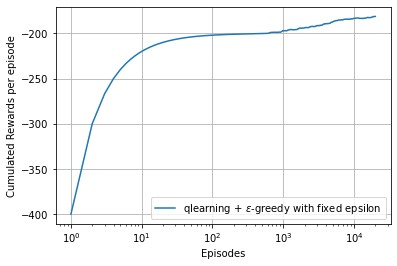

In [17]:
plot_cum_rewards(cumulative_rewards_qlearn,'qlearning')

## SARSA algorithm with epsilon greedy strategy:

In [18]:
algo_sarsa = sarsa(num_states,actions = actions,alpha=lr,gamma = gamma,epsilon=epsilon)

In [19]:
rewards_sarsa = train(algo_sarsa,episodes,steps)


Episode 0 finished  , position -0.494, velocity -0.011 
Episode 1 finished  , position -0.626, velocity -0.015 
Episode 2 finished  , position -0.401, velocity 0.008 
Episode 3 finished  , position -0.48, velocity 0.009 
Episode 4 finished  , position -0.47, velocity 0.007 
Episode 5 finished  , position -0.519, velocity 0.0 
Episode 6 finished  , position -0.235, velocity -0.007 
Episode 7 finished  , position -0.501, velocity -0.02 
Episode 8 finished  , position -0.584, velocity 0.021 
Episode 9 finished  , position -0.789, velocity -0.016 
Episode 10 finished  , position -0.563, velocity -0.019 
Episode 11 finished  , position -0.509, velocity -0.001 
Episode 12 finished  , position -0.264, velocity -0.006 
Episode 13 finished  , position -0.741, velocity 0.0 
Episode 14 finished  , position -0.418, velocity -0.003 
Episode 15 finished  , position -0.716, velocity -0.007 
Episode 16 finished  , position -0.763, velocity -0.02 
Episode 17 finished  , position -0.276, velocity 0.014 

Episode 155 finished  , position -0.534, velocity -0.002 
Episode 156 finished  , position -0.929, velocity -0.012 
Episode 157 finished  , position -0.161, velocity 0.01 
Episode 158 finished  , position -0.689, velocity -0.036 
Episode 159 finished  , position -0.73, velocity 0.033 
Episode 160 finished  , position -1.12, velocity 0.02 
Episode 161 finished  , position -1.172, velocity 0.003 
Episode 162 finished  , position -0.437, velocity 0.033 
Episode 163 finished  , position -1.028, velocity -0.026 
Episode 164 finished  , position -0.829, velocity -0.025 
Episode 165 finished  , position -0.744, velocity 0.043 
Episode 166 finished  , position -0.961, velocity 0.018 
Episode 167 finished  , position -0.693, velocity 0.03 
Episode 168 finished  , position -1.103, velocity 0.017 
Episode 169 finished  , position -1.138, velocity 0.007 
Episode 170 finished  , position -0.809, velocity 0.024 
Episode 171 finished  , position -1.156, velocity -0.004 
Episode 172 finished  , positi

Episode 309 finished  , position -0.845, velocity 0.039 
Episode 310 finished  , position -1.011, velocity 0.03 
Episode 311 finished  , position -0.53, velocity -0.004 
Episode 312 finished  , position -1.16, velocity -0.027 
Episode 313 finished  , position -0.968, velocity -0.042 
Episode 314 finished  , position -1.114, velocity 0.001 
Episode 315 finished  , position -0.18, velocity -0.027 
Episode 316 finished  , position 0.08, velocity -0.006 
Episode 317 finished  , position -1.014, velocity -0.044 
Episode 318 finished  , position -0.771, velocity -0.054 
Episode 319 finished  , position -0.229, velocity -0.045 
Episode 320 finished  , position -1.097, velocity 0.001 
Episode 321 finished  , position -1.177, velocity 0.01 
Episode 322 finished  , position -0.931, velocity 0.036 
Episode 323 finished  , position -0.651, velocity -0.018 
Episode 324 finished  , position -1.171, velocity 0.01 
Episode 325 finished  , position -1.149, velocity 0.001 
Episode 326 finished  , positi

Episode 464 finished  , position -0.864, velocity -0.033 
Episode 465 finished  , position -0.62, velocity -0.036 
Episode 466 finished  , position 0.04, velocity -0.016 
Episode 467 finished  , position -1.025, velocity -0.034 
Episode 468 finished  , position -0.549, velocity -0.035 
Episode 469 finished  , position 0.131, velocity 0.002 
Episode 470 finished  , position -1.153, velocity 0.013 
Episode 471 finished  , position 0.121, velocity -0.021 
Episode 472 finished  , position -0.054, velocity 0.031 
Episode 473 finished  , position 0.165, velocity -0.025 
Episode 474 finished  , position -1.126, velocity 0.013 
Episode 475 finished  , position -1.126, velocity 0.018 
Episode 476 finished  , position -1.192, velocity 0.004 
Episode 477 finished  , position 0.252, velocity 0.006 
Episode 478 finished  , position -1.12, velocity 0.017 
Episode 479 finished  , position -1.2, velocity 0.0 
Episode 480 finished  , position -1.144, velocity 0.015 
Episode 481 finished  , position -1.

Episode 628 finished  , position -0.975, velocity 0.035 
Episode 629 finished  , position -0.604, velocity 0.054 
Episode 630 finished  , position -1.05, velocity 0.026 
Episode 631 finished  , position -0.868, velocity 0.042 
Episode 632 finished  , position -0.529, velocity 0.001 
Episode 633 finished  , position -0.479, velocity 0.01 
Episode 634 finished  , position -0.209, velocity 0.038 
Episode 635 finished  , position -0.287, velocity -0.046 
Episode 636 finished  , position -0.83, velocity -0.049 
Episode 637 finished  , position 0.444, velocity 0.018 
Episode 638 finished  , position -0.198, velocity 0.051 
Episode 639 finished  , position -0.381, velocity 0.055 
Episode 640 finished  , position -1.041, velocity -0.017 
Episode 641 finished  , position 0.393, velocity 0.015 
Episode 642 finished  , position -0.251, velocity 0.038 
Episode 643 finished  , position -1.117, velocity -0.024 
Episode 644 finished  , position -0.004, velocity 0.008 
Episode 645 finished  , position

Episode 782 finished  , position -0.994, velocity 0.031 
Episode 783 finished  , position -0.326, velocity 0.054 
Episode 784 finished  , position 0.495, velocity 0.025 
Episode 785 finished  , position -0.039, velocity 0.044 
Episode 786 finished  , position 0.463, velocity 0.01 
Episode 787 finished  , position -1.161, velocity 0.014 
Episode 788 finished  , position -1.198, velocity 0.002 
Episode 789 finished  , position -0.488, velocity 0.056 
Episode 790 finished  , position 0.524, velocity 0.027 
Episode 791 finished  , position 0.508, velocity 0.022 
Episode 792 finished  , position -0.875, velocity 0.02 
Episode 793 finished  , position -0.408, velocity 0.054 
Episode 794 finished  , position -0.283, velocity 0.054 
Episode 795 finished  , position -0.175, velocity 0.016 
Episode 796 finished  , position 0.506, velocity 0.024 
Episode 797 finished  , position 0.44, velocity 0.025 
Episode 798 finished  , position 0.52, velocity 0.028 
Episode 799 finished  , position 0.521, ve

Episode 931 finished  , position -0.704, velocity 0.039 
Episode 932 finished  , position -1.035, velocity -0.043 
Episode 933 finished  , position -0.714, velocity 0.038 
Episode 934 finished  , position -1.037, velocity 0.028 
Episode 935 finished  , position -1.122, velocity 0.016 
Episode 936 finished  , position -0.817, velocity 0.046 
Episode 937 finished  , position -0.96, velocity 0.036 
Episode 938 finished  , position -1.114, velocity 0.02 
Episode 939 finished  , position -0.702, velocity 0.049 
Episode 940 finished  , position -1.098, velocity 0.024 
Episode 941 finished  , position -1.145, velocity 0.015 
Episode 942 finished  , position -1.195, velocity 0.003 
Episode 943 finished  , position -0.456, velocity 0.034 
Episode 944 finished  , position -0.964, velocity 0.034 
Episode 945 finished  , position -0.567, velocity -0.055 
Episode 946 finished  , position -0.903, velocity 0.039 
Episode 947 finished  , position -0.447, velocity 0.055 
Episode 948 finished  , positio

Episode 1076 finished  , position 0.24, velocity -0.007 
Episode 1077 finished  , position -1.141, velocity 0.018 
Episode 1078 finished  , position -0.859, velocity -0.054 
Episode 1079 finished  , position -0.42, velocity -0.052 
Episode 1080 finished  , position 0.201, velocity 0.005 
Episode 1081 finished  , position -1.197, velocity 0.003 
Episode 1082 finished  , position -0.664, velocity -0.057 
Episode 1083 finished  , position -1.19, velocity 0.006 
Episode 1084 finished  , position 0.033, velocity -0.004 
Episode 1085 finished  , position -0.281, velocity 0.046 
Episode 1086 finished  , position -0.107, velocity -0.038 
Episode 1087 finished  , position -0.908, velocity 0.039 
Episode 1088 finished  , position -1.15, velocity 0.015 
Episode 1089 finished  , position 0.213, velocity 0.011 
Episode 1090 finished  , position -1.043, velocity -0.041 
Episode 1091 finished  , position -0.86, velocity 0.041 
Episode 1092 finished  , position -1.038, velocity -0.045 
Episode 1093 fi

Episode 1222 finished  , position -0.832, velocity 0.039 
Episode 1223 finished  , position 0.382, velocity 0.011 
Episode 1224 finished  , position -0.976, velocity 0.03 
Episode 1225 finished  , position 0.356, velocity 0.019 
Episode 1226 finished  , position -0.52, velocity 0.002 
Episode 1227 finished  , position 0.279, velocity -0.003 
Episode 1228 finished  , position -0.538, velocity -0.003 
Episode 1229 finished  , position -0.546, velocity -0.002 
Episode 1230 finished  , position -1.042, velocity -0.052 
Episode 1231 finished  , position -1.191, velocity 0.005 
Episode 1232 finished  , position 0.506, velocity 0.015 
Episode 1233 finished  , position -1.071, velocity 0.024 
Episode 1234 finished  , position -0.793, velocity -0.057 
Episode 1235 finished  , position 0.163, velocity 0.01 
Episode 1236 finished  , position -0.596, velocity 0.001 
Episode 1237 finished  , position -0.855, velocity 0.041 
Episode 1238 finished  , position -0.738, velocity 0.047 
Episode 1239 fini

Episode 1370 finished  , position -0.497, velocity -0.0 
Episode 1371 finished  , position -0.439, velocity -0.038 
Episode 1372 finished  , position -1.167, velocity 0.013 
Episode 1373 finished  , position 0.507, velocity 0.022 
Episode 1374 finished  , position 0.424, velocity 0.023 
Episode 1375 finished  , position -0.502, velocity -0.056 
Episode 1376 finished  , position -1.124, velocity -0.008 
Episode 1377 finished  , position -0.869, velocity 0.036 
Episode 1378 finished  , position -1.023, velocity 0.022 
Episode 1379 finished  , position -0.311, velocity -0.053 
Episode 1380 finished  , position -0.144, velocity -0.019 
Episode 1381 finished  , position -0.009, velocity -0.01 
Episode 1382 finished  , position -1.011, velocity -0.032 
Episode 1383 finished  , position 0.498, velocity 0.016 
Episode 1384 finished  , position 0.367, velocity -0.001 
Episode 1385 finished  , position -1.169, velocity 0.012 
Episode 1386 finished  , position -0.432, velocity 0.051 
Episode 1387

Episode 1512 finished  , position -0.298, velocity -0.043 
Episode 1513 finished  , position -0.245, velocity -0.033 
Episode 1514 finished  , position -1.197, velocity 0.003 
Episode 1515 finished  , position -0.525, velocity -0.001 
Episode 1516 finished  , position -0.428, velocity 0.006 
Episode 1517 finished  , position 0.505, velocity 0.011 
Episode 1518 finished  , position 0.306, velocity 0.017 
Episode 1519 finished  , position 0.086, velocity 0.004 
Episode 1520 finished  , position -0.617, velocity 0.054 
Episode 1521 finished  , position -1.141, velocity -0.021 
Episode 1522 finished  , position -1.144, velocity 0.014 
Episode 1523 finished  , position 0.259, velocity 0.031 
Episode 1524 finished  , position -0.221, velocity -0.038 
Episode 1525 finished  , position -0.058, velocity -0.001 
Episode 1526 finished  , position -0.202, velocity 0.027 
Episode 1527 finished  , position -0.936, velocity 0.039 
Episode 1528 finished  , position -0.747, velocity 0.051 
Episode 1529

Episode 1673 finished  , position -0.541, velocity -0.0 
Episode 1674 finished  , position 0.165, velocity 0.017 
Episode 1675 finished  , position -0.507, velocity -0.001 
Episode 1676 finished  , position -1.068, velocity 0.026 
Episode 1677 finished  , position -1.163, velocity 0.013 
Episode 1678 finished  , position 0.188, velocity 0.01 
Episode 1679 finished  , position -0.994, velocity -0.05 
Episode 1680 finished  , position -0.851, velocity 0.042 
Episode 1681 finished  , position -1.04, velocity 0.027 
Episode 1682 finished  , position -1.135, velocity -0.042 
Episode 1683 finished  , position -1.102, velocity -0.046 
Episode 1684 finished  , position -1.1, velocity -0.049 
Episode 1685 finished  , position -1.2, velocity 0.0 
Episode 1686 finished  , position 0.075, velocity -0.027 
Episode 1687 finished  , position -1.014, velocity 0.033 
Episode 1688 finished  , position -1.11, velocity 0.022 
Episode 1689 finished  , position -0.78, velocity -0.055 
Episode 1690 finished 

Episode 1816 finished  , position -0.751, velocity -0.058 
Episode 1817 finished  , position 0.083, velocity 0.028 
Episode 1818 finished  , position -1.101, velocity -0.018 
Episode 1819 finished  , position -0.126, velocity -0.02 
Episode 1820 finished  , position -1.15, velocity 0.0 
Episode 1821 finished  , position -0.048, velocity -0.046 
Episode 1822 finished  , position -0.234, velocity -0.052 
Episode 1823 finished  , position -0.912, velocity 0.03 
Episode 1824 finished  , position 0.367, velocity 0.025 
Episode 1825 finished  , position -0.128, velocity -0.049 
Episode 1826 finished  , position -0.165, velocity -0.047 
Episode 1827 finished  , position 0.191, velocity 0.029 
Episode 1828 finished  , position -1.108, velocity -0.038 
Episode 1829 finished  , position 0.505, velocity 0.016 
Episode 1830 finished  , position 0.316, velocity 0.018 
Episode 1831 finished  , position 0.505, velocity 0.005 
Episode 1832 finished  , position 0.15, velocity 0.028 
Episode 1833 finish

Episode 1966 finished  , position -0.656, velocity 0.053 
Episode 1967 finished  , position 0.032, velocity 0.012 
Episode 1968 finished  , position 0.505, velocity 0.022 
Episode 1969 finished  , position 0.506, velocity 0.024 
Episode 1970 finished  , position 0.51, velocity 0.028 
Episode 1971 finished  , position 0.52, velocity 0.023 
Episode 1972 finished  , position 0.01, velocity 0.026 
Episode 1973 finished  , position -0.607, velocity 0.056 
Episode 1974 finished  , position -0.94, velocity 0.039 
Episode 1975 finished  , position -0.738, velocity 0.049 
Episode 1976 finished  , position 0.52, velocity 0.021 
Episode 1977 finished  , position 0.504, velocity 0.023 
Episode 1978 finished  , position 0.513, velocity 0.03 
Episode 1979 finished  , position -1.182, velocity 0.009 
Episode 1980 finished  , position -0.597, velocity -0.058 
Episode 1981 finished  , position 0.504, velocity 0.016 
Episode 1982 finished  , position 0.5, velocity 0.033 
Episode 1983 finished  , positio

Episode 2117 finished  , position -1.2, velocity 0.0 
Episode 2118 finished  , position -1.182, velocity 0.009 
Episode 2119 finished  , position -0.936, velocity 0.034 
Episode 2120 finished  , position 0.234, velocity -0.015 
Episode 2121 finished  , position -1.168, velocity 0.012 
Episode 2122 finished  , position -0.519, velocity 0.0 
Episode 2123 finished  , position -0.488, velocity 0.001 
Episode 2124 finished  , position 0.479, velocity 0.013 
Episode 2125 finished  , position 0.507, velocity 0.008 
Episode 2126 finished  , position -0.081, velocity 0.034 
Episode 2127 finished  , position -1.094, velocity 0.023 
Episode 2128 finished  , position -0.956, velocity 0.032 
Episode 2129 finished  , position -0.652, velocity 0.047 
Episode 2130 finished  , position -1.054, velocity 0.027 
Episode 2131 finished  , position -1.122, velocity 0.006 
Episode 2132 finished  , position -1.018, velocity 0.029 
Episode 2133 finished  , position -0.665, velocity 0.048 
Episode 2134 finished 

Episode 2262 finished  , position 0.407, velocity 0.02 
Episode 2263 finished  , position 0.514, velocity 0.025 
Episode 2264 finished  , position 0.521, velocity 0.027 
Episode 2265 finished  , position 0.532, velocity 0.032 
Episode 2266 finished  , position 0.528, velocity 0.034 
Episode 2267 finished  , position 0.502, velocity 0.031 
Episode 2268 finished  , position 0.505, velocity 0.026 
Episode 2269 finished  , position 0.251, velocity 0.038 
Episode 2270 finished  , position -0.347, velocity 0.04 
Episode 2271 finished  , position -0.52, velocity 0.001 
Episode 2272 finished  , position 0.511, velocity 0.023 
Episode 2273 finished  , position 0.511, velocity 0.027 
Episode 2274 finished  , position 0.505, velocity 0.026 
Episode 2275 finished  , position -0.798, velocity 0.048 
Episode 2276 finished  , position -0.907, velocity -0.021 
Episode 2277 finished  , position -0.442, velocity 0.055 
Episode 2278 finished  , position 0.51, velocity 0.015 
Episode 2279 finished  , posi

Episode 2408 finished  , position -0.989, velocity -0.015 
Episode 2409 finished  , position -0.572, velocity 0.052 
Episode 2410 finished  , position -0.729, velocity 0.045 
Episode 2411 finished  , position -0.873, velocity 0.041 
Episode 2412 finished  , position -0.876, velocity 0.04 
Episode 2413 finished  , position -0.93, velocity 0.041 
Episode 2414 finished  , position -0.46, velocity 0.056 
Episode 2415 finished  , position -1.158, velocity 0.003 
Episode 2416 finished  , position -0.482, velocity 0.037 
Episode 2417 finished  , position -1.122, velocity 0.021 
Episode 2418 finished  , position 0.205, velocity 0.013 
Episode 2419 finished  , position -1.181, velocity 0.008 
Episode 2420 finished  , position -0.551, velocity 0.055 
Episode 2421 finished  , position 0.525, velocity 0.027 
Episode 2422 finished  , position -0.928, velocity 0.04 
Episode 2423 finished  , position 0.285, velocity 0.021 
Episode 2424 finished  , position -1.108, velocity 0.022 
Episode 2425 finishe

Episode 2562 finished  , position -1.132, velocity 0.019 
Episode 2563 finished  , position -0.202, velocity -0.043 
Episode 2564 finished  , position -0.158, velocity -0.046 
Episode 2565 finished  , position 0.226, velocity 0.033 
Episode 2566 finished  , position 0.504, velocity 0.022 
Episode 2567 finished  , position 0.515, velocity 0.032 
Episode 2568 finished  , position -0.197, velocity -0.04 
Episode 2569 finished  , position -0.345, velocity -0.035 
Episode 2570 finished  , position 0.509, velocity 0.015 
Episode 2571 finished  , position -0.622, velocity -0.057 
Episode 2572 finished  , position 0.51, velocity 0.013 
Episode 2573 finished  , position 0.132, velocity -0.01 
Episode 2574 finished  , position -0.867, velocity -0.05 
Episode 2575 finished  , position 0.503, velocity 0.029 
Episode 2576 finished  , position -0.498, velocity -0.052 
Episode 2577 finished  , position -0.589, velocity -0.053 
Episode 2578 finished  , position -0.229, velocity 0.043 
Episode 2579 fin

Episode 2722 finished  , position -1.198, velocity 0.002 
Episode 2723 finished  , position -0.534, velocity 0.056 
Episode 2724 finished  , position -1.09, velocity 0.024 
Episode 2725 finished  , position 0.07, velocity -0.019 
Episode 2726 finished  , position -1.192, velocity 0.005 
Episode 2727 finished  , position -0.739, velocity 0.048 
Episode 2728 finished  , position -1.137, velocity 0.018 
Episode 2729 finished  , position 0.505, velocity 0.009 
Episode 2730 finished  , position 0.505, velocity 0.016 
Episode 2731 finished  , position -1.093, velocity 0.021 
Episode 2732 finished  , position 0.512, velocity 0.027 
Episode 2733 finished  , position 0.167, velocity -0.022 
Episode 2734 finished  , position -1.198, velocity 0.002 
Episode 2735 finished  , position -0.764, velocity -0.058 
Episode 2736 finished  , position 0.1, velocity -0.032 
Episode 2737 finished  , position 0.321, velocity 0.013 
Episode 2738 finished  , position -0.958, velocity -0.031 
Episode 2739 finishe

Episode 2868 finished  , position 0.102, velocity -0.034 
Episode 2869 finished  , position -0.464, velocity -0.055 
Episode 2870 finished  , position -1.035, velocity 0.029 
Episode 2871 finished  , position -0.444, velocity 0.051 
Episode 2872 finished  , position -0.985, velocity 0.033 
Episode 2873 finished  , position -1.175, velocity 0.009 
Episode 2874 finished  , position -0.293, velocity 0.047 
Episode 2875 finished  , position -1.013, velocity -0.051 
Episode 2876 finished  , position -0.537, velocity -0.001 
Episode 2877 finished  , position 0.187, velocity -0.026 
Episode 2878 finished  , position -0.515, velocity 0.034 
Episode 2879 finished  , position -0.62, velocity 0.046 
Episode 2880 finished  , position -0.507, velocity 0.001 
Episode 2881 finished  , position -0.515, velocity -0.001 
Episode 2882 finished  , position 0.33, velocity 0.007 
Episode 2883 finished  , position 0.51, velocity 0.012 
Episode 2884 finished  , position 0.343, velocity -0.013 
Episode 2885 fi

Episode 3011 finished  , position 0.509, velocity 0.015 
Episode 3012 finished  , position -0.71, velocity 0.051 
Episode 3013 finished  , position -1.138, velocity 0.001 
Episode 3014 finished  , position -1.177, velocity 0.01 
Episode 3015 finished  , position -0.983, velocity 0.033 
Episode 3016 finished  , position -1.136, velocity 0.008 
Episode 3017 finished  , position -1.122, velocity 0.02 
Episode 3018 finished  , position -1.15, velocity 0.015 
Episode 3019 finished  , position -0.629, velocity -0.063 
Episode 3020 finished  , position -1.15, velocity 0.014 
Episode 3021 finished  , position -0.82, velocity 0.044 
Episode 3022 finished  , position -0.856, velocity 0.043 
Episode 3023 finished  , position -1.086, velocity 0.022 
Episode 3024 finished  , position -1.082, velocity 0.026 
Episode 3025 finished  , position -0.868, velocity -0.017 
Episode 3026 finished  , position -1.179, velocity -0.028 
Episode 3027 finished  , position -1.193, velocity 0.004 
Episode 3028 finis

Episode 3169 finished  , position -1.18, velocity 0.01 
Episode 3170 finished  , position -1.013, velocity 0.011 
Episode 3171 finished  , position 0.501, velocity 0.021 
Episode 3172 finished  , position 0.501, velocity 0.006 
Episode 3173 finished  , position 0.033, velocity -0.016 
Episode 3174 finished  , position 0.465, velocity 0.031 
Episode 3175 finished  , position 0.486, velocity 0.013 
Episode 3176 finished  , position 0.001, velocity 0.038 
Episode 3177 finished  , position 0.091, velocity -0.021 
Episode 3178 finished  , position -0.223, velocity -0.053 
Episode 3179 finished  , position 0.518, velocity 0.032 
Episode 3180 finished  , position 0.503, velocity 0.025 
Episode 3181 finished  , position 0.507, velocity 0.008 
Episode 3182 finished  , position 0.516, velocity 0.019 
Episode 3183 finished  , position 0.515, velocity 0.022 
Episode 3184 finished  , position 0.529, velocity 0.03 
Episode 3185 finished  , position -0.118, velocity -0.047 
Episode 3186 finished  , p

Episode 3331 finished  , position -0.972, velocity 0.035 
Episode 3332 finished  , position -0.634, velocity 0.054 
Episode 3333 finished  , position 0.513, velocity 0.021 
Episode 3334 finished  , position 0.533, velocity 0.036 
Episode 3335 finished  , position -0.971, velocity -0.05 
Episode 3336 finished  , position -0.702, velocity 0.053 
Episode 3337 finished  , position 0.01, velocity 0.045 
Episode 3338 finished  , position -0.596, velocity -0.057 
Episode 3339 finished  , position -0.373, velocity 0.047 
Episode 3340 finished  , position 0.503, velocity 0.022 
Episode 3341 finished  , position 0.092, velocity 0.007 
Episode 3342 finished  , position -0.76, velocity 0.05 
Episode 3343 finished  , position -0.847, velocity -0.058 
Episode 3344 finished  , position -0.514, velocity 0.0 
Episode 3345 finished  , position -1.095, velocity 0.025 
Episode 3346 finished  , position -0.577, velocity -0.004 
Episode 3347 finished  , position -0.429, velocity -0.001 
Episode 3348 finishe

Episode 3482 finished  , position 0.396, velocity 0.03 
Episode 3483 finished  , position -0.503, velocity -0.056 
Episode 3484 finished  , position -1.18, velocity 0.01 
Episode 3485 finished  , position 0.514, velocity 0.026 
Episode 3486 finished  , position -0.497, velocity 0.054 
Episode 3487 finished  , position 0.193, velocity 0.04 
Episode 3488 finished  , position 0.512, velocity 0.021 
Episode 3489 finished  , position 0.5, velocity 0.03 
Episode 3490 finished  , position -0.816, velocity -0.056 
Episode 3491 finished  , position 0.501, velocity 0.017 
Episode 3492 finished  , position -1.167, velocity 0.013 
Episode 3493 finished  , position -0.706, velocity -0.064 
Episode 3494 finished  , position 0.422, velocity 0.031 
Episode 3495 finished  , position -0.969, velocity 0.021 
Episode 3496 finished  , position -1.041, velocity 0.03 
Episode 3497 finished  , position -0.915, velocity 0.038 
Episode 3498 finished  , position -0.821, velocity -0.06 
Episode 3499 finished  , p

Episode 3628 finished  , position 0.18, velocity -0.029 
Episode 3629 finished  , position -0.929, velocity -0.052 
Episode 3630 finished  , position 0.505, velocity 0.013 
Episode 3631 finished  , position -1.081, velocity 0.024 
Episode 3632 finished  , position 0.145, velocity -0.029 
Episode 3633 finished  , position -1.09, velocity 0.022 
Episode 3634 finished  , position -0.666, velocity 0.047 
Episode 3635 finished  , position -0.174, velocity 0.047 
Episode 3636 finished  , position 0.321, velocity -0.013 
Episode 3637 finished  , position 0.509, velocity 0.011 
Episode 3638 finished  , position 0.509, velocity 0.01 
Episode 3639 finished  , position 0.518, velocity 0.03 
Episode 3640 finished  , position 0.516, velocity 0.022 
Episode 3641 finished  , position 0.513, velocity 0.022 
Episode 3642 finished  , position 0.508, velocity 0.021 
Episode 3643 finished  , position 0.513, velocity 0.019 
Episode 3644 finished  , position 0.503, velocity 0.023 
Episode 3645 finished  , p

Episode 3773 finished  , position -0.457, velocity 0.052 
Episode 3774 finished  , position 0.522, velocity 0.028 
Episode 3775 finished  , position 0.498, velocity 0.011 
Episode 3776 finished  , position -0.824, velocity -0.034 
Episode 3777 finished  , position -1.039, velocity -0.051 
Episode 3778 finished  , position 0.51, velocity 0.025 
Episode 3779 finished  , position 0.507, velocity 0.029 
Episode 3780 finished  , position -0.777, velocity -0.029 
Episode 3781 finished  , position 0.501, velocity 0.01 
Episode 3782 finished  , position -0.745, velocity -0.052 
Episode 3783 finished  , position 0.501, velocity 0.012 
Episode 3784 finished  , position -1.008, velocity 0.032 
Episode 3785 finished  , position 0.067, velocity 0.037 
Episode 3786 finished  , position 0.195, velocity 0.038 
Episode 3787 finished  , position 0.5, velocity 0.014 
Episode 3788 finished  , position -1.017, velocity 0.013 
Episode 3789 finished  , position -0.045, velocity 0.04 
Episode 3790 finished  ,

Episode 3917 finished  , position 0.147, velocity 0.025 
Episode 3918 finished  , position -0.041, velocity -0.041 
Episode 3919 finished  , position 0.329, velocity -0.008 
Episode 3920 finished  , position 0.501, velocity 0.02 
Episode 3921 finished  , position 0.293, velocity -0.018 
Episode 3922 finished  , position -0.155, velocity -0.045 
Episode 3923 finished  , position 0.352, velocity -0.01 
Episode 3924 finished  , position -1.2, velocity 0.0 
Episode 3925 finished  , position -0.175, velocity -0.051 
Episode 3926 finished  , position -0.866, velocity -0.058 
Episode 3927 finished  , position -1.181, velocity -0.045 
Episode 3928 finished  , position -0.567, velocity 0.05 
Episode 3929 finished  , position -1.061, velocity 0.026 
Episode 3930 finished  , position 0.511, velocity 0.027 
Episode 3931 finished  , position 0.509, velocity 0.021 
Episode 3932 finished  , position 0.501, velocity 0.028 
Episode 3933 finished  , position 0.507, velocity 0.017 
Episode 3934 finished 

Episode 4061 finished  , position -0.633, velocity -0.041 
Episode 4062 finished  , position -1.087, velocity -0.045 
Episode 4063 finished  , position 0.366, velocity 0.005 
Episode 4064 finished  , position -0.013, velocity 0.028 
Episode 4065 finished  , position -1.026, velocity -0.052 
Episode 4066 finished  , position -1.052, velocity 0.028 
Episode 4067 finished  , position 0.507, velocity 0.013 
Episode 4068 finished  , position -0.174, velocity -0.049 
Episode 4069 finished  , position -0.774, velocity 0.045 
Episode 4070 finished  , position -0.032, velocity 0.044 
Episode 4071 finished  , position 0.52, velocity 0.021 
Episode 4072 finished  , position -0.543, velocity 0.055 
Episode 4073 finished  , position -0.786, velocity 0.049 
Episode 4074 finished  , position -1.117, velocity 0.02 
Episode 4075 finished  , position -0.325, velocity 0.049 
Episode 4076 finished  , position -0.529, velocity 0.051 
Episode 4077 finished  , position -0.026, velocity 0.047 
Episode 4078 fi

Episode 4222 finished  , position -1.144, velocity 0.017 
Episode 4223 finished  , position 0.204, velocity -0.021 
Episode 4224 finished  , position 0.386, velocity 0.033 
Episode 4225 finished  , position 0.507, velocity 0.014 
Episode 4226 finished  , position -0.516, velocity 0.054 
Episode 4227 finished  , position -0.778, velocity 0.05 
Episode 4228 finished  , position 0.511, velocity 0.029 
Episode 4229 finished  , position -0.677, velocity 0.052 
Episode 4230 finished  , position 0.52, velocity 0.028 
Episode 4231 finished  , position -0.246, velocity 0.05 
Episode 4232 finished  , position -0.547, velocity 0.049 
Episode 4233 finished  , position 0.519, velocity 0.028 
Episode 4234 finished  , position 0.516, velocity 0.03 
Episode 4235 finished  , position -0.551, velocity 0.0 
Episode 4236 finished  , position -0.812, velocity 0.046 
Episode 4237 finished  , position 0.503, velocity 0.019 
Episode 4238 finished  , position 0.511, velocity 0.027 
Episode 4239 finished  , pos

Episode 4371 finished  , position 0.509, velocity 0.031 
Episode 4372 finished  , position 0.46, velocity 0.026 
Episode 4373 finished  , position 0.505, velocity 0.006 
Episode 4374 finished  , position -0.668, velocity 0.05 
Episode 4375 finished  , position 0.167, velocity -0.0 
Episode 4376 finished  , position -0.238, velocity 0.05 
Episode 4377 finished  , position 0.507, velocity 0.029 
Episode 4378 finished  , position 0.512, velocity 0.034 
Episode 4379 finished  , position 0.501, velocity 0.027 
Episode 4380 finished  , position -0.562, velocity 0.017 
Episode 4381 finished  , position 0.512, velocity 0.014 
Episode 4382 finished  , position -1.173, velocity 0.002 
Episode 4383 finished  , position -0.218, velocity 0.054 
Episode 4384 finished  , position 0.513, velocity 0.021 
Episode 4385 finished  , position -0.489, velocity -0.013 
Episode 4386 finished  , position -1.16, velocity -0.014 
Episode 4387 finished  , position -0.122, velocity 0.011 
Episode 4388 finished  , p

Episode 4519 finished  , position 0.501, velocity 0.02 
Episode 4520 finished  , position 0.518, velocity 0.023 
Episode 4521 finished  , position -1.145, velocity 0.002 
Episode 4522 finished  , position 0.5, velocity 0.004 
Episode 4523 finished  , position 0.501, velocity 0.015 
Episode 4524 finished  , position 0.505, velocity 0.03 
Episode 4525 finished  , position -1.108, velocity -0.004 
Episode 4526 finished  , position 0.508, velocity 0.016 
Episode 4527 finished  , position 0.505, velocity 0.017 
Episode 4528 finished  , position -0.504, velocity -0.034 
Episode 4529 finished  , position 0.509, velocity 0.015 
Episode 4530 finished  , position 0.51, velocity 0.012 
Episode 4531 finished  , position 0.456, velocity 0.015 
Episode 4532 finished  , position -0.358, velocity 0.047 
Episode 4533 finished  , position 0.502, velocity 0.012 
Episode 4534 finished  , position -0.266, velocity 0.043 
Episode 4535 finished  , position 0.5, velocity 0.001 
Episode 4536 finished  , positi

Episode 4673 finished  , position -1.191, velocity 0.005 
Episode 4674 finished  , position 0.509, velocity 0.022 
Episode 4675 finished  , position 0.501, velocity 0.038 
Episode 4676 finished  , position -0.616, velocity 0.041 
Episode 4677 finished  , position 0.459, velocity 0.031 
Episode 4678 finished  , position 0.505, velocity 0.029 
Episode 4679 finished  , position 0.466, velocity 0.016 
Episode 4680 finished  , position 0.525, velocity 0.026 
Episode 4681 finished  , position -1.152, velocity 0.014 
Episode 4682 finished  , position -0.535, velocity -0.001 
Episode 4683 finished  , position 0.117, velocity 0.04 
Episode 4684 finished  , position -0.517, velocity -0.001 
Episode 4685 finished  , position -0.877, velocity 0.036 
Episode 4686 finished  , position 0.518, velocity 0.034 
Episode 4687 finished  , position -0.98, velocity 0.024 
Episode 4688 finished  , position 0.502, velocity 0.006 
Episode 4689 finished  , position -1.184, velocity 0.009 
Episode 4690 finished  

Episode 4818 finished  , position -1.019, velocity -0.049 
Episode 4819 finished  , position -1.03, velocity 0.031 
Episode 4820 finished  , position -0.571, velocity 0.053 
Episode 4821 finished  , position 0.345, velocity 0.006 
Episode 4822 finished  , position 0.074, velocity -0.025 
Episode 4823 finished  , position 0.506, velocity 0.042 
Episode 4824 finished  , position -1.085, velocity 0.024 
Episode 4825 finished  , position -0.45, velocity 0.004 
Episode 4826 finished  , position 0.093, velocity -0.031 
Episode 4827 finished  , position -0.284, velocity -0.054 
Episode 4828 finished  , position -0.42, velocity -0.037 
Episode 4829 finished  , position 0.504, velocity 0.006 
Episode 4830 finished  , position -0.725, velocity 0.046 
Episode 4831 finished  , position 0.253, velocity -0.014 
Episode 4832 finished  , position 0.518, velocity 0.022 
Episode 4833 finished  , position 0.504, velocity 0.009 
Episode 4834 finished  , position 0.524, velocity 0.027 
Episode 4835 finishe

Episode 4964 finished  , position -0.593, velocity 0.048 
Episode 4965 finished  , position 0.504, velocity 0.006 
Episode 4966 finished  , position -0.412, velocity 0.051 
Episode 4967 finished  , position 0.506, velocity 0.012 
Episode 4968 finished  , position -0.464, velocity 0.053 
Episode 4969 finished  , position 0.502, velocity 0.011 
Episode 4970 finished  , position -0.715, velocity 0.016 
Episode 4971 finished  , position 0.501, velocity 0.003 
Episode 4972 finished  , position 0.439, velocity 0.015 
Episode 4973 finished  , position -0.53, velocity -0.0 
Episode 4974 finished  , position 0.517, velocity 0.017 
Episode 4975 finished  , position -0.56, velocity -0.019 
Episode 4976 finished  , position 0.268, velocity 0.003 
Episode 4977 finished  , position 0.421, velocity 0.024 
Episode 4978 finished  , position 0.357, velocity 0.015 
Episode 4979 finished  , position 0.508, velocity 0.014 
Episode 4980 finished  , position 0.512, velocity 0.022 
Episode 4981 finished  , po

Episode 5116 finished  , position -0.33, velocity 0.046 
Episode 5117 finished  , position -0.054, velocity 0.043 
Episode 5118 finished  , position -0.934, velocity 0.039 
Episode 5119 finished  , position 0.074, velocity 0.03 
Episode 5120 finished  , position -1.192, velocity 0.004 
Episode 5121 finished  , position -1.183, velocity 0.008 
Episode 5122 finished  , position -0.726, velocity 0.039 
Episode 5123 finished  , position 0.328, velocity 0.007 
Episode 5124 finished  , position 0.136, velocity -0.026 
Episode 5125 finished  , position -0.047, velocity -0.036 
Episode 5126 finished  , position -0.974, velocity 0.024 
Episode 5127 finished  , position 0.515, velocity 0.02 
Episode 5128 finished  , position -0.535, velocity 0.046 
Episode 5129 finished  , position 0.267, velocity 0.015 
Episode 5130 finished  , position -0.574, velocity 0.042 
Episode 5131 finished  , position -1.019, velocity 0.021 
Episode 5132 finished  , position 0.502, velocity 0.003 
Episode 5133 finished

Episode 5264 finished  , position -1.013, velocity -0.036 
Episode 5265 finished  , position 0.51, velocity 0.021 
Episode 5266 finished  , position -0.626, velocity -0.054 
Episode 5267 finished  , position -0.414, velocity 0.05 
Episode 5268 finished  , position -1.074, velocity 0.025 
Episode 5269 finished  , position -0.931, velocity 0.037 
Episode 5270 finished  , position -1.131, velocity 0.02 
Episode 5271 finished  , position -1.184, velocity 0.006 
Episode 5272 finished  , position -0.309, velocity 0.05 
Episode 5273 finished  , position 0.521, velocity 0.022 
Episode 5274 finished  , position -0.695, velocity 0.052 
Episode 5275 finished  , position -1.052, velocity 0.028 
Episode 5276 finished  , position 0.182, velocity 0.029 
Episode 5277 finished  , position -0.497, velocity 0.053 
Episode 5278 finished  , position -1.066, velocity 0.023 
Episode 5279 finished  , position -0.798, velocity 0.042 
Episode 5280 finished  , position -1.179, velocity -0.023 
Episode 5281 finis

Episode 5413 finished  , position -0.799, velocity 0.047 
Episode 5414 finished  , position -1.131, velocity 0.019 
Episode 5415 finished  , position 0.503, velocity 0.003 
Episode 5416 finished  , position -1.197, velocity 0.003 
Episode 5417 finished  , position -0.056, velocity 0.035 
Episode 5418 finished  , position -0.246, velocity 0.052 
Episode 5419 finished  , position -0.63, velocity 0.053 
Episode 5420 finished  , position -1.135, velocity 0.019 
Episode 5421 finished  , position 0.521, velocity 0.026 
Episode 5422 finished  , position -1.087, velocity -0.048 
Episode 5423 finished  , position -1.051, velocity 0.03 
Episode 5424 finished  , position -1.037, velocity -0.047 
Episode 5425 finished  , position -0.99, velocity 0.034 
Episode 5426 finished  , position -1.149, velocity -0.001 
Episode 5427 finished  , position -0.499, velocity 0.052 
Episode 5428 finished  , position 0.306, velocity 0.024 
Episode 5429 finished  , position 0.267, velocity 0.02 
Episode 5430 finish

Episode 5564 finished  , position 0.056, velocity 0.045 
Episode 5565 finished  , position 0.462, velocity 0.025 
Episode 5566 finished  , position 0.51, velocity 0.017 
Episode 5567 finished  , position 0.507, velocity 0.02 
Episode 5568 finished  , position 0.505, velocity 0.018 
Episode 5569 finished  , position 0.511, velocity 0.03 
Episode 5570 finished  , position 0.523, velocity 0.023 
Episode 5571 finished  , position -1.186, velocity 0.008 
Episode 5572 finished  , position 0.503, velocity 0.021 
Episode 5573 finished  , position -0.589, velocity 0.054 
Episode 5574 finished  , position -0.339, velocity -0.05 
Episode 5575 finished  , position 0.514, velocity 0.028 
Episode 5576 finished  , position 0.51, velocity 0.028 
Episode 5577 finished  , position 0.519, velocity 0.024 
Episode 5578 finished  , position -1.018, velocity 0.029 
Episode 5579 finished  , position 0.519, velocity 0.03 
Episode 5580 finished  , position -0.14, velocity -0.045 
Episode 5581 finished  , positi

Episode 5716 finished  , position 0.22, velocity -0.016 
Episode 5717 finished  , position -0.301, velocity 0.045 
Episode 5718 finished  , position -1.2, velocity 0.0 
Episode 5719 finished  , position -0.521, velocity -0.001 
Episode 5720 finished  , position -1.197, velocity 0.003 
Episode 5721 finished  , position -0.848, velocity 0.031 
Episode 5722 finished  , position 0.168, velocity 0.037 
Episode 5723 finished  , position -0.726, velocity 0.036 
Episode 5724 finished  , position 0.387, velocity 0.012 
Episode 5725 finished  , position -1.019, velocity -0.05 
Episode 5726 finished  , position -1.132, velocity -0.036 
Episode 5727 finished  , position -0.294, velocity -0.054 
Episode 5728 finished  , position -0.989, velocity -0.041 
Episode 5729 finished  , position -1.191, velocity 0.005 
Episode 5730 finished  , position -0.85, velocity 0.045 
Episode 5731 finished  , position -1.125, velocity 0.02 
Episode 5732 finished  , position -0.813, velocity 0.046 
Episode 5733 finish

Episode 5860 finished  , position 0.524, velocity 0.037 
Episode 5861 finished  , position 0.504, velocity 0.033 
Episode 5862 finished  , position 0.528, velocity 0.031 
Episode 5863 finished  , position 0.534, velocity 0.035 
Episode 5864 finished  , position 0.048, velocity -0.036 
Episode 5865 finished  , position 0.512, velocity 0.013 
Episode 5866 finished  , position 0.508, velocity 0.027 
Episode 5867 finished  , position 0.183, velocity -0.024 
Episode 5868 finished  , position 0.507, velocity 0.039 
Episode 5869 finished  , position 0.499, velocity 0.01 
Episode 5870 finished  , position 0.51, velocity 0.038 
Episode 5871 finished  , position 0.522, velocity 0.031 
Episode 5872 finished  , position 0.062, velocity 0.017 
Episode 5873 finished  , position 0.532, velocity 0.033 
Episode 5874 finished  , position 0.53, velocity 0.041 
Episode 5875 finished  , position 0.502, velocity 0.04 
Episode 5876 finished  , position 0.265, velocity -0.02 
Episode 5877 finished  , position

Episode 6008 finished  , position -0.041, velocity -0.019 
Episode 6009 finished  , position -1.158, velocity 0.013 
Episode 6010 finished  , position 0.516, velocity 0.021 
Episode 6011 finished  , position -0.843, velocity 0.047 
Episode 6012 finished  , position 0.516, velocity 0.018 
Episode 6013 finished  , position 0.527, velocity 0.037 
Episode 6014 finished  , position -1.143, velocity 0.017 
Episode 6015 finished  , position 0.146, velocity -0.026 
Episode 6016 finished  , position 0.533, velocity 0.036 
Episode 6017 finished  , position 0.409, velocity -0.001 
Episode 6018 finished  , position -0.336, velocity 0.051 
Episode 6019 finished  , position -0.386, velocity -0.032 
Episode 6020 finished  , position 0.35, velocity -0.007 
Episode 6021 finished  , position 0.479, velocity 0.008 
Episode 6022 finished  , position 0.32, velocity 0.016 
Episode 6023 finished  , position -0.037, velocity 0.036 
Episode 6024 finished  , position -0.484, velocity 0.058 
Episode 6025 finishe

Episode 6157 finished  , position -0.437, velocity 0.053 
Episode 6158 finished  , position -0.88, velocity 0.042 
Episode 6159 finished  , position -1.032, velocity 0.032 
Episode 6160 finished  , position 0.53, velocity 0.031 
Episode 6161 finished  , position -0.219, velocity 0.054 
Episode 6162 finished  , position -1.108, velocity 0.023 
Episode 6163 finished  , position -0.669, velocity 0.053 
Episode 6164 finished  , position -0.614, velocity 0.055 
Episode 6165 finished  , position 0.508, velocity 0.033 
Episode 6166 finished  , position -1.167, velocity 0.013 
Episode 6167 finished  , position -1.056, velocity 0.029 
Episode 6168 finished  , position -0.275, velocity 0.054 
Episode 6169 finished  , position 0.526, velocity 0.029 
Episode 6170 finished  , position 0.515, velocity 0.016 
Episode 6171 finished  , position -1.097, velocity 0.024 
Episode 6172 finished  , position 0.392, velocity 0.029 
Episode 6173 finished  , position -0.546, velocity 0.0 
Episode 6174 finished  

Episode 6309 finished  , position 0.278, velocity 0.024 
Episode 6310 finished  , position -0.381, velocity 0.007 
Episode 6311 finished  , position -1.061, velocity 0.026 
Episode 6312 finished  , position -0.977, velocity 0.036 
Episode 6313 finished  , position 0.209, velocity -0.006 
Episode 6314 finished  , position 0.511, velocity 0.03 
Episode 6315 finished  , position -1.2, velocity 0.0 
Episode 6316 finished  , position -0.431, velocity 0.05 
Episode 6317 finished  , position -0.476, velocity -0.041 
Episode 6318 finished  , position -0.255, velocity 0.038 
Episode 6319 finished  , position -1.08, velocity 0.023 
Episode 6320 finished  , position -0.709, velocity 0.052 
Episode 6321 finished  , position 0.062, velocity -0.038 
Episode 6322 finished  , position -0.852, velocity 0.045 
Episode 6323 finished  , position -1.167, velocity 0.013 
Episode 6324 finished  , position -0.58, velocity 0.055 
Episode 6325 finished  , position -0.547, velocity 0.056 
Episode 6326 finished  

Episode 6455 finished  , position 0.165, velocity 0.028 
Episode 6456 finished  , position 0.053, velocity -0.036 
Episode 6457 finished  , position -0.925, velocity 0.037 
Episode 6458 finished  , position -0.262, velocity -0.048 
Episode 6459 finished  , position -1.135, velocity 0.019 
Episode 6460 finished  , position -0.563, velocity -0.06 
Episode 6461 finished  , position -1.072, velocity -0.048 
Episode 6462 finished  , position -1.095, velocity 0.021 
Episode 6463 finished  , position -0.892, velocity 0.041 
Episode 6464 finished  , position -1.115, velocity -0.049 
Episode 6465 finished  , position -0.125, velocity -0.01 
Episode 6466 finished  , position -1.161, velocity -0.046 
Episode 6467 finished  , position 0.518, velocity 0.02 
Episode 6468 finished  , position 0.519, velocity 0.02 
Episode 6469 finished  , position 0.502, velocity 0.004 
Episode 6470 finished  , position -1.156, velocity 0.014 
Episode 6471 finished  , position -1.116, velocity 0.021 
Episode 6472 fin

Episode 6609 finished  , position -0.972, velocity -0.048 
Episode 6610 finished  , position 0.505, velocity 0.017 
Episode 6611 finished  , position 0.218, velocity -0.027 
Episode 6612 finished  , position 0.503, velocity 0.006 
Episode 6613 finished  , position 0.512, velocity 0.012 
Episode 6614 finished  , position 0.516, velocity 0.031 
Episode 6615 finished  , position 0.517, velocity 0.019 
Episode 6616 finished  , position 0.394, velocity 0.019 
Episode 6617 finished  , position 0.32, velocity 0.018 
Episode 6618 finished  , position 0.5, velocity 0.011 
Episode 6619 finished  , position 0.507, velocity 0.019 
Episode 6620 finished  , position 0.44, velocity 0.022 
Episode 6621 finished  , position -0.017, velocity -0.041 
Episode 6622 finished  , position -0.806, velocity 0.043 
Episode 6623 finished  , position -0.161, velocity 0.045 
Episode 6624 finished  , position -0.477, velocity -0.057 
Episode 6625 finished  , position -0.406, velocity 0.049 
Episode 6626 finished  , 

Episode 6757 finished  , position 0.508, velocity 0.018 
Episode 6758 finished  , position 0.521, velocity 0.025 
Episode 6759 finished  , position -1.172, velocity -0.045 
Episode 6760 finished  , position 0.505, velocity 0.023 
Episode 6761 finished  , position 0.425, velocity 0.001 
Episode 6762 finished  , position -0.997, velocity -0.016 
Episode 6763 finished  , position 0.507, velocity 0.016 
Episode 6764 finished  , position 0.501, velocity 0.008 
Episode 6765 finished  , position 0.521, velocity 0.031 
Episode 6766 finished  , position 0.519, velocity 0.023 
Episode 6767 finished  , position 0.274, velocity -0.021 
Episode 6768 finished  , position 0.522, velocity 0.024 
Episode 6769 finished  , position 0.503, velocity 0.03 
Episode 6770 finished  , position 0.511, velocity 0.018 
Episode 6771 finished  , position 0.51, velocity 0.013 
Episode 6772 finished  , position 0.508, velocity 0.019 
Episode 6773 finished  , position 0.505, velocity 0.016 
Episode 6774 finished  , pos

Episode 6914 finished  , position -0.862, velocity 0.044 
Episode 6915 finished  , position 0.509, velocity 0.029 
Episode 6916 finished  , position 0.506, velocity 0.033 
Episode 6917 finished  , position 0.391, velocity 0.032 
Episode 6918 finished  , position -0.803, velocity 0.011 
Episode 6919 finished  , position 0.506, velocity 0.022 
Episode 6920 finished  , position 0.52, velocity 0.032 
Episode 6921 finished  , position 0.517, velocity 0.032 
Episode 6922 finished  , position 0.389, velocity 0.031 
Episode 6923 finished  , position 0.501, velocity 0.036 
Episode 6924 finished  , position 0.511, velocity 0.036 
Episode 6925 finished  , position 0.505, velocity 0.035 
Episode 6926 finished  , position 0.523, velocity 0.024 
Episode 6927 finished  , position 0.536, velocity 0.037 
Episode 6928 finished  , position 0.523, velocity 0.031 
Episode 6929 finished  , position 0.52, velocity 0.036 
Episode 6930 finished  , position -1.107, velocity -0.015 
Episode 6931 finished  , posi

Episode 7075 finished  , position -1.118, velocity 0.02 
Episode 7076 finished  , position -0.942, velocity 0.036 
Episode 7077 finished  , position 0.504, velocity 0.015 
Episode 7078 finished  , position 0.501, velocity 0.012 
Episode 7079 finished  , position 0.513, velocity 0.016 
Episode 7080 finished  , position -0.749, velocity 0.019 
Episode 7081 finished  , position -0.514, velocity -0.002 
Episode 7082 finished  , position 0.5, velocity 0.012 
Episode 7083 finished  , position -0.447, velocity 0.057 
Episode 7084 finished  , position -0.879, velocity 0.042 
Episode 7085 finished  , position 0.522, velocity 0.031 
Episode 7086 finished  , position -0.273, velocity 0.027 
Episode 7087 finished  , position 0.501, velocity 0.005 
Episode 7088 finished  , position -0.205, velocity 0.008 
Episode 7089 finished  , position -1.013, velocity 0.031 
Episode 7090 finished  , position -1.1, velocity 0.019 
Episode 7091 finished  , position 0.522, velocity 0.041 
Episode 7092 finished  , 

Episode 7223 finished  , position -0.012, velocity -0.021 
Episode 7224 finished  , position -0.874, velocity -0.05 
Episode 7225 finished  , position 0.53, velocity 0.031 
Episode 7226 finished  , position -0.658, velocity -0.062 
Episode 7227 finished  , position -0.021, velocity -0.037 
Episode 7228 finished  , position -1.176, velocity 0.008 
Episode 7229 finished  , position -0.975, velocity -0.053 
Episode 7230 finished  , position -0.82, velocity -0.052 
Episode 7231 finished  , position 0.275, velocity 0.021 
Episode 7232 finished  , position 0.525, velocity 0.038 
Episode 7233 finished  , position 0.47, velocity 0.039 
Episode 7234 finished  , position 0.516, velocity 0.041 
Episode 7235 finished  , position 0.487, velocity 0.007 
Episode 7236 finished  , position -0.909, velocity -0.054 
Episode 7237 finished  , position 0.524, velocity 0.036 
Episode 7238 finished  , position -0.864, velocity 0.044 
Episode 7239 finished  , position -0.901, velocity 0.04 
Episode 7240 finish

Episode 7375 finished  , position 0.513, velocity 0.023 
Episode 7376 finished  , position 0.523, velocity 0.024 
Episode 7377 finished  , position 0.502, velocity 0.021 
Episode 7378 finished  , position 0.506, velocity 0.026 
Episode 7379 finished  , position -1.131, velocity 0.02 
Episode 7380 finished  , position 0.512, velocity 0.013 
Episode 7381 finished  , position -1.167, velocity 0.013 
Episode 7382 finished  , position -1.138, velocity 0.017 
Episode 7383 finished  , position 0.104, velocity -0.027 
Episode 7384 finished  , position 0.521, velocity 0.021 
Episode 7385 finished  , position 0.51, velocity 0.026 
Episode 7386 finished  , position 0.427, velocity 0.019 
Episode 7387 finished  , position 0.516, velocity 0.026 
Episode 7388 finished  , position 0.486, velocity 0.009 
Episode 7389 finished  , position 0.516, velocity 0.025 
Episode 7390 finished  , position 0.509, velocity 0.02 
Episode 7391 finished  , position -0.23, velocity 0.04 
Episode 7392 finished  , positi

Episode 7524 finished  , position 0.516, velocity 0.031 
Episode 7525 finished  , position -0.516, velocity 0.002 
Episode 7526 finished  , position 0.501, velocity 0.029 
Episode 7527 finished  , position 0.524, velocity 0.033 
Episode 7528 finished  , position 0.511, velocity 0.02 
Episode 7529 finished  , position 0.512, velocity 0.018 
Episode 7530 finished  , position 0.501, velocity 0.011 
Episode 7531 finished  , position 0.513, velocity 0.023 
Episode 7532 finished  , position 0.505, velocity 0.014 
Episode 7533 finished  , position 0.503, velocity 0.008 
Episode 7534 finished  , position 0.198, velocity 0.035 
Episode 7535 finished  , position 0.517, velocity 0.029 
Episode 7536 finished  , position 0.503, velocity 0.004 
Episode 7537 finished  , position 0.506, velocity 0.008 
Episode 7538 finished  , position 0.51, velocity 0.021 
Episode 7539 finished  , position 0.451, velocity -0.004 
Episode 7540 finished  , position -0.161, velocity -0.027 
Episode 7541 finished  , posi

Episode 7684 finished  , position 0.527, velocity 0.029 
Episode 7685 finished  , position -0.292, velocity -0.041 
Episode 7686 finished  , position -0.804, velocity 0.048 
Episode 7687 finished  , position 0.51, velocity 0.01 
Episode 7688 finished  , position 0.526, velocity 0.028 
Episode 7689 finished  , position -1.175, velocity 0.01 
Episode 7690 finished  , position -1.018, velocity -0.014 
Episode 7691 finished  , position -1.004, velocity 0.031 
Episode 7692 finished  , position -1.16, velocity -0.02 
Episode 7693 finished  , position 0.5, velocity 0.012 
Episode 7694 finished  , position 0.502, velocity 0.002 
Episode 7695 finished  , position -0.559, velocity 0.056 
Episode 7696 finished  , position -0.748, velocity 0.05 
Episode 7697 finished  , position -0.925, velocity 0.038 
Episode 7698 finished  , position -1.2, velocity 0.0 
Episode 7699 finished  , position -0.281, velocity 0.054 
Episode 7700 finished  , position 0.502, velocity 0.021 
Episode 7701 finished  , posi

Episode 7832 finished  , position 0.211, velocity -0.007 
Episode 7833 finished  , position -0.531, velocity 0.001 
Episode 7834 finished  , position 0.526, velocity 0.03 
Episode 7835 finished  , position -1.009, velocity 0.034 
Episode 7836 finished  , position 0.507, velocity 0.02 
Episode 7837 finished  , position -0.222, velocity 0.055 
Episode 7838 finished  , position -0.418, velocity 0.059 
Episode 7839 finished  , position -0.073, velocity 0.029 
Episode 7840 finished  , position -0.299, velocity -0.038 
Episode 7841 finished  , position -0.484, velocity 0.055 
Episode 7842 finished  , position -0.622, velocity 0.056 
Episode 7843 finished  , position -0.815, velocity 0.035 
Episode 7844 finished  , position -0.59, velocity 0.053 
Episode 7845 finished  , position -0.788, velocity 0.05 
Episode 7846 finished  , position -0.739, velocity 0.053 
Episode 7847 finished  , position -0.862, velocity 0.044 
Episode 7848 finished  , position -1.011, velocity -0.006 
Episode 7849 finis

Episode 7978 finished  , position 0.508, velocity 0.021 
Episode 7979 finished  , position 0.5, velocity 0.018 
Episode 7980 finished  , position 0.5, velocity 0.014 
Episode 7981 finished  , position 0.273, velocity 0.026 
Episode 7982 finished  , position 0.503, velocity 0.012 
Episode 7983 finished  , position 0.293, velocity -0.016 
Episode 7984 finished  , position 0.287, velocity 0.02 
Episode 7985 finished  , position -0.96, velocity 0.035 
Episode 7986 finished  , position -0.072, velocity 0.048 
Episode 7987 finished  , position -0.943, velocity 0.036 
Episode 7988 finished  , position 0.2, velocity 0.019 
Episode 7989 finished  , position -0.07, velocity -0.03 
Episode 7990 finished  , position -1.138, velocity 0.018 
Episode 7991 finished  , position 0.383, velocity -0.005 
Episode 7992 finished  , position -0.827, velocity 0.028 
Episode 7993 finished  , position -0.687, velocity 0.047 
Episode 7994 finished  , position -0.88, velocity 0.04 
Episode 7995 finished  , positio

Episode 8122 finished  , position 0.501, velocity 0.022 
Episode 8123 finished  , position 0.471, velocity 0.008 
Episode 8124 finished  , position -0.259, velocity 0.045 
Episode 8125 finished  , position 0.502, velocity 0.012 
Episode 8126 finished  , position 0.508, velocity 0.012 
Episode 8127 finished  , position 0.198, velocity 0.022 
Episode 8128 finished  , position 0.128, velocity 0.007 
Episode 8129 finished  , position 0.519, velocity 0.028 
Episode 8130 finished  , position 0.502, velocity 0.012 
Episode 8131 finished  , position 0.502, velocity 0.008 
Episode 8132 finished  , position 0.28, velocity -0.016 
Episode 8133 finished  , position -0.166, velocity -0.007 
Episode 8134 finished  , position -1.031, velocity 0.023 
Episode 8135 finished  , position -0.409, velocity -0.056 
Episode 8136 finished  , position -1.017, velocity 0.027 
Episode 8137 finished  , position -1.078, velocity 0.025 
Episode 8138 finished  , position 0.503, velocity 0.007 
Episode 8139 finished  

Episode 8271 finished  , position -0.913, velocity 0.04 
Episode 8272 finished  , position 0.515, velocity 0.029 
Episode 8273 finished  , position -0.294, velocity 0.054 
Episode 8274 finished  , position 0.52, velocity 0.038 
Episode 8275 finished  , position 0.09, velocity -0.013 
Episode 8276 finished  , position 0.505, velocity 0.028 
Episode 8277 finished  , position 0.5, velocity 0.027 
Episode 8278 finished  , position 0.511, velocity 0.034 
Episode 8279 finished  , position 0.522, velocity 0.032 
Episode 8280 finished  , position -1.194, velocity -0.02 
Episode 8281 finished  , position 0.5, velocity 0.039 
Episode 8282 finished  , position 0.528, velocity 0.029 
Episode 8283 finished  , position 0.509, velocity 0.038 
Episode 8284 finished  , position 0.514, velocity 0.036 
Episode 8285 finished  , position 0.525, velocity 0.035 
Episode 8286 finished  , position 0.495, velocity 0.006 
Episode 8287 finished  , position -1.174, velocity 0.011 
Episode 8288 finished  , position

Episode 8426 finished  , position -0.254, velocity -0.047 
Episode 8427 finished  , position -0.515, velocity 0.054 
Episode 8428 finished  , position 0.104, velocity -0.031 
Episode 8429 finished  , position 0.5, velocity 0.031 
Episode 8430 finished  , position 0.509, velocity 0.026 
Episode 8431 finished  , position 0.503, velocity 0.029 
Episode 8432 finished  , position -0.876, velocity 0.043 
Episode 8433 finished  , position -0.772, velocity 0.044 
Episode 8434 finished  , position -0.623, velocity 0.053 
Episode 8435 finished  , position -0.152, velocity 0.054 
Episode 8436 finished  , position 0.512, velocity 0.018 
Episode 8437 finished  , position -0.723, velocity 0.048 
Episode 8438 finished  , position 0.502, velocity 0.028 
Episode 8439 finished  , position -0.484, velocity 0.057 
Episode 8440 finished  , position 0.521, velocity 0.027 
Episode 8441 finished  , position -0.751, velocity 0.05 
Episode 8442 finished  , position 0.506, velocity 0.031 
Episode 8443 finished  

Episode 8574 finished  , position 0.268, velocity -0.013 
Episode 8575 finished  , position 0.447, velocity -0.005 
Episode 8576 finished  , position 0.503, velocity 0.008 
Episode 8577 finished  , position -1.017, velocity -0.047 
Episode 8578 finished  , position 0.448, velocity 0.01 
Episode 8579 finished  , position 0.517, velocity 0.02 
Episode 8580 finished  , position 0.529, velocity 0.03 
Episode 8581 finished  , position -0.73, velocity 0.048 
Episode 8582 finished  , position 0.442, velocity 0.015 
Episode 8583 finished  , position -0.015, velocity 0.044 
Episode 8584 finished  , position 0.5, velocity 0.006 
Episode 8585 finished  , position 0.505, velocity 0.014 
Episode 8586 finished  , position 0.508, velocity 0.024 
Episode 8587 finished  , position 0.522, velocity 0.024 
Episode 8588 finished  , position -0.925, velocity 0.029 
Episode 8589 finished  , position -1.098, velocity 0.023 
Episode 8590 finished  , position -0.854, velocity 0.037 
Episode 8591 finished  , pos

Episode 8724 finished  , position -0.161, velocity 0.054 
Episode 8725 finished  , position 0.526, velocity 0.027 
Episode 8726 finished  , position 0.107, velocity -0.008 
Episode 8727 finished  , position -0.568, velocity 0.039 
Episode 8728 finished  , position 0.519, velocity 0.026 
Episode 8729 finished  , position -0.77, velocity 0.046 
Episode 8730 finished  , position -0.405, velocity 0.053 
Episode 8731 finished  , position -0.12, velocity 0.046 
Episode 8732 finished  , position -0.992, velocity 0.034 
Episode 8733 finished  , position -0.292, velocity 0.055 
Episode 8734 finished  , position 0.012, velocity -0.011 
Episode 8735 finished  , position -0.417, velocity 0.055 
Episode 8736 finished  , position -0.854, velocity 0.044 
Episode 8737 finished  , position 0.012, velocity 0.036 
Episode 8738 finished  , position -0.122, velocity 0.027 
Episode 8739 finished  , position 0.522, velocity 0.023 
Episode 8740 finished  , position -0.991, velocity 0.035 
Episode 8741 finishe

Episode 8874 finished  , position -0.515, velocity -0.002 
Episode 8875 finished  , position -0.22, velocity -0.025 
Episode 8876 finished  , position -0.691, velocity 0.047 
Episode 8877 finished  , position -0.706, velocity 0.044 
Episode 8878 finished  , position -0.491, velocity -0.0 
Episode 8879 finished  , position -1.084, velocity -0.051 
Episode 8880 finished  , position -0.159, velocity 0.02 
Episode 8881 finished  , position 0.439, velocity -0.006 
Episode 8882 finished  , position -0.432, velocity -0.007 
Episode 8883 finished  , position 0.38, velocity -0.005 
Episode 8884 finished  , position 0.522, velocity 0.036 
Episode 8885 finished  , position 0.502, velocity 0.029 
Episode 8886 finished  , position -1.1, velocity 0.023 
Episode 8887 finished  , position 0.366, velocity 0.008 
Episode 8888 finished  , position -0.55, velocity 0.053 
Episode 8889 finished  , position -0.083, velocity -0.014 
Episode 8890 finished  , position 0.492, velocity 0.016 
Episode 8891 finishe

Episode 9027 finished  , position 0.274, velocity 0.024 
Episode 9028 finished  , position 0.516, velocity 0.026 
Episode 9029 finished  , position 0.532, velocity 0.037 
Episode 9030 finished  , position 0.509, velocity 0.031 
Episode 9031 finished  , position 0.024, velocity 0.044 
Episode 9032 finished  , position 0.261, velocity 0.037 
Episode 9033 finished  , position 0.514, velocity 0.042 
Episode 9034 finished  , position 0.501, velocity 0.034 
Episode 9035 finished  , position -0.465, velocity 0.002 
Episode 9036 finished  , position -1.016, velocity -0.036 
Episode 9037 finished  , position -0.416, velocity 0.06 
Episode 9038 finished  , position 0.476, velocity 0.031 
Episode 9039 finished  , position -0.657, velocity -0.023 
Episode 9040 finished  , position 0.515, velocity 0.036 
Episode 9041 finished  , position 0.526, velocity 0.031 
Episode 9042 finished  , position -1.027, velocity 0.027 
Episode 9043 finished  , position 0.029, velocity 0.044 
Episode 9044 finished  , 

Episode 9183 finished  , position -1.136, velocity -0.034 
Episode 9184 finished  , position -0.804, velocity -0.062 
Episode 9185 finished  , position 0.505, velocity 0.019 
Episode 9186 finished  , position 0.088, velocity 0.038 
Episode 9187 finished  , position 0.51, velocity 0.03 
Episode 9188 finished  , position 0.515, velocity 0.024 
Episode 9189 finished  , position -0.928, velocity 0.035 
Episode 9190 finished  , position 0.527, velocity 0.029 
Episode 9191 finished  , position 0.523, velocity 0.03 
Episode 9192 finished  , position 0.508, velocity 0.019 
Episode 9193 finished  , position 0.516, velocity 0.019 
Episode 9194 finished  , position -1.027, velocity 0.028 
Episode 9195 finished  , position 0.509, velocity 0.021 
Episode 9196 finished  , position -0.716, velocity 0.007 
Episode 9197 finished  , position -1.156, velocity 0.013 
Episode 9198 finished  , position 0.511, velocity 0.033 
Episode 9199 finished  , position -0.627, velocity 0.021 
Episode 9200 finished  , 

Episode 9328 finished  , position -0.28, velocity 0.055 
Episode 9329 finished  , position 0.521, velocity 0.036 
Episode 9330 finished  , position -1.137, velocity 0.019 
Episode 9331 finished  , position 0.504, velocity 0.013 
Episode 9332 finished  , position -1.2, velocity 0.0 
Episode 9333 finished  , position -0.553, velocity -0.0 
Episode 9334 finished  , position 0.519, velocity 0.024 
Episode 9335 finished  , position 0.334, velocity 0.007 
Episode 9336 finished  , position 0.531, velocity 0.04 
Episode 9337 finished  , position 0.507, velocity 0.024 
Episode 9338 finished  , position 0.517, velocity 0.031 
Episode 9339 finished  , position 0.517, velocity 0.028 
Episode 9340 finished  , position 0.511, velocity 0.024 
Episode 9341 finished  , position 0.514, velocity 0.026 
Episode 9342 finished  , position 0.506, velocity 0.025 
Episode 9343 finished  , position 0.502, velocity 0.032 
Episode 9344 finished  , position 0.516, velocity 0.029 
Episode 9345 finished  , position 

Episode 9484 finished  , position -0.369, velocity -0.051 
Episode 9485 finished  , position -0.947, velocity 0.04 
Episode 9486 finished  , position -1.096, velocity 0.023 
Episode 9487 finished  , position -1.179, velocity 0.009 
Episode 9488 finished  , position -1.115, velocity 0.021 
Episode 9489 finished  , position -1.063, velocity 0.028 
Episode 9490 finished  , position -0.438, velocity 0.054 
Episode 9491 finished  , position -0.482, velocity 0.055 
Episode 9492 finished  , position 0.529, velocity 0.037 
Episode 9493 finished  , position -0.649, velocity 0.055 
Episode 9494 finished  , position 0.249, velocity 0.041 
Episode 9495 finished  , position -0.896, velocity 0.041 
Episode 9496 finished  , position -0.759, velocity 0.049 
Episode 9497 finished  , position -0.22, velocity -0.053 
Episode 9498 finished  , position 0.028, velocity -0.03 
Episode 9499 finished  , position -1.11, velocity 0.022 
Episode 9500 finished  , position -0.478, velocity 0.046 
Episode 9501 finis

Episode 9642 finished  , position -1.183, velocity 0.008 
Episode 9643 finished  , position 0.512, velocity 0.016 
Episode 9644 finished  , position 0.332, velocity -0.015 
Episode 9645 finished  , position 0.507, velocity 0.009 
Episode 9646 finished  , position 0.381, velocity 0.011 
Episode 9647 finished  , position -1.061, velocity -0.057 
Episode 9648 finished  , position 0.407, velocity 0.014 
Episode 9649 finished  , position 0.054, velocity 0.035 
Episode 9650 finished  , position 0.509, velocity 0.033 
Episode 9651 finished  , position 0.112, velocity -0.033 
Episode 9652 finished  , position 0.52, velocity 0.021 
Episode 9653 finished  , position 0.519, velocity 0.022 
Episode 9654 finished  , position 0.525, velocity 0.027 
Episode 9655 finished  , position 0.524, velocity 0.032 
Episode 9656 finished  , position 0.269, velocity 0.02 
Episode 9657 finished  , position 0.503, velocity 0.018 
Episode 9658 finished  , position 0.513, velocity 0.021 
Episode 9659 finished  , pos

Episode 9797 finished  , position 0.509, velocity 0.027 
Episode 9798 finished  , position -1.18, velocity 0.01 
Episode 9799 finished  , position 0.502, velocity 0.007 
Episode 9800 finished  , position 0.508, velocity 0.032 
Episode 9801 finished  , position -1.112, velocity 0.022 
Episode 9802 finished  , position -0.955, velocity 0.036 
Episode 9803 finished  , position 0.395, velocity 0.033 
Episode 9804 finished  , position 0.508, velocity 0.01 
Episode 9805 finished  , position 0.512, velocity 0.013 
Episode 9806 finished  , position 0.519, velocity 0.024 
Episode 9807 finished  , position -0.39, velocity -0.038 
Episode 9808 finished  , position -1.182, velocity 0.008 
Episode 9809 finished  , position 0.506, velocity 0.011 
Episode 9810 finished  , position 0.511, velocity 0.023 
Episode 9811 finished  , position 0.503, velocity 0.01 
Episode 9812 finished  , position 0.511, velocity 0.036 
Episode 9813 finished  , position -0.629, velocity 0.053 
Episode 9814 finished  , posi

Episode 9943 finished  , position 0.504, velocity 0.013 
Episode 9944 finished  , position 0.505, velocity 0.023 
Episode 9945 finished  , position 0.5, velocity 0.019 
Episode 9946 finished  , position -1.059, velocity -0.022 
Episode 9947 finished  , position 0.508, velocity 0.027 
Episode 9948 finished  , position 0.502, velocity 0.013 
Episode 9949 finished  , position 0.482, velocity 0.026 
Episode 9950 finished  , position -0.639, velocity -0.066 
Episode 9951 finished  , position 0.514, velocity 0.016 
Episode 9952 finished  , position -0.684, velocity 0.048 
Episode 9953 finished  , position 0.504, velocity 0.012 
Episode 9954 finished  , position 0.501, velocity 0.007 
Episode 9955 finished  , position 0.511, velocity 0.021 
Episode 9956 finished  , position 0.512, velocity 0.025 
Episode 9957 finished  , position 0.509, velocity 0.029 
Episode 9958 finished  , position 0.474, velocity 0.012 
Episode 9959 finished  , position 0.509, velocity 0.024 
Episode 9960 finished  , pos

Episode 10098 finished  , position 0.501, velocity 0.001 
Episode 10099 finished  , position -1.038, velocity 0.031 
Episode 10100 finished  , position -0.632, velocity -0.047 
Episode 10101 finished  , position -1.141, velocity -0.04 
Episode 10102 finished  , position -1.139, velocity 0.015 
Episode 10103 finished  , position 0.022, velocity -0.032 
Episode 10104 finished  , position 0.512, velocity 0.021 
Episode 10105 finished  , position -1.08, velocity 0.023 
Episode 10106 finished  , position -0.972, velocity 0.022 
Episode 10107 finished  , position 0.224, velocity -0.016 
Episode 10108 finished  , position 0.505, velocity 0.024 
Episode 10109 finished  , position 0.519, velocity 0.028 
Episode 10110 finished  , position -1.174, velocity 0.009 
Episode 10111 finished  , position 0.516, velocity 0.021 
Episode 10112 finished  , position 0.502, velocity 0.025 
Episode 10113 finished  , position 0.528, velocity 0.032 
Episode 10114 finished  , position -0.644, velocity 0.046 
Epis

Episode 10256 finished  , position 0.527, velocity 0.034 
Episode 10257 finished  , position 0.516, velocity 0.032 
Episode 10258 finished  , position 0.508, velocity 0.018 
Episode 10259 finished  , position 0.07, velocity -0.04 
Episode 10260 finished  , position -1.092, velocity 0.024 
Episode 10261 finished  , position 0.51, velocity 0.023 
Episode 10262 finished  , position -0.983, velocity 0.024 
Episode 10263 finished  , position -1.154, velocity -0.008 
Episode 10264 finished  , position 0.511, velocity 0.031 
Episode 10265 finished  , position 0.514, velocity 0.029 
Episode 10266 finished  , position -0.09, velocity 0.048 
Episode 10267 finished  , position 0.523, velocity 0.023 
Episode 10268 finished  , position -0.64, velocity 0.044 
Episode 10269 finished  , position -0.899, velocity -0.053 
Episode 10270 finished  , position 0.513, velocity 0.017 
Episode 10271 finished  , position 0.51, velocity 0.021 
Episode 10272 finished  , position -1.033, velocity 0.032 
Episode 10

Episode 10398 finished  , position -1.127, velocity 0.018 
Episode 10399 finished  , position 0.501, velocity 0.018 
Episode 10400 finished  , position 0.204, velocity -0.031 
Episode 10401 finished  , position 0.502, velocity 0.011 
Episode 10402 finished  , position 0.502, velocity 0.008 
Episode 10403 finished  , position -1.05, velocity 0.015 
Episode 10404 finished  , position 0.506, velocity 0.008 
Episode 10405 finished  , position 0.476, velocity 0.014 
Episode 10406 finished  , position 0.15, velocity 0.023 
Episode 10407 finished  , position 0.264, velocity -0.027 
Episode 10408 finished  , position 0.505, velocity 0.011 
Episode 10409 finished  , position 0.508, velocity 0.022 
Episode 10410 finished  , position 0.502, velocity 0.01 
Episode 10411 finished  , position -0.025, velocity -0.046 
Episode 10412 finished  , position -1.084, velocity 0.016 
Episode 10413 finished  , position 0.476, velocity 0.015 
Episode 10414 finished  , position 0.497, velocity 0.003 
Episode 10

Episode 10543 finished  , position -1.065, velocity 0.027 
Episode 10544 finished  , position -1.102, velocity 0.023 
Episode 10545 finished  , position 0.528, velocity 0.036 
Episode 10546 finished  , position -1.112, velocity -0.032 
Episode 10547 finished  , position 0.523, velocity 0.035 
Episode 10548 finished  , position -0.858, velocity -0.049 
Episode 10549 finished  , position -0.854, velocity -0.056 
Episode 10550 finished  , position 0.135, velocity 0.039 
Episode 10551 finished  , position -1.135, velocity 0.018 
Episode 10552 finished  , position 0.518, velocity 0.031 
Episode 10553 finished  , position -1.077, velocity -0.049 
Episode 10554 finished  , position 0.506, velocity 0.031 
Episode 10555 finished  , position 0.331, velocity 0.034 
Episode 10556 finished  , position 0.53, velocity 0.036 
Episode 10557 finished  , position 0.218, velocity 0.029 
Episode 10558 finished  , position 0.534, velocity 0.035 
Episode 10559 finished  , position -1.19, velocity 0.006 
Epis

Episode 10690 finished  , position -1.055, velocity 0.027 
Episode 10691 finished  , position -0.902, velocity 0.042 
Episode 10692 finished  , position 0.504, velocity 0.02 
Episode 10693 finished  , position -0.049, velocity -0.012 
Episode 10694 finished  , position -0.162, velocity 0.055 
Episode 10695 finished  , position -0.272, velocity 0.058 
Episode 10696 finished  , position -0.865, velocity 0.044 
Episode 10697 finished  , position 0.539, velocity 0.043 
Episode 10698 finished  , position 0.326, velocity 0.037 
Episode 10699 finished  , position 0.504, velocity 0.032 
Episode 10700 finished  , position 0.521, velocity 0.034 
Episode 10701 finished  , position 0.532, velocity 0.042 
Episode 10702 finished  , position 0.521, velocity 0.029 
Episode 10703 finished  , position 0.508, velocity 0.027 
Episode 10704 finished  , position -0.874, velocity 0.044 
Episode 10705 finished  , position 0.39, velocity 0.043 
Episode 10706 finished  , position -0.512, velocity -0.052 
Episod

Episode 10836 finished  , position 0.402, velocity 0.03 
Episode 10837 finished  , position 0.511, velocity 0.037 
Episode 10838 finished  , position -0.009, velocity 0.038 
Episode 10839 finished  , position 0.512, velocity 0.02 
Episode 10840 finished  , position -0.638, velocity -0.054 
Episode 10841 finished  , position 0.379, velocity 0.036 
Episode 10842 finished  , position 0.502, velocity 0.025 
Episode 10843 finished  , position 0.528, velocity 0.029 
Episode 10844 finished  , position -0.822, velocity 0.046 
Episode 10845 finished  , position -1.038, velocity 0.032 
Episode 10846 finished  , position 0.501, velocity 0.015 
Episode 10847 finished  , position 0.508, velocity 0.025 
Episode 10848 finished  , position -0.586, velocity -0.055 
Episode 10849 finished  , position 0.509, velocity 0.023 
Episode 10850 finished  , position 0.508, velocity 0.024 
Episode 10851 finished  , position 0.509, velocity 0.03 
Episode 10852 finished  , position -0.383, velocity 0.053 
Episode 1

Episode 10987 finished  , position -0.458, velocity -0.035 
Episode 10988 finished  , position 0.519, velocity 0.041 
Episode 10989 finished  , position 0.501, velocity 0.018 
Episode 10990 finished  , position -0.706, velocity 0.019 
Episode 10991 finished  , position 0.518, velocity 0.032 
Episode 10992 finished  , position 0.361, velocity 0.025 
Episode 10993 finished  , position -0.354, velocity -0.056 
Episode 10994 finished  , position -0.489, velocity 0.058 
Episode 10995 finished  , position 0.479, velocity -0.003 
Episode 10996 finished  , position 0.523, velocity 0.036 
Episode 10997 finished  , position 0.501, velocity 0.024 
Episode 10998 finished  , position 0.531, velocity 0.034 
Episode 10999 finished  , position 0.517, velocity 0.02 
Episode 11000 finished  , position 0.528, velocity 0.033 
Episode 11001 finished  , position 0.165, velocity 0.035 
Episode 11002 finished  , position -0.051, velocity 0.013 
Episode 11003 finished  , position -1.185, velocity 0.008 
Episod

Episode 11131 finished  , position -1.197, velocity 0.003 
Episode 11132 finished  , position -1.14, velocity 0.018 
Episode 11133 finished  , position 0.504, velocity 0.008 
Episode 11134 finished  , position 0.473, velocity 0.023 
Episode 11135 finished  , position -0.909, velocity -0.051 
Episode 11136 finished  , position 0.043, velocity 0.05 
Episode 11137 finished  , position 0.415, velocity 0.038 
Episode 11138 finished  , position -0.654, velocity 0.056 
Episode 11139 finished  , position -0.93, velocity -0.055 
Episode 11140 finished  , position -0.457, velocity 0.06 
Episode 11141 finished  , position 0.51, velocity 0.027 
Episode 11142 finished  , position -0.639, velocity 0.053 
Episode 11143 finished  , position -0.679, velocity 0.051 
Episode 11144 finished  , position -0.817, velocity 0.046 
Episode 11145 finished  , position 0.022, velocity 0.051 
Episode 11146 finished  , position 0.351, velocity 0.006 
Episode 11147 finished  , position -0.529, velocity 0.047 
Episode

Episode 11272 finished  , position 0.501, velocity 0.01 
Episode 11273 finished  , position -0.801, velocity 0.045 
Episode 11274 finished  , position -0.161, velocity -0.036 
Episode 11275 finished  , position -0.539, velocity 0.005 
Episode 11276 finished  , position 0.066, velocity -0.023 
Episode 11277 finished  , position 0.501, velocity 0.006 
Episode 11278 finished  , position -0.703, velocity 0.047 
Episode 11279 finished  , position -0.292, velocity 0.056 
Episode 11280 finished  , position -1.18, velocity 0.01 
Episode 11281 finished  , position -0.713, velocity 0.037 
Episode 11282 finished  , position -1.052, velocity 0.027 
Episode 11283 finished  , position 0.511, velocity 0.011 
Episode 11284 finished  , position -0.854, velocity -0.043 
Episode 11285 finished  , position -0.736, velocity 0.047 
Episode 11286 finished  , position 0.508, velocity 0.013 
Episode 11287 finished  , position -1.2, velocity 0.0 
Episode 11288 finished  , position -0.707, velocity 0.049 
Episod

Episode 11417 finished  , position 0.367, velocity 0.009 
Episode 11418 finished  , position 0.502, velocity 0.028 
Episode 11419 finished  , position 0.523, velocity 0.028 
Episode 11420 finished  , position -0.558, velocity 0.001 
Episode 11421 finished  , position 0.5, velocity 0.023 
Episode 11422 finished  , position 0.51, velocity 0.02 
Episode 11423 finished  , position 0.141, velocity 0.036 
Episode 11424 finished  , position 0.38, velocity 0.004 
Episode 11425 finished  , position 0.515, velocity 0.037 
Episode 11426 finished  , position 0.513, velocity 0.03 
Episode 11427 finished  , position 0.35, velocity -0.019 
Episode 11428 finished  , position 0.509, velocity 0.009 
Episode 11429 finished  , position 0.5, velocity 0.017 
Episode 11430 finished  , position 0.526, velocity 0.027 
Episode 11431 finished  , position 0.502, velocity 0.032 
Episode 11432 finished  , position 0.517, velocity 0.028 
Episode 11433 finished  , position 0.506, velocity 0.032 
Episode 11434 finishe

Episode 11566 finished  , position -0.333, velocity 0.056 
Episode 11567 finished  , position -0.485, velocity 0.052 
Episode 11568 finished  , position 0.05, velocity 0.045 
Episode 11569 finished  , position 0.509, velocity 0.037 
Episode 11570 finished  , position 0.505, velocity 0.022 
Episode 11571 finished  , position -1.18, velocity 0.01 
Episode 11572 finished  , position 0.515, velocity 0.031 
Episode 11573 finished  , position 0.517, velocity 0.026 
Episode 11574 finished  , position -0.098, velocity 0.045 
Episode 11575 finished  , position 0.403, velocity 0.031 
Episode 11576 finished  , position -0.884, velocity 0.043 
Episode 11577 finished  , position -0.535, velocity -0.001 
Episode 11578 finished  , position -1.197, velocity 0.003 
Episode 11579 finished  , position -0.643, velocity -0.054 
Episode 11580 finished  , position 0.504, velocity 0.008 
Episode 11581 finished  , position 0.526, velocity 0.038 
Episode 11582 finished  , position 0.523, velocity 0.024 
Episode

Episode 11724 finished  , position 0.5, velocity 0.025 
Episode 11725 finished  , position 0.415, velocity 0.008 
Episode 11726 finished  , position 0.534, velocity 0.035 
Episode 11727 finished  , position -0.891, velocity 0.034 
Episode 11728 finished  , position 0.502, velocity 0.011 
Episode 11729 finished  , position -0.148, velocity -0.037 
Episode 11730 finished  , position 0.508, velocity 0.024 
Episode 11731 finished  , position -0.423, velocity -0.054 
Episode 11732 finished  , position -0.419, velocity 0.053 
Episode 11733 finished  , position -0.802, velocity -0.055 
Episode 11734 finished  , position -1.157, velocity 0.014 
Episode 11735 finished  , position -0.282, velocity -0.047 
Episode 11736 finished  , position -0.329, velocity 0.044 
Episode 11737 finished  , position 0.128, velocity -0.024 
Episode 11738 finished  , position 0.511, velocity 0.025 
Episode 11739 finished  , position -0.778, velocity -0.037 
Episode 11740 finished  , position -0.768, velocity 0.045 


Episode 11870 finished  , position 0.522, velocity 0.036 
Episode 11871 finished  , position 0.494, velocity 0.03 
Episode 11872 finished  , position 0.513, velocity 0.026 
Episode 11873 finished  , position 0.53, velocity 0.032 
Episode 11874 finished  , position 0.042, velocity 0.043 
Episode 11875 finished  , position 0.529, velocity 0.03 
Episode 11876 finished  , position 0.503, velocity 0.025 
Episode 11877 finished  , position -0.603, velocity -0.041 
Episode 11878 finished  , position -0.014, velocity 0.046 
Episode 11879 finished  , position 0.505, velocity 0.027 
Episode 11880 finished  , position 0.511, velocity 0.022 
Episode 11881 finished  , position 0.524, velocity 0.037 
Episode 11882 finished  , position 0.337, velocity 0.02 
Episode 11883 finished  , position 0.528, velocity 0.032 
Episode 11884 finished  , position -1.191, velocity 0.005 
Episode 11885 finished  , position -1.121, velocity 0.012 
Episode 11886 finished  , position 0.482, velocity 0.026 
Episode 11887

Episode 12019 finished  , position -0.023, velocity -0.015 
Episode 12020 finished  , position 0.507, velocity 0.038 
Episode 12021 finished  , position 0.513, velocity 0.032 
Episode 12022 finished  , position 0.51, velocity 0.023 
Episode 12023 finished  , position -0.365, velocity 0.032 
Episode 12024 finished  , position 0.518, velocity 0.035 
Episode 12025 finished  , position 0.518, velocity 0.03 
Episode 12026 finished  , position 0.508, velocity 0.034 
Episode 12027 finished  , position 0.502, velocity 0.027 
Episode 12028 finished  , position 0.526, velocity 0.035 
Episode 12029 finished  , position 0.509, velocity 0.033 
Episode 12030 finished  , position -0.534, velocity -0.002 
Episode 12031 finished  , position 0.512, velocity 0.035 
Episode 12032 finished  , position 0.534, velocity 0.039 
Episode 12033 finished  , position 0.505, velocity 0.038 
Episode 12034 finished  , position -0.967, velocity -0.024 
Episode 12035 finished  , position 0.518, velocity 0.04 
Episode 12

Episode 12178 finished  , position 0.533, velocity 0.035 
Episode 12179 finished  , position 0.361, velocity 0.018 
Episode 12180 finished  , position 0.28, velocity 0.039 
Episode 12181 finished  , position 0.516, velocity 0.027 
Episode 12182 finished  , position 0.501, velocity 0.03 
Episode 12183 finished  , position 0.509, velocity 0.03 
Episode 12184 finished  , position 0.502, velocity 0.025 
Episode 12185 finished  , position 0.519, velocity 0.025 
Episode 12186 finished  , position 0.519, velocity 0.024 
Episode 12187 finished  , position 0.5, velocity 0.019 
Episode 12188 finished  , position 0.513, velocity 0.022 
Episode 12189 finished  , position 0.14, velocity 0.043 
Episode 12190 finished  , position 0.518, velocity 0.037 
Episode 12191 finished  , position 0.507, velocity 0.017 
Episode 12192 finished  , position 0.524, velocity 0.03 
Episode 12193 finished  , position -0.329, velocity -0.058 
Episode 12194 finished  , position 0.518, velocity 0.032 
Episode 12195 finis

Episode 12331 finished  , position -1.168, velocity -0.033 
Episode 12332 finished  , position -0.906, velocity 0.042 
Episode 12333 finished  , position 0.29, velocity 0.039 
Episode 12334 finished  , position 0.514, velocity 0.023 
Episode 12335 finished  , position -0.043, velocity 0.045 
Episode 12336 finished  , position -0.126, velocity 0.049 
Episode 12337 finished  , position 0.509, velocity 0.035 
Episode 12338 finished  , position 0.488, velocity 0.019 
Episode 12339 finished  , position -0.72, velocity 0.051 
Episode 12340 finished  , position -0.207, velocity 0.056 
Episode 12341 finished  , position -1.197, velocity 0.003 
Episode 12342 finished  , position 0.526, velocity 0.035 
Episode 12343 finished  , position -0.535, velocity 0.001 
Episode 12344 finished  , position 0.514, velocity 0.036 
Episode 12345 finished  , position -1.19, velocity 0.006 
Episode 12346 finished  , position -1.198, velocity 0.002 
Episode 12347 finished  , position 0.516, velocity 0.032 
Episod

Episode 12486 finished  , position 0.524, velocity 0.036 
Episode 12487 finished  , position 0.52, velocity 0.026 
Episode 12488 finished  , position 0.519, velocity 0.027 
Episode 12489 finished  , position -1.01, velocity -0.031 
Episode 12490 finished  , position 0.514, velocity 0.028 
Episode 12491 finished  , position -0.879, velocity -0.041 
Episode 12492 finished  , position 0.137, velocity -0.031 
Episode 12493 finished  , position 0.508, velocity 0.019 
Episode 12494 finished  , position 0.208, velocity 0.01 
Episode 12495 finished  , position 0.031, velocity 0.001 
Episode 12496 finished  , position -0.908, velocity -0.04 
Episode 12497 finished  , position 0.52, velocity 0.023 
Episode 12498 finished  , position 0.139, velocity -0.016 
Episode 12499 finished  , position 0.53, velocity 0.035 
Episode 12500 finished  , position -1.029, velocity 0.029 
Episode 12501 finished  , position 0.51, velocity 0.029 
Episode 12502 finished  , position 0.416, velocity 0.027 
Episode 1250

Episode 12641 finished  , position -0.535, velocity 0.0 
Episode 12642 finished  , position -0.84, velocity 0.038 
Episode 12643 finished  , position -0.749, velocity -0.058 
Episode 12644 finished  , position -0.513, velocity 0.002 
Episode 12645 finished  , position -0.871, velocity -0.058 
Episode 12646 finished  , position -0.543, velocity -0.002 
Episode 12647 finished  , position 0.503, velocity 0.013 
Episode 12648 finished  , position -0.376, velocity -0.023 
Episode 12649 finished  , position -0.898, velocity 0.035 
Episode 12650 finished  , position -0.597, velocity -0.059 
Episode 12651 finished  , position 0.506, velocity 0.017 
Episode 12652 finished  , position -0.555, velocity -0.003 
Episode 12653 finished  , position 0.525, velocity 0.028 
Episode 12654 finished  , position -0.49, velocity 0.049 
Episode 12655 finished  , position 0.514, velocity 0.022 
Episode 12656 finished  , position 0.507, velocity 0.016 
Episode 12657 finished  , position -1.125, velocity 0.018 


Episode 12794 finished  , position 0.537, velocity 0.037 
Episode 12795 finished  , position -0.24, velocity 0.055 
Episode 12796 finished  , position 0.521, velocity 0.032 
Episode 12797 finished  , position 0.519, velocity 0.029 
Episode 12798 finished  , position -0.301, velocity 0.03 
Episode 12799 finished  , position -1.018, velocity -0.026 
Episode 12800 finished  , position 0.504, velocity 0.037 
Episode 12801 finished  , position -0.188, velocity -0.002 
Episode 12802 finished  , position 0.011, velocity 0.046 
Episode 12803 finished  , position 0.517, velocity 0.028 
Episode 12804 finished  , position -1.2, velocity 0.0 
Episode 12805 finished  , position -0.361, velocity -0.029 
Episode 12806 finished  , position -0.747, velocity 0.049 
Episode 12807 finished  , position -0.946, velocity 0.035 
Episode 12808 finished  , position -0.512, velocity -0.0 
Episode 12809 finished  , position 0.524, velocity 0.026 
Episode 12810 finished  , position -0.528, velocity 0.002 
Episode 

Episode 12938 finished  , position -0.755, velocity -0.016 
Episode 12939 finished  , position -0.723, velocity 0.048 
Episode 12940 finished  , position 0.501, velocity 0.037 
Episode 12941 finished  , position -1.198, velocity 0.002 
Episode 12942 finished  , position -0.829, velocity 0.045 
Episode 12943 finished  , position 0.52, velocity 0.036 
Episode 12944 finished  , position -0.876, velocity 0.044 
Episode 12945 finished  , position 0.031, velocity -0.026 
Episode 12946 finished  , position 0.528, velocity 0.045 
Episode 12947 finished  , position -0.368, velocity 0.053 
Episode 12948 finished  , position 0.043, velocity 0.048 
Episode 12949 finished  , position -0.877, velocity 0.041 
Episode 12950 finished  , position 0.527, velocity 0.027 
Episode 12951 finished  , position -1.191, velocity 0.005 
Episode 12952 finished  , position -0.422, velocity 0.053 
Episode 12953 finished  , position 0.481, velocity 0.038 
Episode 12954 finished  , position -0.631, velocity 0.053 
Epi

Episode 13095 finished  , position 0.508, velocity 0.019 
Episode 13096 finished  , position 0.195, velocity -0.025 
Episode 13097 finished  , position 0.493, velocity 0.013 
Episode 13098 finished  , position 0.505, velocity 0.005 
Episode 13099 finished  , position 0.515, velocity 0.023 
Episode 13100 finished  , position -1.11, velocity -0.053 
Episode 13101 finished  , position 0.523, velocity 0.04 
Episode 13102 finished  , position 0.508, velocity 0.033 
Episode 13103 finished  , position 0.516, velocity 0.027 
Episode 13104 finished  , position 0.532, velocity 0.034 
Episode 13105 finished  , position -0.659, velocity 0.021 
Episode 13106 finished  , position -1.004, velocity 0.012 
Episode 13107 finished  , position 0.309, velocity -0.009 
Episode 13108 finished  , position 0.526, velocity 0.027 
Episode 13109 finished  , position 0.232, velocity -0.023 
Episode 13110 finished  , position 0.503, velocity 0.016 
Episode 13111 finished  , position 0.505, velocity 0.016 
Episode 1

Episode 13243 finished  , position 0.177, velocity 0.037 
Episode 13244 finished  , position 0.509, velocity 0.018 
Episode 13245 finished  , position 0.507, velocity 0.029 
Episode 13246 finished  , position 0.514, velocity 0.02 
Episode 13247 finished  , position 0.51, velocity 0.011 
Episode 13248 finished  , position 0.508, velocity 0.025 
Episode 13249 finished  , position -1.104, velocity 0.021 
Episode 13250 finished  , position 0.057, velocity 0.04 
Episode 13251 finished  , position 0.511, velocity 0.023 
Episode 13252 finished  , position -0.907, velocity 0.036 
Episode 13253 finished  , position 0.156, velocity 0.022 
Episode 13254 finished  , position 0.506, velocity 0.025 
Episode 13255 finished  , position -0.629, velocity -0.066 
Episode 13256 finished  , position -0.261, velocity 0.053 
Episode 13257 finished  , position 0.417, velocity 0.022 
Episode 13258 finished  , position -1.06, velocity 0.028 
Episode 13259 finished  , position 0.412, velocity 0.004 
Episode 1326

Episode 13385 finished  , position 0.508, velocity 0.026 
Episode 13386 finished  , position -0.506, velocity 0.055 
Episode 13387 finished  , position 0.528, velocity 0.03 
Episode 13388 finished  , position 0.519, velocity 0.039 
Episode 13389 finished  , position 0.508, velocity 0.03 
Episode 13390 finished  , position 0.501, velocity 0.035 
Episode 13391 finished  , position 0.505, velocity 0.03 
Episode 13392 finished  , position 0.383, velocity 0.031 
Episode 13393 finished  , position 0.501, velocity 0.04 
Episode 13394 finished  , position 0.25, velocity 0.033 
Episode 13395 finished  , position 0.511, velocity 0.037 
Episode 13396 finished  , position 0.372, velocity 0.036 
Episode 13397 finished  , position 0.512, velocity 0.039 
Episode 13398 finished  , position -0.881, velocity 0.043 
Episode 13399 finished  , position 0.537, velocity 0.038 
Episode 13400 finished  , position 0.535, velocity 0.041 
Episode 13401 finished  , position 0.376, velocity 0.032 
Episode 13402 fin

Episode 13534 finished  , position -1.154, velocity 0.015 
Episode 13535 finished  , position -1.2, velocity 0.0 
Episode 13536 finished  , position -0.454, velocity 0.056 
Episode 13537 finished  , position 0.504, velocity 0.018 
Episode 13538 finished  , position -0.612, velocity -0.058 
Episode 13539 finished  , position 0.5, velocity 0.014 
Episode 13540 finished  , position 0.517, velocity 0.023 
Episode 13541 finished  , position -1.045, velocity 0.03 
Episode 13542 finished  , position -1.016, velocity -0.052 
Episode 13543 finished  , position -1.072, velocity 0.007 
Episode 13544 finished  , position -1.186, velocity 0.008 
Episode 13545 finished  , position 0.516, velocity 0.022 
Episode 13546 finished  , position -1.157, velocity 0.014 
Episode 13547 finished  , position 0.514, velocity 0.021 
Episode 13548 finished  , position 0.509, velocity 0.039 
Episode 13549 finished  , position 0.505, velocity 0.013 
Episode 13550 finished  , position 0.516, velocity 0.018 
Episode 13

Episode 13676 finished  , position -0.125, velocity 0.049 
Episode 13677 finished  , position -0.96, velocity 0.035 
Episode 13678 finished  , position -0.997, velocity 0.033 
Episode 13679 finished  , position 0.509, velocity 0.031 
Episode 13680 finished  , position 0.513, velocity 0.024 
Episode 13681 finished  , position -1.192, velocity -0.038 
Episode 13682 finished  , position -0.81, velocity 0.043 
Episode 13683 finished  , position -0.456, velocity 0.056 
Episode 13684 finished  , position 0.502, velocity 0.031 
Episode 13685 finished  , position -0.988, velocity 0.035 
Episode 13686 finished  , position -0.549, velocity 0.057 
Episode 13687 finished  , position -0.55, velocity -0.0 
Episode 13688 finished  , position 0.506, velocity 0.032 
Episode 13689 finished  , position 0.505, velocity 0.039 
Episode 13690 finished  , position 0.492, velocity 0.034 
Episode 13691 finished  , position -0.958, velocity -0.036 
Episode 13692 finished  , position -1.138, velocity -0.023 
Epis

Episode 13830 finished  , position -1.2, velocity 0.0 
Episode 13831 finished  , position -0.542, velocity -0.001 
Episode 13832 finished  , position -0.529, velocity 0.002 
Episode 13833 finished  , position -0.532, velocity -0.0 
Episode 13834 finished  , position -0.825, velocity 0.012 
Episode 13835 finished  , position 0.525, velocity 0.033 
Episode 13836 finished  , position 0.513, velocity 0.038 
Episode 13837 finished  , position 0.508, velocity 0.033 
Episode 13838 finished  , position -0.124, velocity -0.039 
Episode 13839 finished  , position 0.516, velocity 0.04 
Episode 13840 finished  , position 0.535, velocity 0.038 
Episode 13841 finished  , position 0.519, velocity 0.034 
Episode 13842 finished  , position 0.529, velocity 0.03 
Episode 13843 finished  , position -0.968, velocity 0.038 
Episode 13844 finished  , position 0.505, velocity 0.028 
Episode 13845 finished  , position -0.514, velocity -0.038 
Episode 13846 finished  , position -1.158, velocity 0.013 
Episode 1

Episode 13980 finished  , position 0.514, velocity 0.03 
Episode 13981 finished  , position 0.513, velocity 0.035 
Episode 13982 finished  , position -0.199, velocity -0.048 
Episode 13983 finished  , position -0.748, velocity -0.027 
Episode 13984 finished  , position 0.525, velocity 0.03 
Episode 13985 finished  , position -1.192, velocity 0.005 
Episode 13986 finished  , position 0.519, velocity 0.043 
Episode 13987 finished  , position -0.525, velocity 0.002 
Episode 13988 finished  , position 0.508, velocity 0.013 
Episode 13989 finished  , position -1.19, velocity 0.006 
Episode 13990 finished  , position 0.525, velocity 0.026 
Episode 13991 finished  , position 0.502, velocity 0.008 
Episode 13992 finished  , position -1.131, velocity 0.02 
Episode 13993 finished  , position 0.506, velocity 0.016 
Episode 13994 finished  , position -0.828, velocity 0.044 
Episode 13995 finished  , position 0.183, velocity -0.013 
Episode 13996 finished  , position -0.245, velocity 0.036 
Episode

Episode 14127 finished  , position -0.504, velocity 0.001 
Episode 14128 finished  , position -0.519, velocity -0.004 
Episode 14129 finished  , position -0.927, velocity -0.047 
Episode 14130 finished  , position -0.018, velocity -0.032 
Episode 14131 finished  , position 0.324, velocity 0.014 
Episode 14132 finished  , position 0.282, velocity 0.004 
Episode 14133 finished  , position 0.511, velocity 0.027 
Episode 14134 finished  , position -0.703, velocity -0.049 
Episode 14135 finished  , position -1.194, velocity 0.004 
Episode 14136 finished  , position -0.496, velocity 0.003 
Episode 14137 finished  , position 0.506, velocity 0.018 
Episode 14138 finished  , position -0.501, velocity 0.002 
Episode 14139 finished  , position -0.983, velocity -0.05 
Episode 14140 finished  , position -1.08, velocity 0.021 
Episode 14141 finished  , position -0.139, velocity 0.046 
Episode 14142 finished  , position -0.605, velocity 0.049 
Episode 14143 finished  , position -0.836, velocity 0.005

Episode 14278 finished  , position -0.96, velocity 0.032 
Episode 14279 finished  , position -1.089, velocity 0.016 
Episode 14280 finished  , position 0.5, velocity 0.012 
Episode 14281 finished  , position 0.319, velocity 0.005 
Episode 14282 finished  , position 0.224, velocity -0.003 
Episode 14283 finished  , position 0.507, velocity 0.012 
Episode 14284 finished  , position 0.52, velocity 0.026 
Episode 14285 finished  , position 0.513, velocity 0.019 
Episode 14286 finished  , position -0.069, velocity -0.043 
Episode 14287 finished  , position -1.165, velocity -0.035 
Episode 14288 finished  , position -0.715, velocity 0.04 
Episode 14289 finished  , position 0.506, velocity 0.018 
Episode 14290 finished  , position 0.519, velocity 0.019 
Episode 14291 finished  , position 0.381, velocity 0.017 
Episode 14292 finished  , position 0.322, velocity 0.023 
Episode 14293 finished  , position 0.519, velocity 0.019 
Episode 14294 finished  , position -0.962, velocity -0.05 
Episode 14

Episode 14424 finished  , position -0.961, velocity 0.036 
Episode 14425 finished  , position 0.285, velocity -0.018 
Episode 14426 finished  , position 0.511, velocity 0.027 
Episode 14427 finished  , position -1.016, velocity 0.031 
Episode 14428 finished  , position -1.086, velocity 0.025 
Episode 14429 finished  , position -0.897, velocity 0.04 
Episode 14430 finished  , position -0.933, velocity 0.037 
Episode 14431 finished  , position -1.197, velocity 0.003 
Episode 14432 finished  , position 0.357, velocity -0.008 
Episode 14433 finished  , position -0.673, velocity 0.05 
Episode 14434 finished  , position 0.422, velocity 0.032 
Episode 14435 finished  , position 0.504, velocity 0.025 
Episode 14436 finished  , position -0.61, velocity 0.05 
Episode 14437 finished  , position -0.418, velocity 0.054 
Episode 14438 finished  , position -1.008, velocity 0.034 
Episode 14439 finished  , position 0.522, velocity 0.029 
Episode 14440 finished  , position -1.113, velocity 0.021 
Episo

Episode 14567 finished  , position -1.19, velocity 0.006 
Episode 14568 finished  , position 0.478, velocity 0.036 
Episode 14569 finished  , position -0.912, velocity -0.051 
Episode 14570 finished  , position -0.514, velocity 0.001 
Episode 14571 finished  , position 0.172, velocity 0.04 
Episode 14572 finished  , position 0.457, velocity 0.02 
Episode 14573 finished  , position 0.529, velocity 0.039 
Episode 14574 finished  , position 0.002, velocity -0.006 
Episode 14575 finished  , position -0.986, velocity 0.032 
Episode 14576 finished  , position 0.503, velocity 0.012 
Episode 14577 finished  , position 0.297, velocity 0.026 
Episode 14578 finished  , position 0.505, velocity 0.027 
Episode 14579 finished  , position 0.519, velocity 0.027 
Episode 14580 finished  , position 0.515, velocity 0.031 
Episode 14581 finished  , position -0.922, velocity 0.04 
Episode 14582 finished  , position 0.507, velocity 0.023 
Episode 14583 finished  , position -0.769, velocity 0.045 
Episode 14

Episode 14710 finished  , position -0.994, velocity -0.041 
Episode 14711 finished  , position 0.519, velocity 0.028 
Episode 14712 finished  , position 0.522, velocity 0.023 
Episode 14713 finished  , position -0.755, velocity 0.017 
Episode 14714 finished  , position -1.186, velocity -0.027 
Episode 14715 finished  , position -0.157, velocity 0.052 
Episode 14716 finished  , position -1.154, velocity 0.013 
Episode 14717 finished  , position -1.175, velocity 0.011 
Episode 14718 finished  , position 0.503, velocity 0.026 
Episode 14719 finished  , position 0.504, velocity 0.019 
Episode 14720 finished  , position 0.516, velocity 0.031 
Episode 14721 finished  , position 0.501, velocity 0.015 
Episode 14722 finished  , position 0.507, velocity 0.012 
Episode 14723 finished  , position 0.357, velocity 0.027 
Episode 14724 finished  , position 0.502, velocity 0.003 
Episode 14725 finished  , position -0.118, velocity 0.046 
Episode 14726 finished  , position 0.503, velocity 0.023 
Episo

Episode 14851 finished  , position -0.365, velocity 0.043 
Episode 14852 finished  , position -1.086, velocity 0.024 
Episode 14853 finished  , position -0.992, velocity 0.027 
Episode 14854 finished  , position 0.524, velocity 0.031 
Episode 14855 finished  , position -1.11, velocity -0.032 
Episode 14856 finished  , position -1.18, velocity 0.01 
Episode 14857 finished  , position -0.245, velocity 0.052 
Episode 14858 finished  , position 0.377, velocity 0.0 
Episode 14859 finished  , position -0.145, velocity 0.056 
Episode 14860 finished  , position -1.154, velocity -0.019 
Episode 14861 finished  , position -1.066, velocity 0.026 
Episode 14862 finished  , position 0.52, velocity 0.035 
Episode 14863 finished  , position -0.245, velocity -0.032 
Episode 14864 finished  , position -0.842, velocity 0.038 
Episode 14865 finished  , position -0.677, velocity -0.041 
Episode 14866 finished  , position 0.501, velocity 0.034 
Episode 14867 finished  , position 0.137, velocity -0.006 
Epi

Episode 14997 finished  , position -1.089, velocity 0.024 
Episode 14998 finished  , position -0.859, velocity -0.042 
Episode 14999 finished  , position -1.018, velocity 0.031 
Episode 15000 finished  , position 0.5, velocity 0.023 
Episode 15001 finished  , position 0.521, velocity 0.034 
Episode 15002 finished  , position 0.487, velocity -0.002 
Episode 15003 finished  , position 0.428, velocity 0.001 
Episode 15004 finished  , position 0.325, velocity -0.013 
Episode 15005 finished  , position 0.51, velocity 0.028 
Episode 15006 finished  , position 0.515, velocity 0.028 
Episode 15007 finished  , position -0.72, velocity -0.039 
Episode 15008 finished  , position 0.526, velocity 0.029 
Episode 15009 finished  , position -1.173, velocity 0.011 
Episode 15010 finished  , position 0.501, velocity 0.003 
Episode 15011 finished  , position -0.004, velocity 0.035 
Episode 15012 finished  , position -0.187, velocity 0.023 
Episode 15013 finished  , position 0.5, velocity 0.02 
Episode 15

Episode 15139 finished  , position -0.24, velocity 0.058 
Episode 15140 finished  , position 0.509, velocity 0.023 
Episode 15141 finished  , position 0.526, velocity 0.029 
Episode 15142 finished  , position -1.116, velocity 0.021 
Episode 15143 finished  , position 0.194, velocity 0.041 
Episode 15144 finished  , position 0.513, velocity 0.036 
Episode 15145 finished  , position -0.905, velocity -0.054 
Episode 15146 finished  , position -1.182, velocity 0.009 
Episode 15147 finished  , position 0.52, velocity 0.031 
Episode 15148 finished  , position -0.889, velocity -0.055 
Episode 15149 finished  , position 0.531, velocity 0.034 
Episode 15150 finished  , position 0.517, velocity 0.036 
Episode 15151 finished  , position -0.111, velocity -0.046 
Episode 15152 finished  , position 0.518, velocity 0.034 
Episode 15153 finished  , position 0.505, velocity 0.04 
Episode 15154 finished  , position -0.731, velocity -0.055 
Episode 15155 finished  , position -0.107, velocity 0.036 
Episo

Episode 15284 finished  , position -0.548, velocity -0.0 
Episode 15285 finished  , position -0.538, velocity 0.0 
Episode 15286 finished  , position -0.519, velocity 0.002 
Episode 15287 finished  , position -0.112, velocity 0.02 
Episode 15288 finished  , position -0.956, velocity -0.03 
Episode 15289 finished  , position -0.229, velocity -0.047 
Episode 15290 finished  , position -0.118, velocity -0.04 
Episode 15291 finished  , position 0.507, velocity 0.018 
Episode 15292 finished  , position -0.066, velocity 0.038 
Episode 15293 finished  , position 0.501, velocity 0.012 
Episode 15294 finished  , position -1.084, velocity 0.005 
Episode 15295 finished  , position 0.071, velocity -0.033 
Episode 15296 finished  , position 0.279, velocity -0.008 
Episode 15297 finished  , position 0.52, velocity 0.028 
Episode 15298 finished  , position 0.507, velocity 0.018 
Episode 15299 finished  , position 0.515, velocity 0.033 
Episode 15300 finished  , position 0.459, velocity 0.023 
Episode

Episode 15432 finished  , position 0.521, velocity 0.033 
Episode 15433 finished  , position 0.506, velocity 0.029 
Episode 15434 finished  , position -0.735, velocity 0.047 
Episode 15435 finished  , position -0.035, velocity -0.033 
Episode 15436 finished  , position -0.96, velocity 0.038 
Episode 15437 finished  , position 0.5, velocity 0.039 
Episode 15438 finished  , position 0.531, velocity 0.033 
Episode 15439 finished  , position -0.97, velocity 0.036 
Episode 15440 finished  , position -1.041, velocity 0.031 
Episode 15441 finished  , position -0.866, velocity -0.049 
Episode 15442 finished  , position -0.536, velocity -0.0 
Episode 15443 finished  , position -1.194, velocity -0.03 
Episode 15444 finished  , position -1.167, velocity 0.013 
Episode 15445 finished  , position -0.386, velocity -0.011 
Episode 15446 finished  , position 0.511, velocity 0.025 
Episode 15447 finished  , position -0.952, velocity -0.05 
Episode 15448 finished  , position -0.804, velocity 0.047 
Epis

Episode 15575 finished  , position -0.656, velocity 0.055 
Episode 15576 finished  , position 0.526, velocity 0.028 
Episode 15577 finished  , position -1.2, velocity 0.0 
Episode 15578 finished  , position 0.511, velocity 0.016 
Episode 15579 finished  , position 0.502, velocity 0.008 
Episode 15580 finished  , position -1.197, velocity 0.003 
Episode 15581 finished  , position -0.945, velocity 0.037 
Episode 15582 finished  , position -0.583, velocity 0.055 
Episode 15583 finished  , position -1.167, velocity 0.013 
Episode 15584 finished  , position -0.31, velocity 0.06 
Episode 15585 finished  , position 0.515, velocity 0.039 
Episode 15586 finished  , position -0.29, velocity 0.06 
Episode 15587 finished  , position 0.073, velocity 0.048 
Episode 15588 finished  , position -0.655, velocity 0.057 
Episode 15589 finished  , position -0.323, velocity 0.06 
Episode 15590 finished  , position -0.671, velocity 0.055 
Episode 15591 finished  , position -1.151, velocity 0.016 
Episode 155

Episode 15724 finished  , position 0.516, velocity 0.024 
Episode 15725 finished  , position 0.511, velocity 0.029 
Episode 15726 finished  , position 0.53, velocity 0.033 
Episode 15727 finished  , position 0.379, velocity 0.03 
Episode 15728 finished  , position 0.519, velocity 0.039 
Episode 15729 finished  , position -0.531, velocity 0.001 
Episode 15730 finished  , position -0.505, velocity -0.002 
Episode 15731 finished  , position 0.368, velocity 0.027 
Episode 15732 finished  , position -0.517, velocity 0.0 
Episode 15733 finished  , position 0.517, velocity 0.032 
Episode 15734 finished  , position 0.505, velocity 0.034 
Episode 15735 finished  , position -0.787, velocity 0.048 
Episode 15736 finished  , position 0.514, velocity 0.028 
Episode 15737 finished  , position 0.505, velocity 0.027 
Episode 15738 finished  , position 0.506, velocity 0.019 
Episode 15739 finished  , position 0.476, velocity 0.024 
Episode 15740 finished  , position 0.53, velocity 0.031 
Episode 15741 

Episode 15888 finished  , position 0.52, velocity 0.021 
Episode 15889 finished  , position 0.508, velocity 0.018 
Episode 15890 finished  , position -0.767, velocity -0.058 
Episode 15891 finished  , position -1.19, velocity 0.006 
Episode 15892 finished  , position -0.022, velocity 0.042 
Episode 15893 finished  , position -0.508, velocity -0.001 
Episode 15894 finished  , position -1.159, velocity 0.014 
Episode 15895 finished  , position 0.511, velocity 0.017 
Episode 15896 finished  , position 0.518, velocity 0.031 
Episode 15897 finished  , position 0.515, velocity 0.025 
Episode 15898 finished  , position 0.279, velocity 0.002 
Episode 15899 finished  , position -1.09, velocity 0.026 
Episode 15900 finished  , position -0.637, velocity 0.049 
Episode 15901 finished  , position 0.388, velocity 0.002 
Episode 15902 finished  , position 0.526, velocity 0.03 
Episode 15903 finished  , position -0.924, velocity 0.039 
Episode 15904 finished  , position -1.157, velocity -0.036 
Episod

Episode 16042 finished  , position -1.081, velocity 0.027 
Episode 16043 finished  , position -0.57, velocity 0.051 
Episode 16044 finished  , position -1.175, velocity 0.011 
Episode 16045 finished  , position -1.004, velocity 0.032 
Episode 16046 finished  , position 0.307, velocity 0.031 
Episode 16047 finished  , position -0.889, velocity 0.043 
Episode 16048 finished  , position 0.505, velocity 0.019 
Episode 16049 finished  , position -1.186, velocity -0.045 
Episode 16050 finished  , position -0.873, velocity 0.042 
Episode 16051 finished  , position -1.153, velocity 0.015 
Episode 16052 finished  , position 0.517, velocity 0.019 
Episode 16053 finished  , position -1.012, velocity 0.032 
Episode 16054 finished  , position -1.013, velocity 0.03 
Episode 16055 finished  , position -0.999, velocity -0.048 
Episode 16056 finished  , position -1.181, velocity 0.009 
Episode 16057 finished  , position 0.507, velocity 0.023 
Episode 16058 finished  , position -0.952, velocity 0.038 
E

Episode 16194 finished  , position 0.121, velocity 0.027 
Episode 16195 finished  , position -1.19, velocity 0.006 
Episode 16196 finished  , position -0.323, velocity -0.055 
Episode 16197 finished  , position -0.964, velocity 0.037 
Episode 16198 finished  , position 0.515, velocity 0.022 
Episode 16199 finished  , position 0.514, velocity 0.03 
Episode 16200 finished  , position 0.316, velocity -0.019 
Episode 16201 finished  , position 0.521, velocity 0.035 
Episode 16202 finished  , position 0.511, velocity 0.046 
Episode 16203 finished  , position 0.523, velocity 0.03 
Episode 16204 finished  , position -1.159, velocity -0.025 
Episode 16205 finished  , position 0.501, velocity 0.009 
Episode 16206 finished  , position 0.506, velocity 0.036 
Episode 16207 finished  , position 0.535, velocity 0.037 
Episode 16208 finished  , position 0.503, velocity 0.028 
Episode 16209 finished  , position 0.515, velocity 0.041 
Episode 16210 finished  , position -1.09, velocity 0.026 
Episode 16

Episode 16348 finished  , position -1.021, velocity 0.002 
Episode 16349 finished  , position 0.35, velocity 0.004 
Episode 16350 finished  , position -0.55, velocity -0.0 
Episode 16351 finished  , position 0.514, velocity 0.032 
Episode 16352 finished  , position 0.507, velocity 0.028 
Episode 16353 finished  , position -1.026, velocity 0.031 
Episode 16354 finished  , position 0.44, velocity 0.013 
Episode 16355 finished  , position 0.077, velocity 0.046 
Episode 16356 finished  , position -0.649, velocity 0.055 
Episode 16357 finished  , position 0.519, velocity 0.036 
Episode 16358 finished  , position 0.524, velocity 0.025 
Episode 16359 finished  , position 0.43, velocity 0.008 
Episode 16360 finished  , position -1.157, velocity -0.012 
Episode 16361 finished  , position 0.124, velocity -0.009 
Episode 16362 finished  , position 0.533, velocity 0.035 
Episode 16363 finished  , position 0.501, velocity 0.038 
Episode 16364 finished  , position 0.526, velocity 0.034 
Episode 1636

Episode 16508 finished  , position 0.523, velocity 0.024 
Episode 16509 finished  , position 0.51, velocity 0.024 
Episode 16510 finished  , position -0.816, velocity 0.042 
Episode 16511 finished  , position 0.503, velocity 0.024 
Episode 16512 finished  , position 0.507, velocity 0.03 
Episode 16513 finished  , position 0.511, velocity 0.018 
Episode 16514 finished  , position 0.501, velocity 0.033 
Episode 16515 finished  , position 0.504, velocity 0.016 
Episode 16516 finished  , position -0.514, velocity 0.0 
Episode 16517 finished  , position -0.825, velocity 0.047 
Episode 16518 finished  , position 0.515, velocity 0.033 
Episode 16519 finished  , position -0.529, velocity -0.001 
Episode 16520 finished  , position 0.512, velocity 0.022 
Episode 16521 finished  , position -0.522, velocity 0.001 
Episode 16522 finished  , position 0.513, velocity 0.014 
Episode 16523 finished  , position 0.526, velocity 0.04 
Episode 16524 finished  , position 0.52, velocity 0.022 
Episode 16525 

Episode 16670 finished  , position 0.505, velocity 0.023 
Episode 16671 finished  , position 0.526, velocity 0.03 
Episode 16672 finished  , position 0.529, velocity 0.033 
Episode 16673 finished  , position 0.51, velocity 0.03 
Episode 16674 finished  , position 0.517, velocity 0.033 
Episode 16675 finished  , position 0.524, velocity 0.03 
Episode 16676 finished  , position 0.33, velocity 0.022 
Episode 16677 finished  , position 0.507, velocity 0.036 
Episode 16678 finished  , position 0.521, velocity 0.029 
Episode 16679 finished  , position -1.001, velocity 0.034 
Episode 16680 finished  , position 0.511, velocity 0.022 
Episode 16681 finished  , position 0.527, velocity 0.032 
Episode 16682 finished  , position 0.512, velocity 0.022 
Episode 16683 finished  , position 0.527, velocity 0.037 
Episode 16684 finished  , position 0.501, velocity 0.023 
Episode 16685 finished  , position -0.373, velocity 0.006 
Episode 16686 finished  , position 0.517, velocity 0.026 
Episode 16687 fin

Episode 16819 finished  , position -0.76, velocity 0.051 
Episode 16820 finished  , position 0.505, velocity 0.021 
Episode 16821 finished  , position 0.505, velocity 0.025 
Episode 16822 finished  , position 0.518, velocity 0.025 
Episode 16823 finished  , position 0.513, velocity 0.035 
Episode 16824 finished  , position 0.518, velocity 0.032 
Episode 16825 finished  , position -0.334, velocity 0.058 
Episode 16826 finished  , position 0.506, velocity 0.03 
Episode 16827 finished  , position 0.427, velocity 0.028 
Episode 16828 finished  , position -0.343, velocity 0.059 
Episode 16829 finished  , position -0.933, velocity 0.035 
Episode 16830 finished  , position -1.077, velocity 0.024 
Episode 16831 finished  , position 0.517, velocity 0.027 
Episode 16832 finished  , position 0.517, velocity 0.029 
Episode 16833 finished  , position 0.508, velocity 0.043 
Episode 16834 finished  , position 0.521, velocity 0.022 
Episode 16835 finished  , position 0.51, velocity 0.029 
Episode 1683

Episode 16960 finished  , position 0.433, velocity 0.027 
Episode 16961 finished  , position 0.507, velocity 0.016 
Episode 16962 finished  , position 0.516, velocity 0.02 
Episode 16963 finished  , position -0.597, velocity 0.053 
Episode 16964 finished  , position -1.087, velocity 0.024 
Episode 16965 finished  , position 0.185, velocity 0.036 
Episode 16966 finished  , position -0.862, velocity 0.046 
Episode 16967 finished  , position 0.525, velocity 0.035 
Episode 16968 finished  , position 0.25, velocity 0.038 
Episode 16969 finished  , position -1.011, velocity 0.034 
Episode 16970 finished  , position -0.017, velocity 0.044 
Episode 16971 finished  , position -0.23, velocity 0.045 
Episode 16972 finished  , position 0.528, velocity 0.032 
Episode 16973 finished  , position 0.508, velocity 0.028 
Episode 16974 finished  , position -0.282, velocity 0.048 
Episode 16975 finished  , position -0.823, velocity 0.045 
Episode 16976 finished  , position -0.534, velocity 0.001 
Episode 

Episode 17114 finished  , position -0.059, velocity 0.049 
Episode 17115 finished  , position 0.346, velocity -0.01 
Episode 17116 finished  , position 0.485, velocity 0.019 
Episode 17117 finished  , position 0.362, velocity 0.021 
Episode 17118 finished  , position 0.503, velocity 0.027 
Episode 17119 finished  , position 0.507, velocity 0.012 
Episode 17120 finished  , position 0.513, velocity 0.016 
Episode 17121 finished  , position -0.993, velocity -0.06 
Episode 17122 finished  , position -1.011, velocity 0.021 
Episode 17123 finished  , position 0.364, velocity 0.018 
Episode 17124 finished  , position 0.504, velocity 0.021 
Episode 17125 finished  , position 0.512, velocity 0.027 
Episode 17126 finished  , position 0.501, velocity 0.012 
Episode 17127 finished  , position 0.268, velocity 0.01 
Episode 17128 finished  , position 0.504, velocity 0.02 
Episode 17129 finished  , position -1.008, velocity 0.03 
Episode 17130 finished  , position 0.501, velocity 0.016 
Episode 17131

Episode 17265 finished  , position 0.511, velocity 0.013 
Episode 17266 finished  , position -0.779, velocity -0.052 
Episode 17267 finished  , position 0.528, velocity 0.03 
Episode 17268 finished  , position -0.685, velocity -0.059 
Episode 17269 finished  , position 0.422, velocity 0.03 
Episode 17270 finished  , position -0.918, velocity -0.06 
Episode 17271 finished  , position -0.062, velocity -0.041 
Episode 17272 finished  , position -0.877, velocity 0.043 
Episode 17273 finished  , position -0.015, velocity -0.04 
Episode 17274 finished  , position -1.124, velocity 0.018 
Episode 17275 finished  , position -1.084, velocity -0.048 
Episode 17276 finished  , position -0.898, velocity 0.043 
Episode 17277 finished  , position -1.063, velocity 0.026 
Episode 17278 finished  , position -1.008, velocity 0.033 
Episode 17279 finished  , position -0.954, velocity 0.038 
Episode 17280 finished  , position -0.613, velocity 0.055 
Episode 17281 finished  , position -1.147, velocity 0.017

Episode 17408 finished  , position 0.507, velocity 0.038 
Episode 17409 finished  , position 0.504, velocity 0.013 
Episode 17410 finished  , position -1.147, velocity -0.045 
Episode 17411 finished  , position -1.2, velocity 0.0 
Episode 17412 finished  , position -1.199, velocity 0.001 
Episode 17413 finished  , position 0.501, velocity 0.006 
Episode 17414 finished  , position -1.144, velocity 0.016 
Episode 17415 finished  , position -1.192, velocity 0.004 
Episode 17416 finished  , position 0.148, velocity -0.033 
Episode 17417 finished  , position -1.035, velocity 0.027 
Episode 17418 finished  , position 0.189, velocity -0.027 
Episode 17419 finished  , position -0.985, velocity 0.03 
Episode 17420 finished  , position 0.439, velocity -0.0 
Episode 17421 finished  , position -0.608, velocity -0.043 
Episode 17422 finished  , position -1.047, velocity 0.026 
Episode 17423 finished  , position -1.173, velocity 0.01 
Episode 17424 finished  , position 0.438, velocity 0.015 
Episode

Episode 17559 finished  , position 0.514, velocity 0.017 
Episode 17560 finished  , position 0.503, velocity 0.026 
Episode 17561 finished  , position 0.524, velocity 0.03 
Episode 17562 finished  , position -0.963, velocity 0.036 
Episode 17563 finished  , position 0.514, velocity 0.039 
Episode 17564 finished  , position 0.504, velocity 0.034 
Episode 17565 finished  , position 0.506, velocity 0.03 
Episode 17566 finished  , position 0.509, velocity 0.026 
Episode 17567 finished  , position 0.523, velocity 0.03 
Episode 17568 finished  , position 0.506, velocity 0.036 
Episode 17569 finished  , position 0.508, velocity 0.012 
Episode 17570 finished  , position 0.518, velocity 0.04 
Episode 17571 finished  , position -0.634, velocity 0.053 
Episode 17572 finished  , position 0.517, velocity 0.027 
Episode 17573 finished  , position -0.507, velocity 0.056 
Episode 17574 finished  , position 0.512, velocity 0.031 
Episode 17575 finished  , position 0.5, velocity 0.033 
Episode 17576 fin

Episode 17705 finished  , position -1.113, velocity -0.041 
Episode 17706 finished  , position 0.535, velocity 0.037 
Episode 17707 finished  , position -1.085, velocity 0.023 
Episode 17708 finished  , position -0.918, velocity 0.04 
Episode 17709 finished  , position 0.527, velocity 0.03 
Episode 17710 finished  , position 0.47, velocity 0.006 
Episode 17711 finished  , position -1.197, velocity 0.003 
Episode 17712 finished  , position 0.525, velocity 0.037 
Episode 17713 finished  , position -0.96, velocity 0.037 
Episode 17714 finished  , position 0.479, velocity 0.041 
Episode 17715 finished  , position 0.067, velocity -0.009 
Episode 17716 finished  , position -0.322, velocity 0.057 
Episode 17717 finished  , position -1.131, velocity -0.038 
Episode 17718 finished  , position -1.084, velocity -0.045 
Episode 17719 finished  , position -0.798, velocity -0.059 
Episode 17720 finished  , position -1.131, velocity -0.038 
Episode 17721 finished  , position 0.501, velocity 0.006 
Ep

Episode 17857 finished  , position -0.859, velocity 0.043 
Episode 17858 finished  , position -1.012, velocity 0.031 
Episode 17859 finished  , position -1.152, velocity 0.015 
Episode 17860 finished  , position 0.505, velocity 0.029 
Episode 17861 finished  , position -0.802, velocity -0.039 
Episode 17862 finished  , position -0.55, velocity 0.056 
Episode 17863 finished  , position -1.151, velocity 0.016 
Episode 17864 finished  , position -1.197, velocity 0.003 
Episode 17865 finished  , position -0.779, velocity -0.024 
Episode 17866 finished  , position -0.276, velocity -0.033 
Episode 17867 finished  , position 0.423, velocity 0.016 
Episode 17868 finished  , position -1.172, velocity 0.011 
Episode 17869 finished  , position -0.587, velocity 0.021 
Episode 17870 finished  , position 0.367, velocity 0.024 
Episode 17871 finished  , position 0.197, velocity -0.012 
Episode 17872 finished  , position 0.525, velocity 0.028 
Episode 17873 finished  , position -0.817, velocity -0.044

Episode 18005 finished  , position 0.51, velocity 0.03 
Episode 18006 finished  , position 0.526, velocity 0.036 
Episode 18007 finished  , position -0.549, velocity 0.001 
Episode 18008 finished  , position 0.523, velocity 0.043 
Episode 18009 finished  , position 0.176, velocity 0.042 
Episode 18010 finished  , position -0.545, velocity -0.002 
Episode 18011 finished  , position 0.5, velocity 0.017 
Episode 18012 finished  , position 0.503, velocity 0.042 
Episode 18013 finished  , position 0.529, velocity 0.036 
Episode 18014 finished  , position 0.512, velocity 0.031 
Episode 18015 finished  , position 0.424, velocity 0.043 
Episode 18016 finished  , position 0.512, velocity 0.034 
Episode 18017 finished  , position 0.501, velocity 0.03 
Episode 18018 finished  , position 0.501, velocity 0.03 
Episode 18019 finished  , position 0.516, velocity 0.019 
Episode 18020 finished  , position 0.5, velocity 0.031 
Episode 18021 finished  , position 0.506, velocity 0.022 
Episode 18022 finis

Episode 18158 finished  , position 0.513, velocity 0.032 
Episode 18159 finished  , position -0.985, velocity -0.042 
Episode 18160 finished  , position -1.092, velocity 0.024 
Episode 18161 finished  , position 0.526, velocity 0.03 
Episode 18162 finished  , position 0.228, velocity 0.041 
Episode 18163 finished  , position 0.506, velocity 0.03 
Episode 18164 finished  , position 0.516, velocity 0.034 
Episode 18165 finished  , position -0.989, velocity 0.034 
Episode 18166 finished  , position -1.063, velocity 0.027 
Episode 18167 finished  , position 0.104, velocity 0.041 
Episode 18168 finished  , position 0.51, velocity 0.029 
Episode 18169 finished  , position 0.512, velocity 0.013 
Episode 18170 finished  , position 0.53, velocity 0.031 
Episode 18171 finished  , position 0.511, velocity 0.021 
Episode 18172 finished  , position 0.504, velocity 0.015 
Episode 18173 finished  , position 0.501, velocity 0.006 
Episode 18174 finished  , position -0.676, velocity 0.055 
Episode 1817

Episode 18310 finished  , position 0.481, velocity 0.001 
Episode 18311 finished  , position 0.502, velocity 0.01 
Episode 18312 finished  , position -0.785, velocity 0.038 
Episode 18313 finished  , position 0.504, velocity 0.005 
Episode 18314 finished  , position 0.009, velocity -0.036 
Episode 18315 finished  , position -0.526, velocity -0.001 
Episode 18316 finished  , position -0.903, velocity -0.059 
Episode 18317 finished  , position -0.538, velocity -0.001 
Episode 18318 finished  , position -1.034, velocity 0.012 
Episode 18319 finished  , position 0.509, velocity 0.02 
Episode 18320 finished  , position -0.98, velocity 0.037 
Episode 18321 finished  , position 0.513, velocity 0.015 
Episode 18322 finished  , position -0.564, velocity 0.045 
Episode 18323 finished  , position -0.452, velocity 0.057 
Episode 18324 finished  , position 0.5, velocity 0.006 
Episode 18325 finished  , position 0.514, velocity 0.027 
Episode 18326 finished  , position 0.526, velocity 0.03 
Episode 

Episode 18456 finished  , position -0.605, velocity 0.055 
Episode 18457 finished  , position -0.323, velocity 0.056 
Episode 18458 finished  , position 0.525, velocity 0.034 
Episode 18459 finished  , position -0.471, velocity 0.054 
Episode 18460 finished  , position 0.512, velocity 0.015 
Episode 18461 finished  , position 0.333, velocity 0.029 
Episode 18462 finished  , position 0.517, velocity 0.023 
Episode 18463 finished  , position -0.69, velocity -0.049 
Episode 18464 finished  , position 0.508, velocity 0.031 
Episode 18465 finished  , position -0.713, velocity 0.052 
Episode 18466 finished  , position -0.978, velocity 0.036 
Episode 18467 finished  , position -0.934, velocity 0.04 
Episode 18468 finished  , position 0.522, velocity 0.026 
Episode 18469 finished  , position -1.156, velocity 0.015 
Episode 18470 finished  , position -0.553, velocity -0.001 
Episode 18471 finished  , position -1.197, velocity 0.003 
Episode 18472 finished  , position -0.521, velocity 0.002 
Epi

Episode 18600 finished  , position 0.502, velocity 0.028 
Episode 18601 finished  , position -1.143, velocity 0.016 
Episode 18602 finished  , position 0.513, velocity 0.019 
Episode 18603 finished  , position 0.531, velocity 0.045 
Episode 18604 finished  , position 0.54, velocity 0.04 
Episode 18605 finished  , position 0.534, velocity 0.041 
Episode 18606 finished  , position 0.508, velocity 0.035 
Episode 18607 finished  , position 0.528, velocity 0.032 
Episode 18608 finished  , position 0.513, velocity 0.034 
Episode 18609 finished  , position 0.501, velocity 0.014 
Episode 18610 finished  , position 0.534, velocity 0.044 
Episode 18611 finished  , position -0.545, velocity 0.002 
Episode 18612 finished  , position 0.51, velocity 0.022 
Episode 18613 finished  , position 0.501, velocity 0.021 
Episode 18614 finished  , position 0.5, velocity 0.038 
Episode 18615 finished  , position 0.501, velocity 0.038 
Episode 18616 finished  , position 0.112, velocity 0.047 
Episode 18617 fin

Episode 18745 finished  , position 0.52, velocity 0.035 
Episode 18746 finished  , position 0.514, velocity 0.037 
Episode 18747 finished  , position 0.511, velocity 0.028 
Episode 18748 finished  , position -0.144, velocity -0.042 
Episode 18749 finished  , position 0.539, velocity 0.042 
Episode 18750 finished  , position -0.705, velocity 0.047 
Episode 18751 finished  , position -1.093, velocity 0.023 
Episode 18752 finished  , position -0.558, velocity 0.056 
Episode 18753 finished  , position 0.503, velocity 0.014 
Episode 18754 finished  , position 0.502, velocity 0.03 
Episode 18755 finished  , position -1.104, velocity -0.035 
Episode 18756 finished  , position 0.516, velocity 0.034 
Episode 18757 finished  , position -0.737, velocity -0.034 
Episode 18758 finished  , position 0.505, velocity 0.02 
Episode 18759 finished  , position 0.533, velocity 0.036 
Episode 18760 finished  , position 0.529, velocity 0.032 
Episode 18761 finished  , position 0.502, velocity 0.038 
Episode 

Episode 18889 finished  , position -0.843, velocity 0.043 
Episode 18890 finished  , position 0.512, velocity 0.033 
Episode 18891 finished  , position 0.518, velocity 0.036 
Episode 18892 finished  , position 0.031, velocity 0.004 
Episode 18893 finished  , position 0.508, velocity 0.016 
Episode 18894 finished  , position -0.882, velocity -0.051 
Episode 18895 finished  , position -0.834, velocity 0.041 
Episode 18896 finished  , position 0.528, velocity 0.029 
Episode 18897 finished  , position 0.504, velocity 0.009 
Episode 18898 finished  , position 0.396, velocity 0.04 
Episode 18899 finished  , position 0.507, velocity 0.036 
Episode 18900 finished  , position -1.156, velocity 0.015 
Episode 18901 finished  , position 0.532, velocity 0.033 
Episode 18902 finished  , position 0.502, velocity 0.012 
Episode 18903 finished  , position 0.504, velocity 0.034 
Episode 18904 finished  , position 0.424, velocity 0.008 
Episode 18905 finished  , position -1.034, velocity -0.047 
Episode 

Episode 19039 finished  , position -1.197, velocity 0.003 
Episode 19040 finished  , position -0.606, velocity -0.059 
Episode 19041 finished  , position 0.516, velocity 0.016 
Episode 19042 finished  , position -1.19, velocity 0.006 
Episode 19043 finished  , position -0.534, velocity -0.002 
Episode 19044 finished  , position -0.534, velocity -0.001 
Episode 19045 finished  , position -0.513, velocity 0.001 
Episode 19046 finished  , position -0.527, velocity 0.001 
Episode 19047 finished  , position -0.165, velocity 0.022 
Episode 19048 finished  , position -0.723, velocity -0.048 
Episode 19049 finished  , position 0.365, velocity 0.023 
Episode 19050 finished  , position 0.515, velocity 0.018 
Episode 19051 finished  , position 0.511, velocity 0.013 
Episode 19052 finished  , position 0.504, velocity 0.012 
Episode 19053 finished  , position 0.503, velocity 0.007 
Episode 19054 finished  , position 0.413, velocity 0.017 
Episode 19055 finished  , position 0.503, velocity 0.014 
Ep

Episode 19199 finished  , position 0.5, velocity 0.017 
Episode 19200 finished  , position 0.511, velocity 0.022 
Episode 19201 finished  , position 0.502, velocity 0.003 
Episode 19202 finished  , position 0.51, velocity 0.023 
Episode 19203 finished  , position 0.507, velocity 0.025 
Episode 19204 finished  , position 0.506, velocity 0.036 
Episode 19205 finished  , position 0.502, velocity 0.024 
Episode 19206 finished  , position -0.934, velocity 0.037 
Episode 19207 finished  , position 0.509, velocity 0.012 
Episode 19208 finished  , position -1.181, velocity 0.008 
Episode 19209 finished  , position 0.518, velocity 0.026 
Episode 19210 finished  , position -1.185, velocity 0.008 
Episode 19211 finished  , position -1.195, velocity -0.008 
Episode 19212 finished  , position 0.528, velocity 0.035 
Episode 19213 finished  , position -0.108, velocity -0.015 
Episode 19214 finished  , position 0.509, velocity 0.018 
Episode 19215 finished  , position 0.529, velocity 0.04 
Episode 192

Episode 19347 finished  , position 0.489, velocity 0.017 
Episode 19348 finished  , position 0.517, velocity 0.026 
Episode 19349 finished  , position 0.527, velocity 0.036 
Episode 19350 finished  , position 0.453, velocity 0.023 
Episode 19351 finished  , position 0.42, velocity 0.023 
Episode 19352 finished  , position 0.531, velocity 0.032 
Episode 19353 finished  , position 0.517, velocity 0.032 
Episode 19354 finished  , position 0.004, velocity 0.051 
Episode 19355 finished  , position 0.52, velocity 0.038 
Episode 19356 finished  , position 0.523, velocity 0.038 
Episode 19357 finished  , position 0.504, velocity 0.027 
Episode 19358 finished  , position 0.517, velocity 0.046 
Episode 19359 finished  , position -0.782, velocity 0.046 
Episode 19360 finished  , position 0.505, velocity 0.024 
Episode 19361 finished  , position 0.501, velocity 0.039 
Episode 19362 finished  , position 0.511, velocity 0.03 
Episode 19363 finished  , position 0.513, velocity 0.039 
Episode 19364 fi

Episode 19489 finished  , position 0.502, velocity 0.023 
Episode 19490 finished  , position -0.532, velocity 0.001 
Episode 19491 finished  , position -1.11, velocity 0.021 
Episode 19492 finished  , position -0.939, velocity 0.038 
Episode 19493 finished  , position 0.029, velocity 0.028 
Episode 19494 finished  , position -0.577, velocity -0.057 
Episode 19495 finished  , position -0.798, velocity 0.05 
Episode 19496 finished  , position -0.033, velocity 0.046 
Episode 19497 finished  , position 0.147, velocity 0.035 
Episode 19498 finished  , position -0.551, velocity 0.059 
Episode 19499 finished  , position 0.505, velocity 0.034 
Episode 19500 finished  , position -0.62, velocity -0.037 
Episode 19501 finished  , position 0.511, velocity 0.021 
Episode 19502 finished  , position -1.051, velocity 0.03 
Episode 19503 finished  , position 0.14, velocity 0.036 
Episode 19504 finished  , position 0.345, velocity 0.034 
Episode 19505 finished  , position -0.303, velocity 0.059 
Episode

Episode 19639 finished  , position 0.503, velocity 0.016 
Episode 19640 finished  , position 0.521, velocity 0.028 
Episode 19641 finished  , position 0.513, velocity 0.015 
Episode 19642 finished  , position -0.634, velocity 0.05 
Episode 19643 finished  , position 0.505, velocity 0.02 
Episode 19644 finished  , position 0.503, velocity 0.023 
Episode 19645 finished  , position 0.535, velocity 0.044 
Episode 19646 finished  , position 0.52, velocity 0.029 
Episode 19647 finished  , position 0.522, velocity 0.034 
Episode 19648 finished  , position 0.505, velocity 0.009 
Episode 19649 finished  , position -1.186, velocity 0.007 
Episode 19650 finished  , position 0.202, velocity 0.04 
Episode 19651 finished  , position 0.523, velocity 0.027 
Episode 19652 finished  , position -0.82, velocity 0.046 
Episode 19653 finished  , position -0.331, velocity 0.055 
Episode 19654 finished  , position -0.534, velocity -0.003 
Episode 19655 finished  , position -0.552, velocity 0.005 
Episode 1965

Episode 19786 finished  , position -0.591, velocity 0.056 
Episode 19787 finished  , position -0.178, velocity 0.055 
Episode 19788 finished  , position -0.726, velocity 0.048 
Episode 19789 finished  , position 0.514, velocity 0.021 
Episode 19790 finished  , position 0.074, velocity 0.038 
Episode 19791 finished  , position 0.504, velocity 0.022 
Episode 19792 finished  , position -1.155, velocity 0.014 
Episode 19793 finished  , position -1.088, velocity 0.023 
Episode 19794 finished  , position 0.506, velocity 0.033 
Episode 19795 finished  , position -0.999, velocity 0.032 
Episode 19796 finished  , position 0.52, velocity 0.045 
Episode 19797 finished  , position -1.12, velocity -0.055 
Episode 19798 finished  , position -0.944, velocity 0.036 
Episode 19799 finished  , position -0.267, velocity 0.051 
Episode 19800 finished  , position -0.541, velocity -0.016 
Episode 19801 finished  , position -1.171, velocity 0.012 
Episode 19802 finished  , position 0.506, velocity 0.029 
Epi

Episode 19932 finished  , position -0.92, velocity -0.03 
Episode 19933 finished  , position -0.498, velocity 0.008 
Episode 19934 finished  , position 0.492, velocity 0.011 
Episode 19935 finished  , position -1.2, velocity 0.0 
Episode 19936 finished  , position -0.967, velocity 0.002 
Episode 19937 finished  , position 0.517, velocity 0.022 
Episode 19938 finished  , position -0.867, velocity -0.058 
Episode 19939 finished  , position -0.141, velocity -0.011 
Episode 19940 finished  , position -0.334, velocity 0.057 
Episode 19941 finished  , position -0.644, velocity -0.054 
Episode 19942 finished  , position -1.132, velocity 0.019 
Episode 19943 finished  , position -1.056, velocity 0.028 
Episode 19944 finished  , position 0.17, velocity -0.012 
Episode 19945 finished  , position -1.141, velocity 0.018 
Episode 19946 finished  , position -1.067, velocity 0.025 
Episode 19947 finished  , position -1.198, velocity 0.002 
Episode 19948 finished  , position 0.081, velocity 0.025 
Epi

In [20]:
cumulative_rewards_sarsa = np.cumsum(rewards_sarsa)
len(cumulative_rewards_sarsa)

20000

<ipython-input-16-5a14a4993620>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(cum_rewards / np.arange(0, len(cum_rewards)), label= str(title)+' + $\epsilon$-greedy with fixed epsilon')


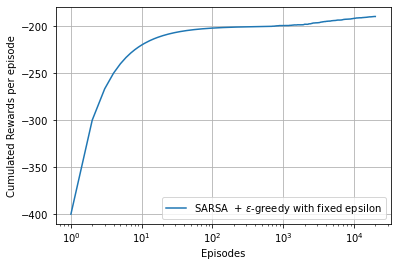

In [21]:
plot_cum_rewards(cumulative_rewards_sarsa,'SARSA ')

Nous observons que l'utilisation de l'algorithme.

La courbe de récompense est la même pour les deux algorithmes, ce qui peut s'expliquer par le fait que notre espace d'états possibles est très grand, puisqu'on a 19 positions et 15 vitesses accessible.


Un grid search pour trouver les hyper-paramètres qui donnent la meilleure performance est envisageable.

